In [1]:
import numpy as np

In [2]:
# https://resources.nvidia.com/en-us-tensor-core/nvidia-tensor-core-gpu-datasheet
# INT8 Tensor Core 3,958 TOPS2 with sparsity
# FP8 Tensor Core 3,958 teraFLOPS with sparsity

# FP16 Tensor Core 1,979 teraFLOPS with sparsity -- 989.5
# BF16

# TF32 Tensor Core 989 teraFLOPS with sparsity -- 494.5 
# FP32 67 teraFLOPS

# FP64 Tensor Core 67 teraFLOPS
# FP64 34 teraFLOPS

# GPU Mem BW 3.35TB/s 

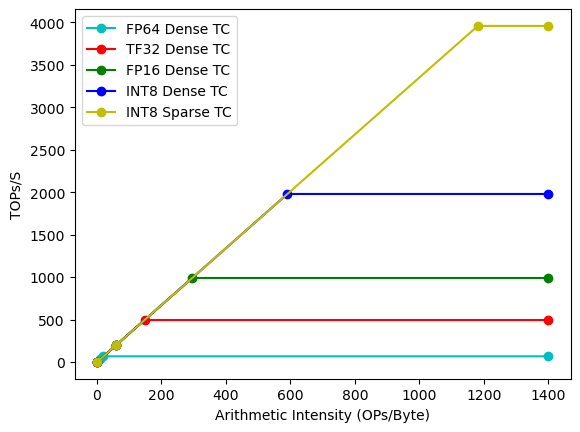

In [3]:
# Operational intensity is a feature of a workload -- the number of operations / bytes
# MNK GEMM / we know MK is 2:4 sparse; 
# What's the operational intensity of this GEMM? 
# What's the operational intensity of this SPMM?
import matplotlib.pyplot as plt

plt.plot([1, 10, 20, 1400], [1, 33.5, 67, 67], 'o-c', label = "FP64 Dense TC")
plt.plot([1, 60, 147.61, 1400], [1, 201, 494.5, 494.5], 'o-r', label = "TF32 Dense TC")
plt.plot([1, 60, 295.37, 1400], [1, 201, 989.5, 989.5], 'o-g', label = "FP16 Dense TC")
plt.plot([1, 60, 590.75, 1400], [1, 201, 1979, 1979], 'o-b', label = "INT8 Dense TC")
plt.plot([1, 60, 1181.5, 1400], [1, 201, 3958, 3958], 'o-y', label = "INT8 Sparse TC")

plt.xlabel('Arithmetic Intensity (OPs/Byte)')
plt.ylabel('TOPs/S')
plt.legend()
plt.savefig("roofline.pdf")

plt.show()

(0.0, 1.1)

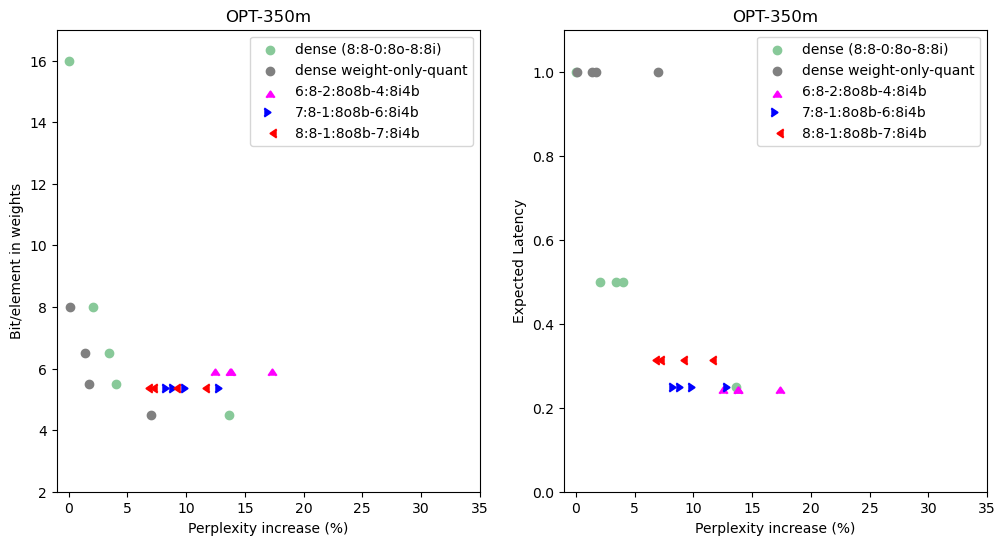

In [76]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize =(12, 6))
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
#y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
#axs.scatter(x, y, color = 'hotpink')

dense_p = 25.4207
x = np.array([25.4207, 28.8936, 26.4393, 26.2941, 25.9448])
x = (x - dense_p)/dense_p * 100
y = np.array([16, 4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = '#88c999', label="dense (8:8-0:8o-8:8i)")
y = np.array([1, 1/4, 1/2, 1/2, 1/2])
axs[1].scatter(x, y, color = '#88c999', label="dense (8:8-0:8o-8:8i)")

x = np.array([27.2057, 25.8580, 25.7670, 25.4371])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")
y = np.array([1, 1, 1, 1])
axs[1].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")

x = np.array([29.8278, 28.9205, 28.5968, 28.9288])
x = (x - dense_p)/dense_p * 100
y = np.array([6, 6, 6, 6])
axs[0].scatter(x, y, color = 'magenta', label="6:8-2:8o8b-4:8i4b", marker=6)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'magenta', label="6:8-2:8o8b-4:8i4b", marker=6)

x = np.array([28.7235, 27.7122, 27.5709, 27.9776])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'blue', label="7:8-1:8o8b-6:8i4b", marker=5)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'blue', label="7:8-1:8o8b-6:8i4b", marker=5)


x = np.array([28.3284, 27.2033, 27.0848, 27.6964])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2])
axs[1].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)
'''







'''

axs[0].legend()
axs[0].set_title("OPT-350m")
axs[0].set_ylabel("Bit/element in weights")
axs[0].set_xlabel("Perplexity increase (%)") # Expected latency
axs[0].set_xlim(-1, 35)
axs[0].set_ylim(2, 17)

axs[1].legend()
axs[1].set_title("OPT-350m")
axs[1].set_ylabel("Expected Latency")
axs[1].set_xlabel("Perplexity increase (%)") # Expected latency
axs[1].set_xlim(-1, 35)
axs[1].set_ylim(0.0, 1.1)
#axs.show()

Text(0.5, 0, 'Perplexity increase (%)')

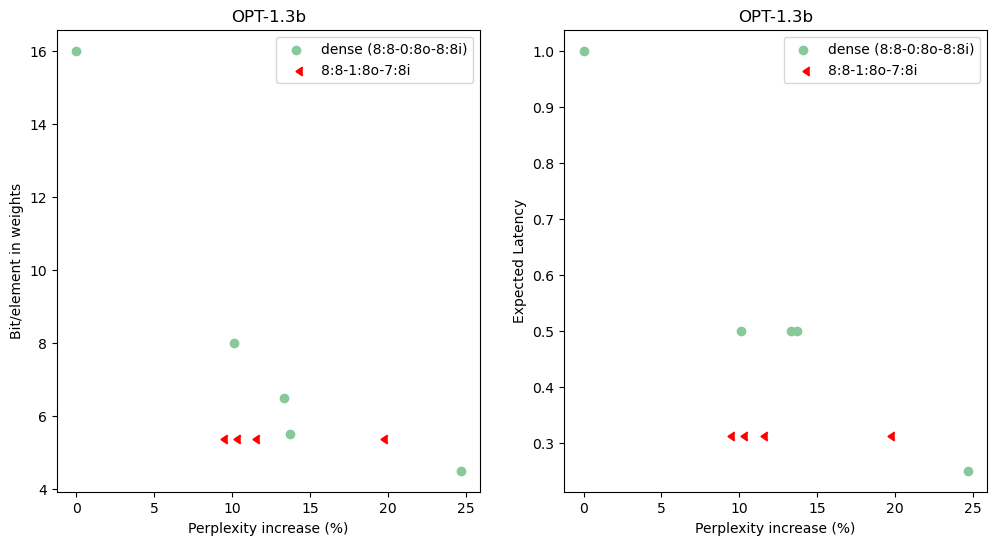

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize =(12, 6))
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
#y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
#axs.scatter(x, y, color = 'hotpink')

dense_p = 16.4126
x = np.array([16.4126, 20.4581, 18.6618, 18.5991, 18.0725])
x = (x - dense_p)/dense_p * 100
y = np.array([16, 4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = '#88c999', label="dense (8:8-0:8o-8:8i)")
y = np.array([1, 1/4, 1/2, 1/2, 1/2])
axs[1].scatter(x, y, color = '#88c999', label="dense (8:8-0:8o-8:8i)")

x = np.array([19.6217, 18.0738, 17.9312, 18.2771])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'red', label="8:8-1:8o-7:8i", marker=4)

y = np.array([1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2])
axs[1].scatter(x, y, color = 'red', label="8:8-1:8o-7:8i", marker=4)

'''
x = np.array([27.2057, 25.8580, 25.7670, 25.4371])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")
y = np.array([1, 1, 1, 1])
axs[1].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")



x = np.array([28.7235, 27.7122, 27.5709, 27.9776])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

x = np.array([29.8278, 28.9205, 28.5968, 28.9288])
x = (x - dense_p)/dense_p * 100
y = np.array([6, 6, 6, 6])
axs[0].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)
'''
axs[0].legend()
axs[0].set_title("OPT-1.3b")
axs[0].set_ylabel("Bit/element in weights")
axs[0].set_xlabel("Perplexity increase (%)") # Expected latency

axs[1].legend()
axs[1].set_title("OPT-1.3b")
axs[1].set_ylabel("Expected Latency")
axs[1].set_xlabel("Perplexity increase (%)") # Expected latency
#axs.show()

Text(0.5, 0, 'Perplexity increase (%)')

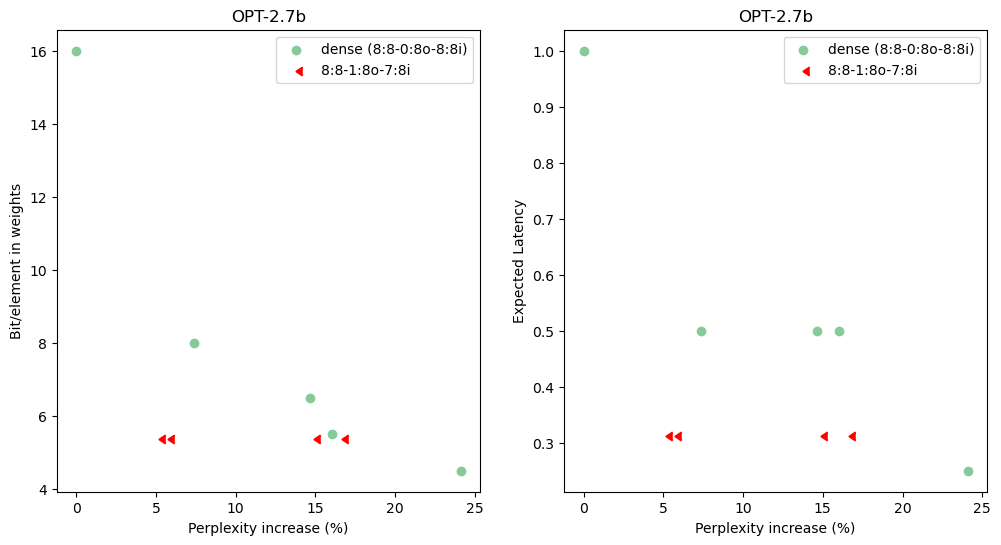

In [52]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize =(12, 6))
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
#y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
#axs.scatter(x, y, color = 'hotpink')

dense_p = 14.3184
x = np.array([14.3184, 17.7683, 16.6147, 16.4173, 15.3723])
x = (x - dense_p)/dense_p * 100
y = np.array([16, 4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = '#88c999', label="dense (8:8-0:8o-8:8i)")
y = np.array([1, 1/4, 1/2, 1/2, 1/2])
axs[1].scatter(x, y, color = '#88c999', label="dense (8:8-0:8o-8:8i)")

x = np.array([16.7025, 15.1434, 15.0629, 16.4519])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'red', label="8:8-1:8o-7:8i", marker=4)

y = np.array([1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2])
axs[1].scatter(x, y, color = 'red', label="8:8-1:8o-7:8i", marker=4)

'''
x = np.array([27.2057, 25.8580, 25.7670, 25.4371])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")
y = np.array([1, 1, 1, 1])
axs[1].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")



x = np.array([28.7235, 27.7122, 27.5709, 27.9776])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

x = np.array([29.8278, 28.9205, 28.5968, 28.9288])
x = (x - dense_p)/dense_p * 100
y = np.array([6, 6, 6, 6])
axs[0].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)
'''
axs[0].legend()
axs[0].set_title("OPT-2.7b")
axs[0].set_ylabel("Bit/element in weights")
axs[0].set_xlabel("Perplexity increase (%)") # Expected latency

axs[1].legend()
axs[1].set_title("OPT-2.7b")
axs[1].set_ylabel("Expected Latency")
axs[1].set_xlabel("Perplexity increase (%)") # Expected latency
#axs.show()

Text(0.5, 0, 'Perplexity increase (%)')

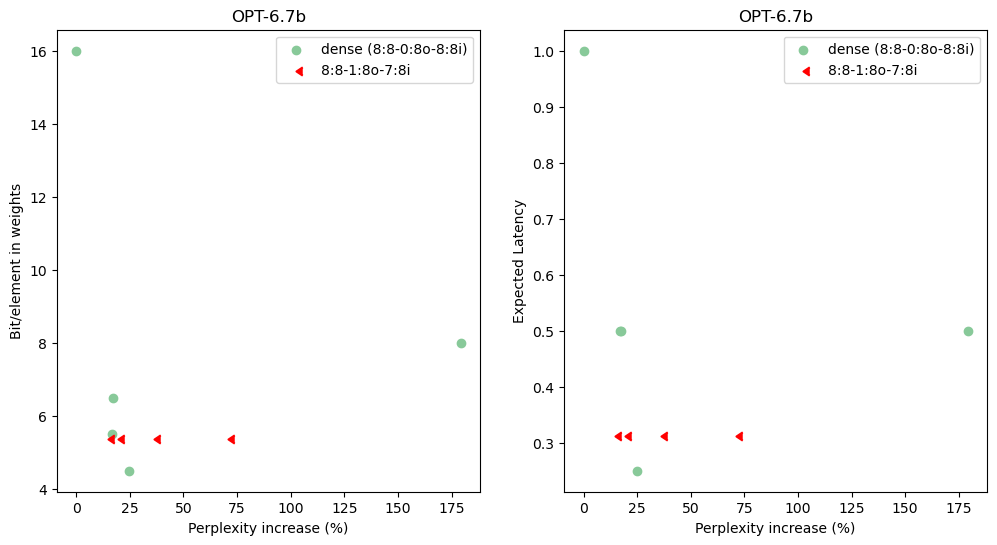

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize =(12, 6))
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
#y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
#axs.scatter(x, y, color = 'hotpink')

dense_p = 12.2865
x = np.array([12.2865, 15.3239, 14.3605, 14.4126, 34.3029])
x = (x - dense_p)/dense_p * 100
y = np.array([16, 4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = '#88c999', label="dense (8:8-0:8o-8:8i)")
y = np.array([1, 1/4, 1/2, 1/2, 1/2])
axs[1].scatter(x, y, color = '#88c999', label="dense (8:8-0:8o-8:8i)")

x = np.array([16.7279, 14.6849, 14.1030, 20.9969])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'red', label="8:8-1:8o-7:8i", marker=4)

y = np.array([1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2])
axs[1].scatter(x, y, color = 'red', label="8:8-1:8o-7:8i", marker=4)

'''
x = np.array([27.2057, 25.8580, 25.7670, 25.4371])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")
y = np.array([1, 1, 1, 1])
axs[1].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")



x = np.array([28.7235, 27.7122, 27.5709, 27.9776])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

x = np.array([29.8278, 28.9205, 28.5968, 28.9288])
x = (x - dense_p)/dense_p * 100
y = np.array([6, 6, 6, 6])
axs[0].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)
'''
axs[0].legend()
axs[0].set_title("OPT-6.7b")
axs[0].set_ylabel("Bit/element in weights")
axs[0].set_xlabel("Perplexity increase (%)") # Expected latency

axs[1].legend()
axs[1].set_title("OPT-6.7b")
axs[1].set_ylabel("Expected Latency")
axs[1].set_xlabel("Perplexity increase (%)") # Expected latency
#axs.show()

Text(0.5, 0, 'Perplexity increase (%)')

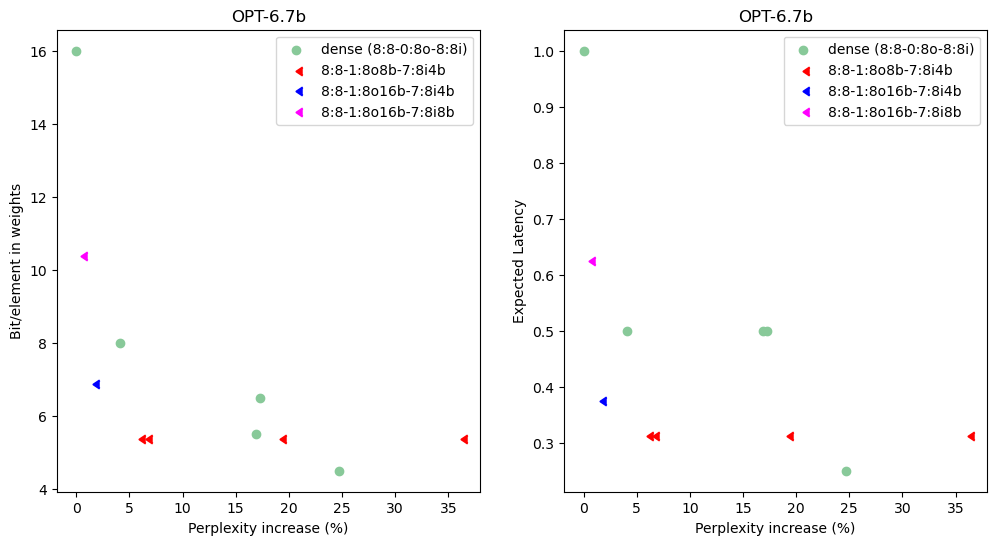

In [78]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize =(12, 6))
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
#y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
#axs.scatter(x, y, color = 'hotpink')

dense_p = 12.2865
x = np.array([12.2865, 15.3239, 14.3605, 14.4126, 12.7867])
x = (x - dense_p)/dense_p * 100
y = np.array([16, 4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = '#88c999', label="dense (8:8-0:8o-8:8i)")
y = np.array([1, 1/4, 1/2, 1/2, 1/2])
axs[1].scatter(x, y, color = '#88c999', label="dense (8:8-0:8o-8:8i)")

x = np.array([16.7279, 13.0949, 13.0172, 14.6427])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2])
axs[1].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

#12.4769
x = np.array([12.4769])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+4*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8])
axs[1].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

#12.3459
x = np.array([12.3459])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+8*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)

y = np.array([1/2 + 1/8 * 1])
axs[1].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)
'''
x = np.array([27.2057, 25.8580, 25.7670, 25.4371])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")
y = np.array([1, 1, 1, 1])
axs[1].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")



x = np.array([28.7235, 27.7122, 27.5709, 27.9776])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

x = np.array([29.8278, 28.9205, 28.5968, 28.9288])
x = (x - dense_p)/dense_p * 100
y = np.arraya([6, 6, 6, 6])
axs[0].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)
'''
axs[0].legend()
axs[0].set_title("OPT-6.7b")
axs[0].set_ylabel("Bit/element in weights")
axs[0].set_xlabel("Perplexity increase (%)") # Expected latency

axs[1].legend()
axs[1].set_title("OPT-6.7b")
axs[1].set_ylabel("Expected Latency")
axs[1].set_xlabel("Perplexity increase (%)") # Expected latency
#axs.show()

/tmp/ipykernel_505/1903021361.py:22: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[0].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')
/tmp/ipykernel_505/1903021361.py:25: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[1].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')


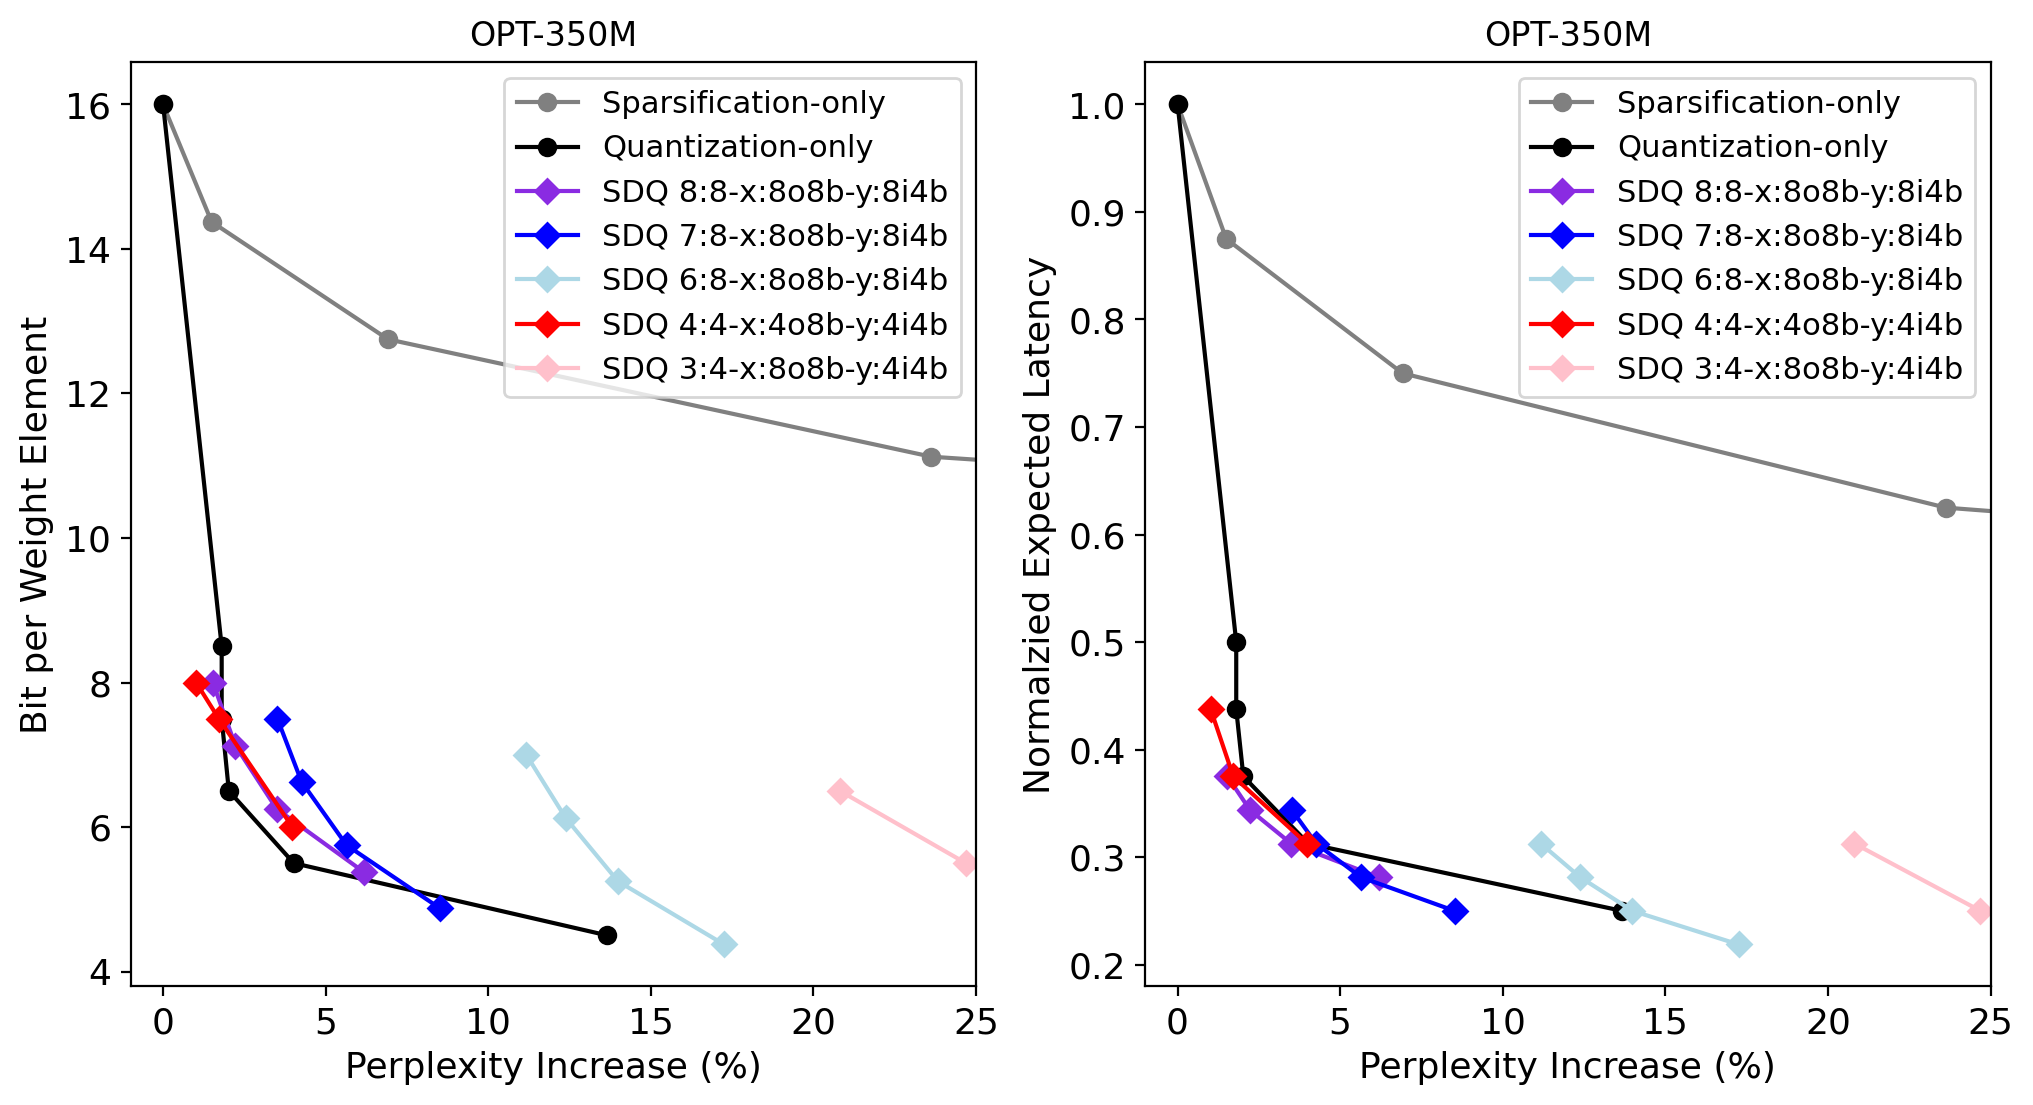

In [223]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize =(12, 6), dpi=200)
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
#y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
#axs.scatter(x, y, color = 'hotpink')

dense_p = 25.4202

# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([25.4202, 25.8, 27.1783, 31.4253, 45.1572])
x = (x - dense_p)/dense_p * 100
y = np.array([16, ((16*7) + (3))/8, ((16*6) + (6))/8, ((16*5) + (9))/8, ((16*4) + (12))/8])
axs[0].plot(x, y, color = 'grey', label="Sparsification-only", marker='o', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1, 7/8, 6/8, 5/8, 4/8])
axs[1].plot(x, y, color = 'grey', label="Sparsification-only", marker='o', linestyle='-')

x = np.array([28.8931, 26.4421, 25.9343, 25.8784, 25.8784, 25.4202])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 7.5, 8.5, 16])
axs[0].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')
y = np.array([1/4, 5/16, 6/16, 7/16, 1/2, 1])
#y = np.array([1/4, 1/2, 1/2, 1/2, 1])
axs[1].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')



# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([26.9912, 26.3085, 25.9861, 25.8094])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 28) + (3 + 8/2))/8, ((16 + 24) + (6 + 8/2))/8, ((24 + 20) + (9 + 8/2))/8, ((32 + 16) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'blueviolet', label="SDQ 8:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 7/8 + 1/8 * 1/2, 1/4 * 6/8 + 2/8 * 1/2, 1/4 * 5/8 + 3/8 * 1/2, 1/4 * 4/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'blueviolet', label="SDQ 8:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 7:8
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([27.5847, 26.8542, 26.5033, 26.3136])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 24) + (3 + 8/2))/8, ((16 + 20) + (6 + 8/2))/8, ((24 + 16) + (9 + 8/2))/8, ((32 + 12) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'blue', label="SDQ 7:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 6/8 + 1/8 * 1/2, 1/4 * 5/8 + 2/8 * 1/2, 1/4 * 4/8 + 3/8 * 1/2, 1/4 * 3/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'blue', label="SDQ 7:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 6:8
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([29.8054, 28.9759, 28.5675, 28.2597])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 20) + (3 + 8/2))/8, ((16 + 16) + (6 + 8/2))/8, ((24 + 12) + (9 + 8/2))/8, ((32 + 8) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'lightblue', label="SDQ 6:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 5/8 + 1/8 * 1/2, 1/4 * 4/8 + 2/8 * 1/2, 1/4 * 3/8 + 3/8 * 1/2, 1/4 * 2/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'lightblue', label="SDQ 6:8-x:8o8b-y:8i4b", marker='D', linestyle='-')


### SDQ 4:4
# 1:4/3:4 2:4/2:4 3:4/1:4
# ((8 + 28) + (3 + 8/2))/8
x = np.array([26.4313, 25.8556, 25.6786])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 24) + (4 + 8/2))/8, ((32 + 16) + (8 + 8/2))/8, ((48 + 8) + (4 + 8/2))/8])
axs[0].plot(x, y, color = 'red', label="SDQ 4:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([3/4 * 1/4 + 1/4 * 1/2, 2/4 * 1/4 + 2/4 * 1/2, 1/4 * 1/4 + 3/4 * 1/2])
axs[1].plot(x, y, color = 'red', label="SDQ 4:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

### SDQ 3:4
# 1:4/2:4 2:4/1:4
# ((8 + 28) + (3 + 8/2))/8
x = np.array([31.6957, 30.7115])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 16) + (8 + 8/2))/8, ((32 + 8) + (8 + 8/2))/8])
axs[0].plot(x, y, color = 'pink', label="SDQ 3:4-x:8o8b-y:4i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([2/4 * 1/4 + 1/4 * 1/2, 1/4 * 1/4 + 2/4 * 1/2])
axs[1].plot(x, y, color = 'pink', label="SDQ 3:4-x:8o8b-y:4i4b", marker='D', linestyle='-')


'''

x = np.array([16.7279, 13.0949, 13.0172, 14.6427])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2])
axs[1].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

#12.4769
x = np.array([12.4769])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+4*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8])
axs[1].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

#12.3459
x = np.array([12.3459])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+8*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)

y = np.array([1/2 + 1/8 * 1])
axs[1].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)
'''
'''
x = np.array([27.2057, 25.8580, 25.7670, 25.4371])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")
y = np.array([1, 1, 1, 1])
axs[1].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")



x = np.array([28.7235, 27.7122, 27.5709, 27.9776])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

x = np.array([29.8278, 28.9205, 28.5968, 28.9288])
x = (x - dense_p)/dense_p * 100
y = np.arraya([6, 6, 6, 6])
axs[0].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)
'''
fontsize = 13
axs[0].legend(fontsize = fontsize-2)
axs[0].set_title("OPT-350M")
axs[0].set_ylabel("Bit per Weight Element", fontsize = fontsize)
axs[0].set_xlabel("Perplexity Increase (%)", fontsize = fontsize) # Expected latency
axs[0].set_xlim(-1, 25)
axs[0].tick_params (axis='both', which='major', labelsize=fontsize)
axs[1].legend(fontsize = fontsize-2)
axs[1].set_title("OPT-350M")
axs[1].set_ylabel("Normalzied Expected Latency", fontsize = fontsize)
axs[1].set_xlabel("Perplexity Increase (%)", fontsize = fontsize) # Expected latency
axs[1].set_xlim(-1, 25)
axs[1].tick_params (axis='both', which='major', labelsize=fontsize)
#axs.show()

/tmp/ipykernel_480/1341406058.py:24: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[0].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')
/tmp/ipykernel_480/1341406058.py:27: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[1].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')


(0.2, 1.05)

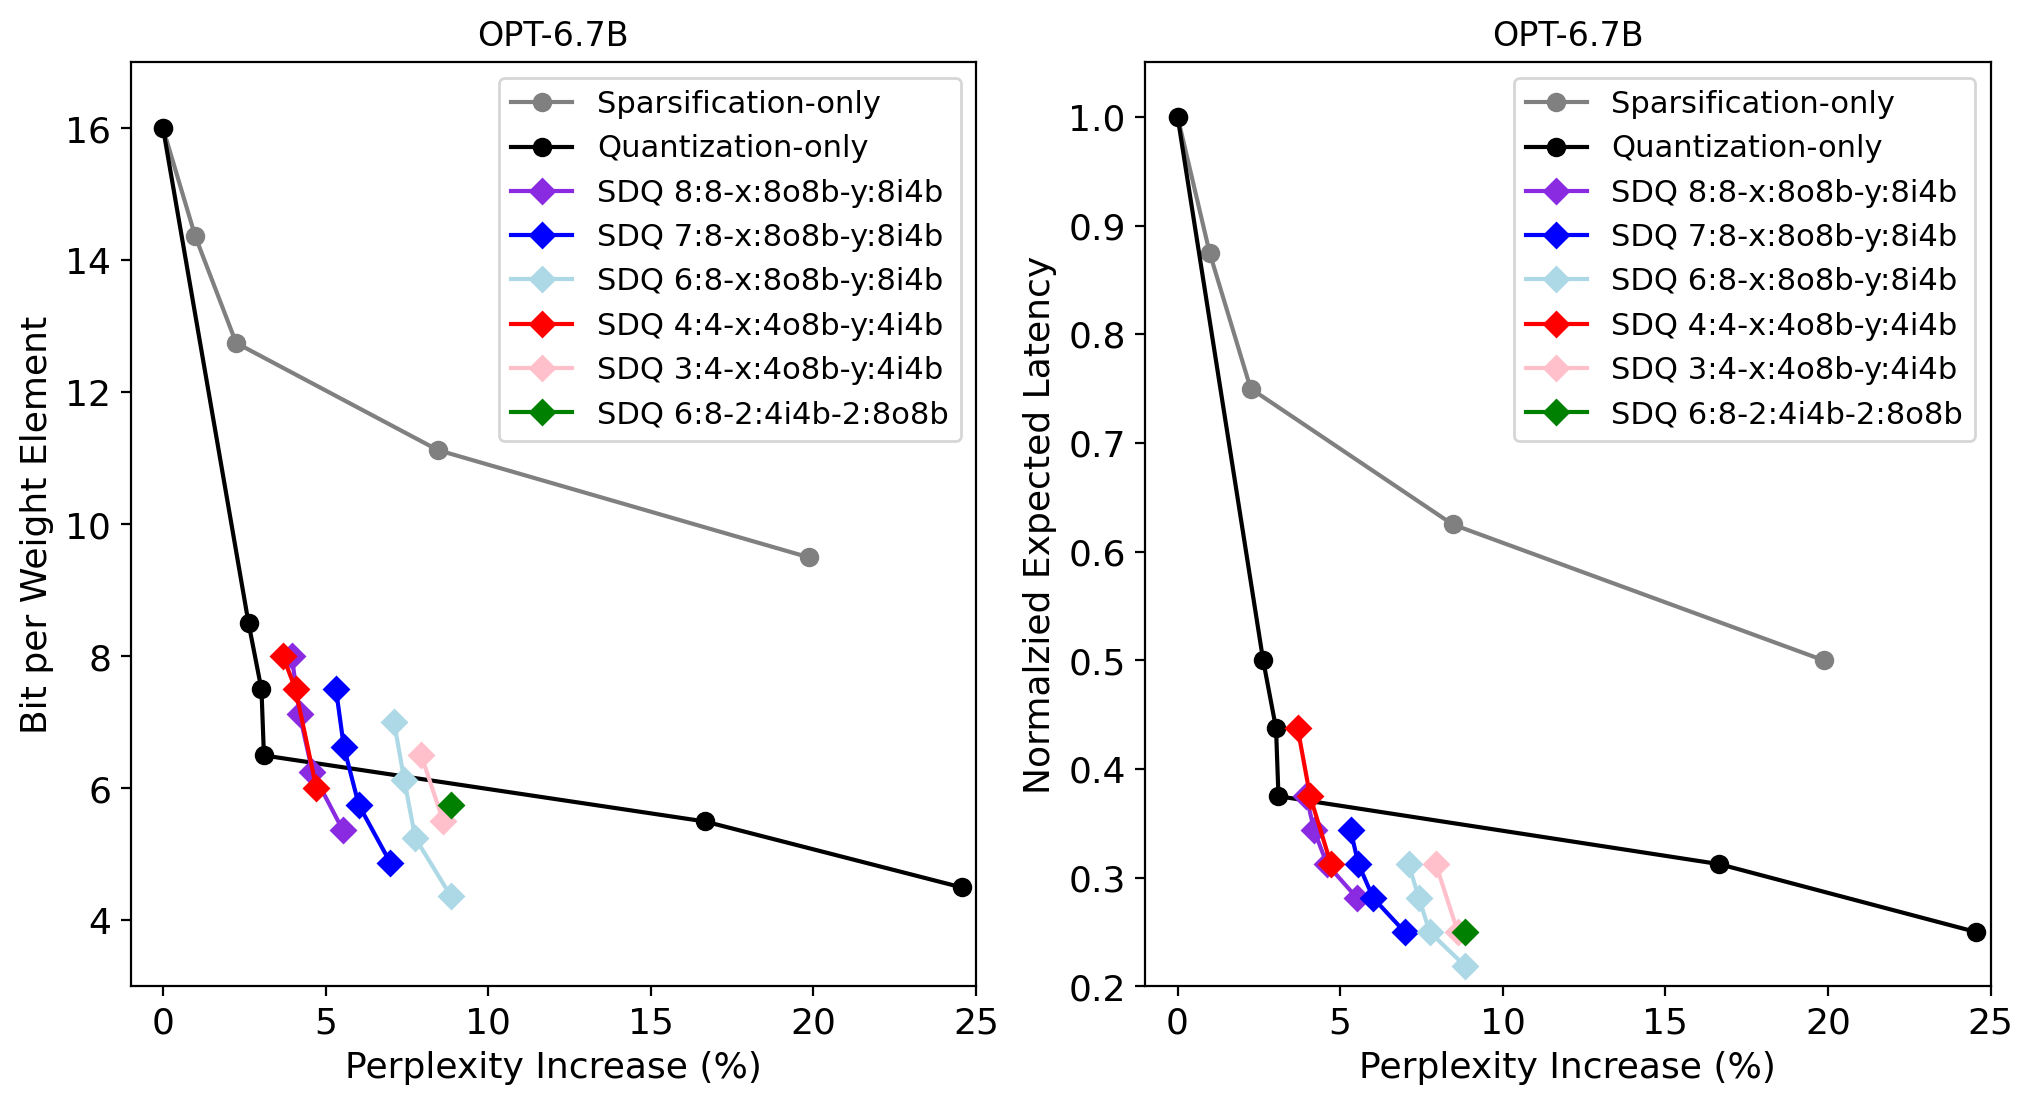

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize =(12, 6), dpi=200)
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
#y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
#axs.scatter(x, y, color = 'hotpink')

dense_p = 12.2869

# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([12.2869, 12.4078, 12.5629, 13.3262, 14.7279])
x = (x - dense_p)/dense_p * 100
y = np.array([16, ((16*7) + (3))/8, ((16*6) + (6))/8, ((16*5) + (9))/8, ((16*4) + (12))/8])
axs[0].plot(x, y, color = 'grey', label="Sparsification-only", marker='o', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1, 7/8, 6/8, 5/8, 4/8])
axs[1].plot(x, y, color = 'grey', label="Sparsification-only", marker='o', linestyle='-')



x = np.array([15.305, 14.3339, 12.6680, 12.6587, 12.6101, 12.2869])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 7.5, 8.5, 16])
axs[0].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')
y = np.array([1/4, 5/16, 6/16, 7/16, 1/2, 1])
#y = np.array([1/4, 1/2, 1/2, 1/2, 1])
axs[1].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')


# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([12.9653, 12.8512, 12.8025, 12.7734])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 28) + (3 + 8/2))/8, ((16 + 24) + (6 + 8/2))/8, ((24 + 20) + (9 + 8/2))/8, ((32 + 16) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'blueviolet', label="SDQ 8:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 7/8 + 1/8 * 1/2, 1/4 * 6/8 + 2/8 * 1/2, 1/4 * 5/8 + 3/8 * 1/2, 1/4 * 4/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'blueviolet', label="SDQ 8:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 7:8
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([13.1456, 13.0264, 12.9702, 12.9403])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 24) + (3 + 8/2))/8, ((16 + 20) + (6 + 8/2))/8, ((24 + 16) + (9 + 8/2))/8, ((32 + 12) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'blue', label="SDQ 7:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 6/8 + 1/8 * 1/2, 1/4 * 5/8 + 2/8 * 1/2, 1/4 * 4/8 + 3/8 * 1/2, 1/4 * 3/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'blue', label="SDQ 7:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 6:8
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([13.3733, 13.2398, 13.1985, 13.1598])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 20) + (3 + 8/2))/8, ((16 + 16) + (6 + 8/2))/8, ((24 + 12) + (9 + 8/2))/8, ((32 + 8) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'lightblue', label="SDQ 6:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 5/8 + 1/8 * 1/2, 1/4 * 4/8 + 2/8 * 1/2, 1/4 * 3/8 + 3/8 * 1/2, 1/4 * 2/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'lightblue', label="SDQ 6:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 4:4
# 1:4/3:4 2:4/2:4 3:4/1:4
# ((8 + 28) + (3 + 8/2))/8
x = np.array([12.8663, 12.7875, 12.7405])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 24) + (4 + 8/2))/8, ((32 + 16) + (8 + 8/2))/8, ((48 + 8) + (4 + 8/2))/8])
axs[0].plot(x, y, color = 'red', label="SDQ 4:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([3/4 * 1/4 + 1/4 * 1/2, 2/4 * 1/4 + 2/4 * 1/2, 1/4 * 1/4 + 3/4 * 1/2])
axs[1].plot(x, y, color = 'red', label="SDQ 4:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

### SDQ 3:4
# 1:4/2:4 2:4/1:4
# ((8 + 28) + (3 + 8/2))/8
x = np.array([13.3458, 13.2626])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 16) + (8 + 8/2))/8, ((32 + 8) + (8 + 8/2))/8])
axs[0].plot(x, y, color = 'pink', label="SDQ 3:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([2/4 * 1/4 + 1/4 * 1/2, 1/4 * 1/4 + 2/4 * 1/2])
axs[1].plot(x, y, color = 'pink', label="SDQ 3:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

### # 2:4i fp4/ 2:8o int8
x = np.array([13.3743])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 16) + (4+6 + 8/2))/8])
axs[0].plot(x, y, color = 'green', label="SDQ 6:8-2:4i4b-2:8o8b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([2/4 * 1/4 + 2/8 * 1/2])
axs[1].plot(x, y, color = 'green', label="SDQ 6:8-2:4i4b-2:8o8b", marker='D', linestyle='-')
'''
'''
#### End of SDQ
'''

x = np.array([16.7279, 13.0949, 13.0172, 14.6427])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2])
axs[1].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

#12.4769
x = np.array([12.4769])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+4*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8])
axs[1].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

#12.3459
x = np.array([12.3459])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+8*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)

y = np.array([1/2 + 1/8 * 1])
axs[1].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)
'''
'''
x = np.array([27.2057, 25.8580, 25.7670, 25.4371])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")
y = np.array([1, 1, 1, 1])
axs[1].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")



x = np.array([28.7235, 27.7122, 27.5709, 27.9776])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

x = np.array([29.8278, 28.9205, 28.5968, 28.9288])
x = (x - dense_p)/dense_p * 100
y = np.arraya([6, 6, 6, 6])
axs[0].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)
'''
fontsize = 13
axs[0].legend(fontsize = fontsize-2)
axs[0].set_title("OPT-6.7B")
axs[0].set_ylabel("Bit per Weight Element", fontsize = fontsize)
axs[0].set_xlabel("Perplexity Increase (%)", fontsize = fontsize) # Expected latency
axs[0].set_xlim(-1, 25)
axs[0].tick_params (axis='both', which='major', labelsize=fontsize)
axs[0].set_ylim(3, 17)

axs[1].legend(fontsize = fontsize-2)
axs[1].set_title("OPT-6.7B")
axs[1].set_ylabel("Normalzied Expected Latency", fontsize = fontsize)
axs[1].set_xlabel("Perplexity Increase (%)", fontsize = fontsize) # Expected latency
axs[1].set_xlim(-1, 25)
axs[1].tick_params (axis='both', which='major', labelsize=fontsize)
axs[1].set_ylim(0.2, 1.05)

#axs.show()

/tmp/ipykernel_480/3081857164.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[0].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')
/tmp/ipykernel_480/3081857164.py:24: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[1].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')


(3.0, 17.0)

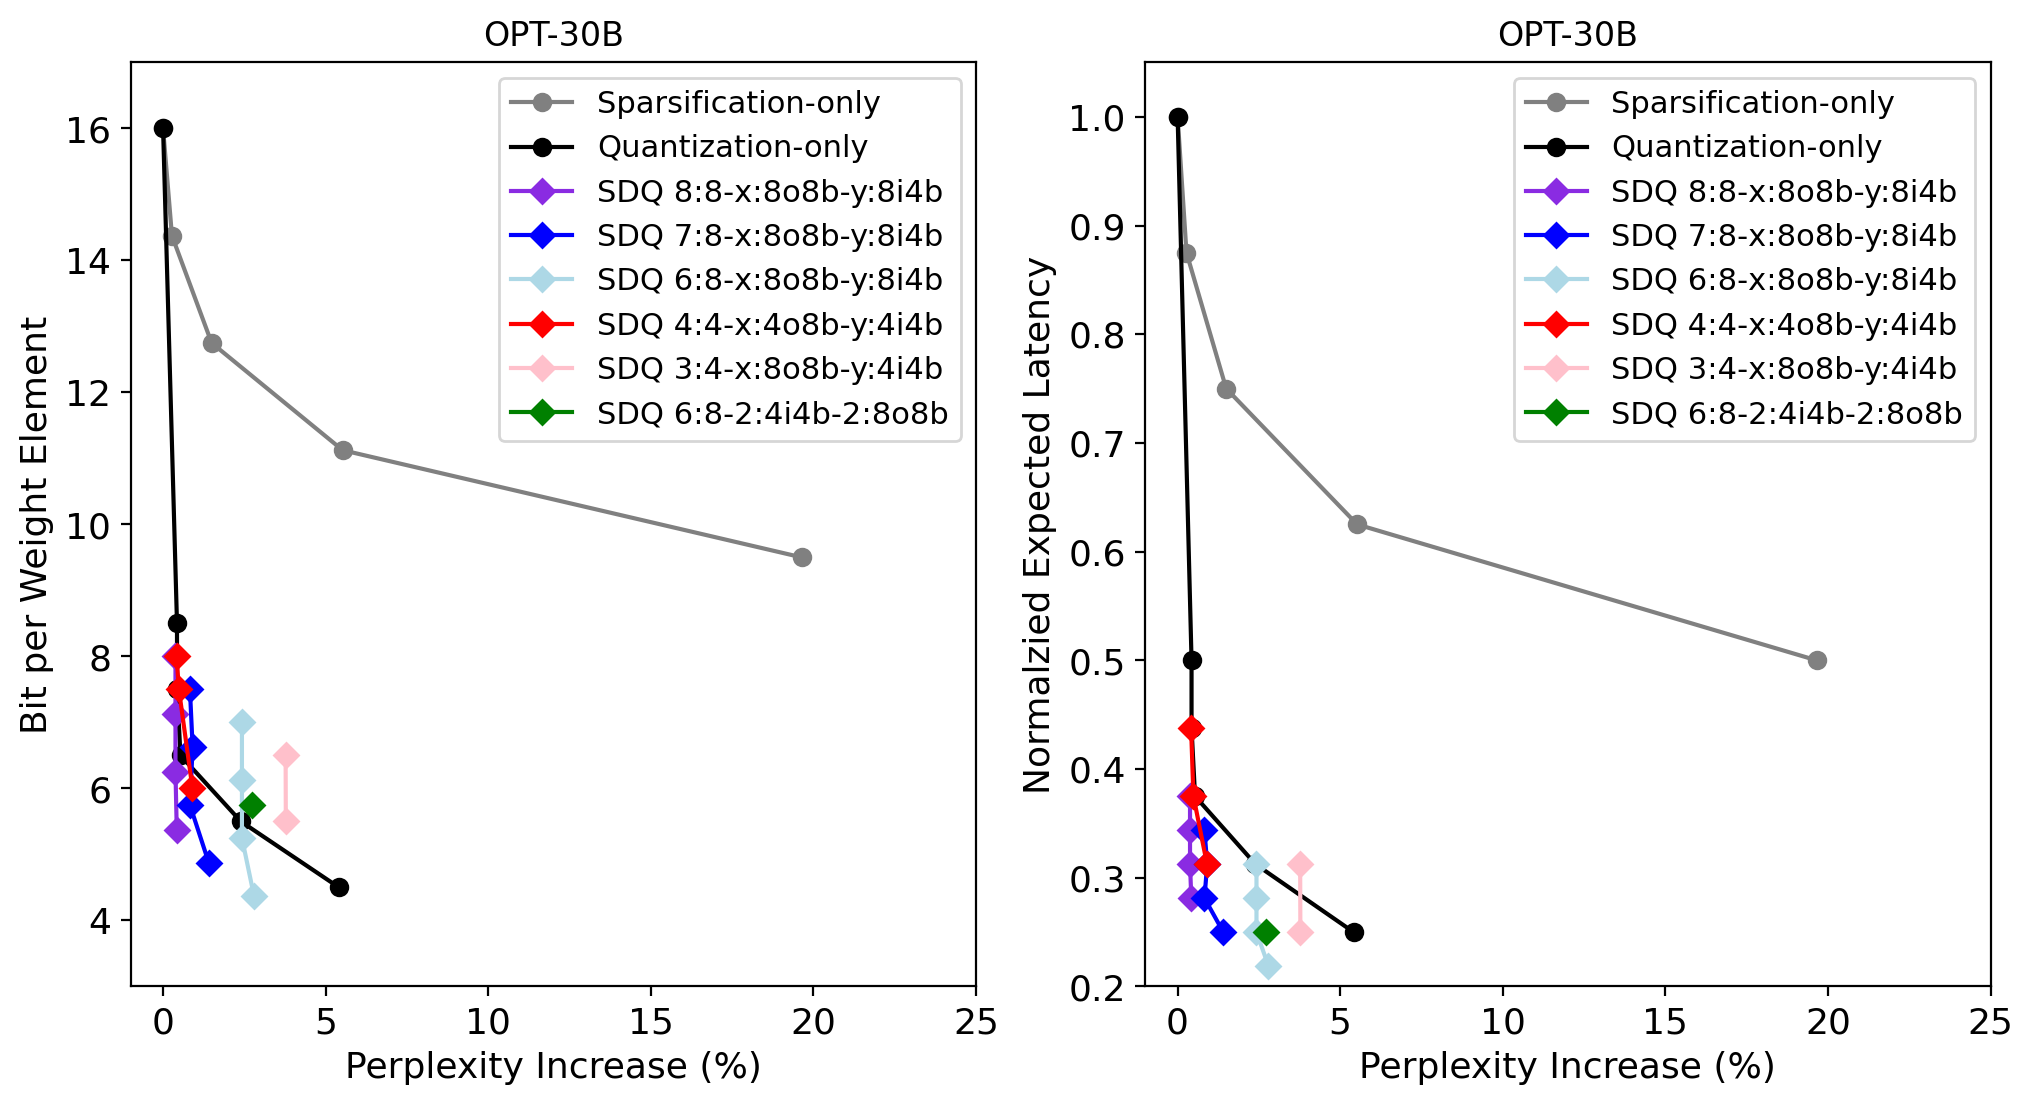

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize =(12, 6), dpi=200)
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
#y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
#axs.scatter(x, y, color = 'hotpink')

dense_p = 10.6703
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([10.6703, 10.6994, 10.8297, 11.2596, 12.7671])
x = (x - dense_p)/dense_p * 100
y = np.array([16, ((16*7) + (3))/8, ((16*6) + (6))/8, ((16*5) + (9))/8, ((16*4) + (12))/8])
axs[0].plot(x, y, color = 'grey', label="Sparsification-only", marker='o', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1, 7/8, 6/8, 5/8, 4/8])
axs[1].plot(x, y, color = 'grey', label="Sparsification-only", marker='o', linestyle='-')

x = np.array([11.2476, 10.9256, 10.7275, 10.716, 10.716, 10.6703])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 7.5, 8.5, 16])
axs[0].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')
y = np.array([1/4, 5/16, 6/16, 7/16, 1/2, 1])
#y = np.array([1/4, 1/2, 1/2, 1/2, 1])
axs[1].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')




# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
### SDQ 8:8
x = np.array([10.7152, 10.711, 10.711, 10.711])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 28) + (3 + 8/2))/8, ((16 + 24) + (6 + 8/2))/8, ((24 + 20) + (9 + 8/2))/8, ((32 + 16) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'blueviolet', label="SDQ 8:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 7/8 + 1/8 * 1/2, 1/4 * 6/8 + 2/8 * 1/2, 1/4 * 5/8 + 3/8 * 1/2, 1/4 * 4/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'blueviolet', label="SDQ 8:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 7:8
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([10.8202, 10.7584, 10.7673, 10.7584])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 24) + (3 + 8/2))/8, ((16 + 20) + (6 + 8/2))/8, ((24 + 16) + (9 + 8/2))/8, ((32 + 12) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'blue', label="SDQ 7:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 6/8 + 1/8 * 1/2, 1/4 * 5/8 + 2/8 * 1/2, 1/4 * 4/8 + 3/8 * 1/2, 1/4 * 3/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'blue', label="SDQ 7:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 6:8
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([10.9685, 10.9291, 10.9291, 10.9291])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 20) + (3 + 8/2))/8, ((16 + 16) + (6 + 8/2))/8, ((24 + 12) + (9 + 8/2))/8, ((32 + 8) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'lightblue', label="SDQ 6:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 5/8 + 1/8 * 1/2, 1/4 * 4/8 + 2/8 * 1/2, 1/4 * 3/8 + 3/8 * 1/2, 1/4 * 2/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'lightblue', label="SDQ 6:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 4:4
# 1:4/3:4 2:4/2:4 3:4/1:4
# ((8 + 28) + (3 + 8/2))/8
x = np.array([10.7668, 10.7222, 10.7145])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 24) + (4 + 8/2))/8, ((32 + 16) + (8 + 8/2))/8, ((48 + 8) + (4 + 8/2))/8])
axs[0].plot(x, y, color = 'red', label="SDQ 4:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([3/4 * 1/4 + 1/4 * 1/2, 2/4 * 1/4 + 2/4 * 1/2, 1/4 * 1/4 + 3/4 * 1/2])
axs[1].plot(x, y, color = 'red', label="SDQ 4:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

### SDQ 3:4
# 1:4/2:4 2:4/1:4
# ((8 + 28) + (3 + 8/2))/8
x = np.array([11.0731, 11.0724])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 16) + (8 + 8/2))/8, ((32 + 8) + (8 + 8/2))/8])
axs[0].plot(x, y, color = 'pink', label="SDQ 3:4-x:8o8b-y:4i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([2/4 * 1/4 + 1/4 * 1/2, 1/4 * 1/4 + 2/4 * 1/2])
axs[1].plot(x, y, color = 'pink', label="SDQ 3:4-x:8o8b-y:4i4b", marker='D', linestyle='-')

### # 2:4i fp4/ 2:8o int8
x = np.array([10.9605])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 16) + (4+6 + 8/2))/8])
axs[0].plot(x, y, color = 'green', label="SDQ 6:8-2:4i4b-2:8o8b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([2/4 * 1/4 + 2/8 * 1/2])
axs[1].plot(x, y, color = 'green', label="SDQ 6:8-2:4i4b-2:8o8b", marker='D', linestyle='-')

'''

x = np.array([16.7279, 13.0949, 13.0172, 14.6427])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2])
axs[1].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

#12.4769
x = np.array([12.4769])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+4*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8])
axs[1].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

#12.3459
x = np.array([12.3459])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+8*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)

y = np.array([1/2 + 1/8 * 1])
axs[1].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)
'''
'''
x = np.array([27.2057, 25.8580, 25.7670, 25.4371])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")
y = np.array([1, 1, 1, 1])
axs[1].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")



x = np.array([28.7235, 27.7122, 27.5709, 27.9776])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

x = np.array([29.8278, 28.9205, 28.5968, 28.9288])
x = (x - dense_p)/dense_p * 100
y = np.arraya([6, 6, 6, 6])
axs[0].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)
'''
fontsize = 13
axs[0].legend(fontsize = fontsize-2)
axs[0].set_title("OPT-30B")
axs[0].set_ylabel("Bit per Weight Element", fontsize = fontsize)
axs[0].set_xlabel("Perplexity Increase (%)", fontsize = fontsize) # Expected latency
axs[0].set_xlim(-1, 25)
axs[0].tick_params (axis='both', which='major', labelsize=fontsize)
axs[1].legend(fontsize = fontsize-2)
axs[1].set_title("OPT-30B")
axs[1].set_ylabel("Normalzied Expected Latency", fontsize = fontsize)
axs[1].set_xlabel("Perplexity Increase (%)", fontsize = fontsize) # Expected latency
axs[1].set_xlim(-1, 25)
axs[1].tick_params (axis='both', which='major', labelsize=fontsize)
axs[1].set_ylim(0.2, 1.05)
axs[0].set_ylim(3, 17)
#axs.show()

In [78]:

# MACs per bit 
# Default: Dense 8bit I x 8bit W = 32bit O with 8 bit scale factor group 16 
def get_op_intensity(m, n, k, b_i=8, b_w=8, b_o=32, s_g = 16, s_b = 8, g=1, h=1):
    computes = m*n*k*(g/h)
    #data_bits = k*n*b_w*(g/h)
    data_bits = m*k*b_i + k*n*b_w*(g/h) + m*n*b_o
    
    metadata_s = 0
    if h != 1:
        metadata_s = (n*k/h) * g * np.log2(h)
    
    metadata_q = 0
    
    if b_i != 32:
        metadata_q += m*k/s_g * s_b
    if b_w != 32:
        metadata_q += m*k/s_g * s_b
    if b_o != 32:
        metadata_q += m*k/s_g * s_b
    #print("computes")
    #print(computes)
    #print(data_bits)
    #print(metadata_s)
    #print(metadata_q)
    return computes/data_bits
print(get_op_intensity(16, 16, 16, 4, 4, 32, 16, 32, 1, 4))

print(8*get_op_intensity(512, 768, 768, 32, 32, 32, 16, 32, 1, 1)) # Dense 16bit
print(8*get_op_intensity(512, 768, 768, 32, 32, 32, 16, 32, 2, 4)) # 2:4 16bit

print(8*get_op_intensity(512, 768, 768, 16, 16, 32, 16, 32, 1, 1)) # Dense 16bit
print(8*get_op_intensity(512, 768, 768, 16, 16, 32, 16, 32, 2, 4)) # 2:4 16bit

print(8*get_op_intensity(512, 768, 768, 8, 8, 32, 16, 32, 1, 1)) # Dense 8bit
print(8*get_op_intensity(512, 768, 768, 8, 8, 32, 16, 32, 2, 4)) # 2:4 8bit

print("-----")

print(8*get_op_intensity(12288, 1024, 4096, 32, 32, 32, 16, 32, 1, 1)) # Dense 32bit
print(8*get_op_intensity(12288, 1024, 4096, 32, 32, 32, 16, 32, 2, 4)) # 2:4 32bit

print(8*get_op_intensity(12288, 1024, 4096, 16, 16, 32, 16, 32, 1, 1)) # Dense 16bit
print(8*get_op_intensity(12288, 1024, 4096, 16, 16, 32, 16, 32, 2, 4)) # 2:4 16bit

print(8*get_op_intensity(12288, 1024, 4096, 8, 8, 32, 16, 32, 1, 1)) # Dense 8bit
print(8*get_op_intensity(12288, 1024, 4096, 8, 8, 32, 16, 32, 2, 4)) # 2:4 8bit

print("-----")

print(8*get_op_intensity(12288, 12288, 49152, 32, 32, 32, 16, 32, 1, 1)) # Dense 32bit
print(8*get_op_intensity(12288, 12288, 49152, 32, 32, 32, 16, 32, 2, 4)) # 2:4 32bit

print(8*get_op_intensity(12288, 12288, 49152, 16, 16, 32, 16, 32, 1, 1)) # Dense 16bit
print(8*get_op_intensity(12288, 12288, 49152, 16, 16, 32, 16, 32, 2, 4)) # 2:4 16bit

print(8*get_op_intensity(12288, 12288, 49152, 8, 8, 32, 16, 32, 1, 1)) # Dense 8bit
print(8*get_op_intensity(12288, 12288, 49152, 8, 8, 32, 16, 32, 2, 4)) # 2:4 8bit

0.10810810810810811
54.857142857142854
34.90909090909091
85.33333333333333
51.2
118.15384615384616
66.78260869565217
-----
192.0
99.09677419354838
323.36842105263156
166.05405405405406
491.52
250.77551020408163
-----
1365.3333333333333
877.7142857142857
2457.6
1536.0
4096.0
2457.6


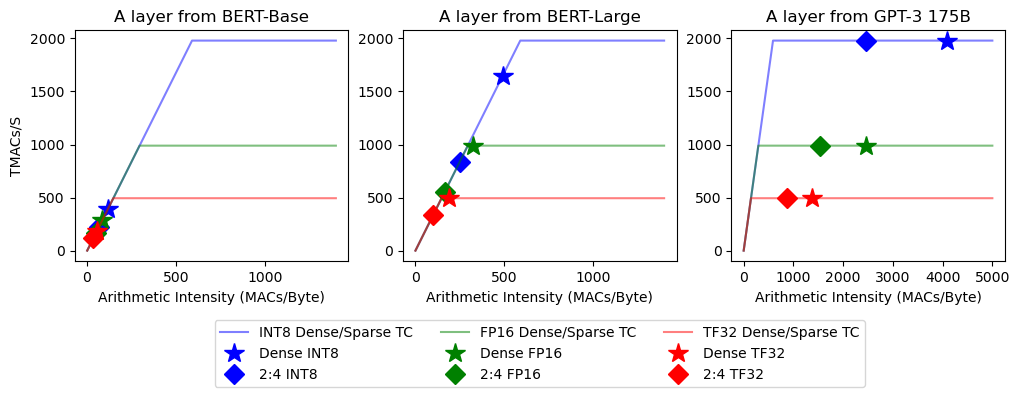

In [116]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize =(12, 3))
# Operational intensity is a feature of a workload -- the number of operations / bytes
# MNK GEMM / we know MK is 2:4 sparse; 
# What's the operational intensity of this GEMM? 
# What's the operational intensity of this SPMM?
import matplotlib.pyplot as plt

#plt.plot([1, 10, 20, 1400], [1, 33.5, 67, 67], 'o-c', label = "FP64 Dense TC")
axs[0].plot([1, 590.75, 1400], [1, 1979, 1979], '-b', label = "INT8 Dense/Sparse TC", alpha=0.5)
axs[0].plot([118], [np.min([118*(201/60), 1979]), ], '*-', mec = 'b', mfc = 'b', linewidth=0, ms=15, label = "Dense INT8")
axs[0].plot([67], [np.min([67*(201/60), 1979])], 'D-', mec = 'b', mfc = 'b', linewidth=0, ms=10, label = "2:4 INT8")

axs[0].plot([1, 295.37, 1400], [1, 989.5, 989.5], '-g', label = "FP16 Dense/Sparse TC", alpha=0.5)
axs[0].plot([85], [np.min([85*(201/60), 989.5]), ], '*-', mec = 'g', mfc = 'g', linewidth=0, ms=15, label = "Dense FP16")
axs[0].plot([51], [np.min([51*(201/60), 989.5])], 'D-', mec = 'g', mfc = 'g', linewidth=0, ms=10, label = "2:4 FP16")

axs[0].plot([1, 147.61, 1400], [1, 494.5, 494.5], '-r', label = "TF32 Dense/Sparse TC", alpha=0.5)
axs[0].plot([55], [np.min([55*(201/60), 494.5]), ], '*-', mec = 'r', mfc = 'r', linewidth=0, ms=15, label = "Dense TF32")
axs[0].plot([35], [np.min([35*(201/60), 494.5])], 'D-', mec = 'r', mfc = 'r', linewidth=0, ms=10, label = "2:4 TF32")

#plt.plot([1, 60, 1181.5, 1400], [1, 201, 3958, 3958], 'o-y', label = "INT8 Sparse TC")

axs[0].set_xlabel('Arithmetic Intensity (MACs/Byte)')
axs[0].set_ylabel('TMACs/S')
#axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
#axs[0].savefig("roofline.pdf")

axs[1].plot([1, 590.75, 1400], [1, 1979, 1979], '-b', label = "INT8 Dense/Sparse TC", alpha=0.5)
axs[1].plot([491], [np.min([491*(201/60), 1979]), ], '*-', mec = 'b', mfc = 'b', linewidth=0, ms=15, label = "Dense INT8")
axs[1].plot([250], [np.min([250*(201/60), 1979])], 'D-', mec = 'b', mfc = 'b', linewidth=0, ms=10, label = "2:4 INT8")

axs[1].plot([1, 295.37, 1400], [1, 989.5, 989.5], '-g', label = "FP16 Dense/Sparse TC", alpha=0.5)
axs[1].plot([323], [np.min([323*(201/60), 989.5]), ], '*-', mec = 'g', mfc = 'g', linewidth=0, ms=15, label = "Dense FP16")
axs[1].plot([166], [np.min([166*(201/60), 989.5])], 'D-', mec = 'g', mfc = 'g', linewidth=0, ms=10, label = "2:4 FP16")

axs[1].plot([1, 147.61, 1400], [1, 494.5, 494.5], '-r', label = "TF32 Dense/Sparse TC", alpha=0.5)
axs[1].plot([192], [np.min([192*(201/60), 494.5]), ], '*-', mec = 'r', mfc = 'r', linewidth=0, ms=15, label = "Dense TF32")
axs[1].plot([99], [np.min([99*(201/60), 494.5])], 'D-', mec = 'r', mfc = 'r', linewidth=0, ms=10, label = "2:4 TF32")
axs[1].set_xlabel('Arithmetic Intensity (MACs/Byte)')
#axs[1].set_ylabel('TMACs/S')

axs[2].plot([1, 590.75, 5000], [1, 1979, 1979], '-b', label = "INT8 Dense/Sparse TC", alpha=0.5)
axs[2].plot([4096.0], [np.min([4096.0*(201/60), 1979]), ], '*-', mec = 'b', mfc = 'b', linewidth=0, ms=15, label = "Dense INT8")
axs[2].plot([2457.6], [np.min([2457.6*(201/60), 1979])], 'D-', mec = 'b', mfc = 'b', linewidth=0, ms=10, label = "2:4 INT8")

axs[2].plot([1, 295.37, 5000], [1, 989.5, 989.5], '-g', label = "FP16 Dense/Sparse TC", alpha=0.5)
axs[2].plot([2457.6], [np.min([2457.6*(201/60), 989.5]), ], '*-', mec = 'g', mfc = 'g', linewidth=0, ms=15, label = "Dense FP16")
axs[2].plot([1536.0], [np.min([1536.0*(201/60), 989.5])], 'D-', mec = 'g', mfc = 'g', linewidth=0, ms=10, label = "2:4 FP16")

axs[2].plot([1, 147.61, 5000], [1, 494.5, 494.5], '-r', label = "TF32 Dense/Sparse TC", alpha=0.5)
axs[2].plot([1365], [np.min([1365*(201/60), 494.5]), ], '*-', mec = 'r', mfc = 'r', linewidth=0, ms=15, label = "Dense TF32")
axs[2].plot([877], [np.min([877*(201/60), 494.5])], 'D-', mec = 'r', mfc = 'r', linewidth=0, ms=10, label = "2:4 TF32")
axs[2].set_xlabel('Arithmetic Intensity (MACs/Byte)')
#axs[2].set_ylabel('TMACs/S')
axs[1].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncols=3)
axs[0].set_title('A layer from BERT-Base')
axs[1].set_title('A layer from BERT-Large')
axs[2].set_title('A layer from GPT-3 175B')
#plt.tight_layout()
plt.savefig("roofline.pdf")
plt.show()


In [ ]:
# Operational intensity is a feature of a workload -- the number of operations / bytes
# MNK GEMM / we know MK is 2:4 sparse; 
# What's the operational intensity of this GEMM? 
# What's the operational intensity of this SPMM?
import matplotlib.pyplot as plt

#plt.plot([1, 10, 20, 1400], [1, 33.5, 67, 67], 'o-c', label = "FP64 Dense TC")
plt.plot([1, 590.75, 1400], [1, 1979, 1979], '-b', label = "INT8 Dense/Sparse TC", alpha=0.5)
plt.plot([118], [np.min([118*(201/60), 1979]), ], '*-', mec = 'b', mfc = 'b', linewidth=0, ms=15, label = "Dense INT8")
plt.plot([67], [np.min([67*(201/60), 1979])], 'D-', mec = 'b', mfc = 'b', linewidth=0, ms=10, label = "2:4 INT8")

plt.plot([1, 295.37, 1400], [1, 989.5, 989.5], '-g', label = "FP16 Dense/Sparse TC", alpha=0.5)
plt.plot([85], [np.min([85*(201/60), 989.5]), ], '*-', mec = 'g', mfc = 'g', linewidth=0, ms=15, label = "Dense FP16")
plt.plot([51], [np.min([51*(201/60), 989.5])], 'D-', mec = 'g', mfc = 'g', linewidth=0, ms=10, label = "2:4 FP16")

plt.plot([1, 147.61, 1400], [1, 494.5, 494.5], '-r', label = "TF32 Dense/Sparse TC", alpha=0.5)
plt.plot([55], [np.min([55*(201/60), 494.5]), ], '*-', mec = 'r', mfc = 'r', linewidth=0, ms=15, label = "Dense TF32")
plt.plot([35], [np.min([35*(201/60), 494.5])], 'D-', mec = 'r', mfc = 'r', linewidth=0, ms=10, label = "2:4 TF32")

#plt.plot([1, 60, 1181.5, 1400], [1, 201, 3958, 3958], 'o-y', label = "INT8 Sparse TC")

plt.xlabel('Arithmetic Intensity (MACs/Byte)')
plt.ylabel('TMACs/S')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("roofline.pdf")

plt.show()

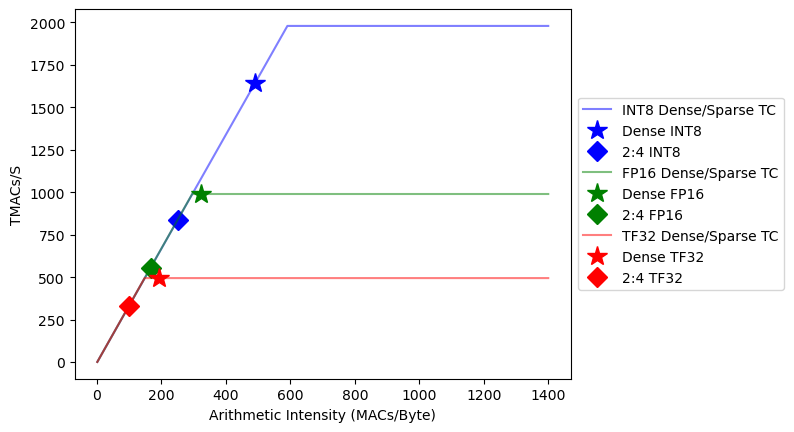

In [77]:
# Operational intensity is a feature of a workload -- the number of operations / bytes
# MNK GEMM / we know MK is 2:4 sparse; 
# What's the operational intensity of this GEMM? 
# What's the operational intensity of this SPMM?
import matplotlib.pyplot as plt

#plt.plot([1, 10, 20, 1400], [1, 33.5, 67, 67], 'o-c', label = "FP64 Dense TC")
plt.plot([1, 590.75, 1400], [1, 1979, 1979], '-b', label = "INT8 Dense/Sparse TC", alpha=0.5)
plt.plot([491], [np.min([491*(201/60), 1979]), ], '*-', mec = 'b', mfc = 'b', linewidth=0, ms=15, label = "Dense INT8")
plt.plot([250], [np.min([250*(201/60), 1979])], 'D-', mec = 'b', mfc = 'b', linewidth=0, ms=10, label = "2:4 INT8")

plt.plot([1, 295.37, 1400], [1, 989.5, 989.5], '-g', label = "FP16 Dense/Sparse TC", alpha=0.5)
plt.plot([323], [np.min([323*(201/60), 989.5]), ], '*-', mec = 'g', mfc = 'g', linewidth=0, ms=15, label = "Dense FP16")
plt.plot([166], [np.min([166*(201/60), 989.5])], 'D-', mec = 'g', mfc = 'g', linewidth=0, ms=10, label = "2:4 FP16")

plt.plot([1, 147.61, 1400], [1, 494.5, 494.5], '-r', label = "TF32 Dense/Sparse TC", alpha=0.5)
plt.plot([192], [np.min([192*(201/60), 494.5]), ], '*-', mec = 'r', mfc = 'r', linewidth=0, ms=15, label = "Dense TF32")
plt.plot([99], [np.min([99*(201/60), 494.5])], 'D-', mec = 'r', mfc = 'r', linewidth=0, ms=10, label = "2:4 TF32")

#plt.plot([1, 60, 1181.5, 1400], [1, 201, 3958, 3958], 'o-y', label = "INT8 Sparse TC")

plt.xlabel('Arithmetic Intensity (MACs/Byte)')
plt.ylabel('TMACs/S')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("roofline.pdf")

plt.show()

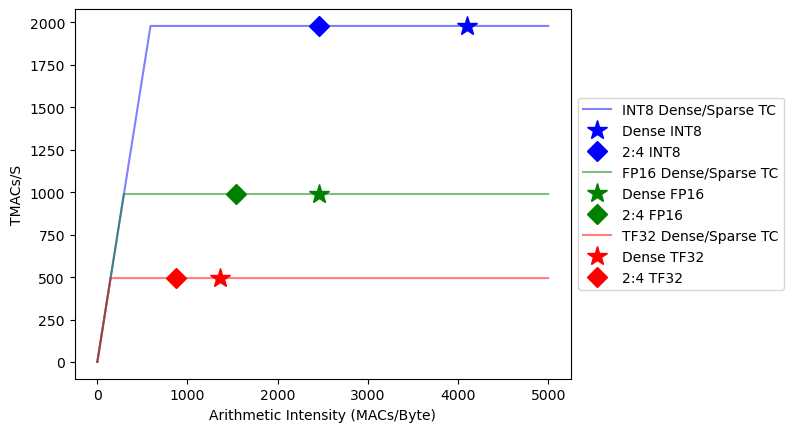

In [80]:
# Operational intensity is a feature of a workload -- the number of operations / bytes
# MNK GEMM / we know MK is 2:4 sparse; 
# What's the operational intensity of this GEMM? 
# What's the operational intensity of this SPMM?
import matplotlib.pyplot as plt

#plt.plot([1, 10, 20, 1400], [1, 33.5, 67, 67], 'o-c', label = "FP64 Dense TC")
plt.plot([1, 590.75, 5000], [1, 1979, 1979], '-b', label = "INT8 Dense/Sparse TC", alpha=0.5)
plt.plot([4096.0], [np.min([4096.0*(201/60), 1979]), ], '*-', mec = 'b', mfc = 'b', linewidth=0, ms=15, label = "Dense INT8")
plt.plot([2457.6], [np.min([2457.6*(201/60), 1979])], 'D-', mec = 'b', mfc = 'b', linewidth=0, ms=10, label = "2:4 INT8")

plt.plot([1, 295.37, 5000], [1, 989.5, 989.5], '-g', label = "FP16 Dense/Sparse TC", alpha=0.5)
plt.plot([2457.6], [np.min([2457.6*(201/60), 989.5]), ], '*-', mec = 'g', mfc = 'g', linewidth=0, ms=15, label = "Dense FP16")
plt.plot([1536.0], [np.min([1536.0*(201/60), 989.5])], 'D-', mec = 'g', mfc = 'g', linewidth=0, ms=10, label = "2:4 FP16")

plt.plot([1, 147.61, 5000], [1, 494.5, 494.5], '-r', label = "TF32 Dense/Sparse TC", alpha=0.5)
plt.plot([1365], [np.min([1365*(201/60), 494.5]), ], '*-', mec = 'r', mfc = 'r', linewidth=0, ms=15, label = "Dense TF32")
plt.plot([877], [np.min([877*(201/60), 494.5])], 'D-', mec = 'r', mfc = 'r', linewidth=0, ms=10, label = "2:4 TF32")

#plt.plot([1, 60, 1181.5, 1400], [1, 201, 3958, 3958], 'o-y', label = "INT8 Sparse TC")

plt.xlabel('Arithmetic Intensity (MACs/Byte)')
plt.ylabel('TMACs/S')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("roofline.pdf")

plt.show()

In [3]:
#C:\Users\gjeong\OneDrive - NVIDIA Corporation\Desktop\data


In [8]:
import os
import numpy as np

In [9]:
os.path.abspath(os.getcwd())


'C:\\Users\\gjeong\\OneDrive - NVIDIA Corporation\\Desktop\\scripts'

In [233]:
import csv
 
# s196_w8_a8_poc_0_QKVP_b1_s196_h6_m384
layer_id_8bit = {} # = np.array([])
w_d_8bit = {} #= np.array([])
i_d_8bit = {} #= np.array([])

layer_id_4bit = {} # np.array([])
w_d_4bit = {} #np.array([])
i_d_4bit = {} #np.array([])

with open('C:\\Users\\gjeong\\OneDrive - NVIDIA Corporation\\Desktop\\data\\deit.csv', mode ='r')as file:
   
  # reading the CSV file
  csvFile = csv.reader(file)
 
  # displaying the contents of the CSV file

  for lines in csvFile:
        assert(len(lines) == 3)
        if (lines[0] == 'layer'):
            print("First line")
            print(lines)
        else:
            layer_type = lines[0].split('_')[5]
            model_type = lines[0].split('_')[3]
            if lines[0].split('_')[1] == 'w8' and lines[0].split('_')[2] == 'a8':
                if model_type not in layer_id_8bit.keys():
                    layer_id_8bit[model_type] = {}
                    w_d_8bit[model_type] = {}
                    i_d_8bit[model_type] = {}
                if layer_type not in layer_id_8bit[model_type].keys():
                    layer_id_8bit[model_type][layer_type] = np.array([])
                    w_d_8bit[model_type][layer_type] = np.array([])
                    i_d_8bit[model_type][layer_type] = np.array([])
            
                layer_id_8bit[model_type][layer_type] = np.append(layer_id_8bit[model_type][layer_type], lines[0])
                w_d_8bit[model_type][layer_type] = np.append(w_d_8bit[model_type][layer_type], float(lines[1]))
                i_d_8bit[model_type][layer_type] = np.append(i_d_8bit[model_type][layer_type], float(lines[2]))
            
            elif lines[0].split('_')[1] == 'w4' and lines[0].split('_')[2] == 'a4':
                if model_type not in layer_id_4bit.keys():
                    layer_id_4bit[model_type] = {}
                    w_d_4bit[model_type] = {}
                    i_d_4bit[model_type] = {}
                if layer_type not in layer_id_4bit[model_type].keys():
                    layer_id_4bit[model_type][layer_type] = np.array([])
                    w_d_4bit[model_type][layer_type] = np.array([])
                    i_d_4bit[model_type][layer_type] = np.array([])
                
                layer_id_4bit[model_type][layer_type] = np.append(layer_id_4bit[model_type][layer_type], lines[0])
                w_d_4bit[model_type][layer_type] = np.append(w_d_4bit[model_type][layer_type], float(lines[1]))
                i_d_4bit[model_type][layer_type] = np.append(i_d_4bit[model_type][layer_type], float(lines[2]))
            else:
                print(lines)
                assert(False)
print(layer_id_8bit.keys())
print(layer_id_4bit.keys())
print(layer_id_8bit['poc'].keys())
print(layer_id_4bit['poc'].keys())
print(np.mean(w_d_8bit['poc']['BMM2']))
print(np.mean(w_d_4bit['pvaw']['BMM2']))

fig, axs = plt.subplots(nrows=5, ncols=1, figsize =(12, 8))

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

axs[0].bar(br1, w_d_8bit['poc']['QKVP'], width = barWidth, label = "w_d_8bit")
axs[0].bar(br2, i_d_8bit['poc']['QKVP'], width = barWidth, label = "i_d_8bit")

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1].bar(br1, w_d_8bit['poc']['BMM1'], width = barWidth, label = "w_d_8bit")
axs[1].bar(br2, i_d_8bit['poc']['BMM1'], width = barWidth, label = "i_d_8bit")

axs[2].bar(br1, w_d_8bit['poc']['BMM2'], width = barWidth, label = "w_d_8bit")
axs[2].bar(br2, i_d_8bit['poc']['BMM2'], width = barWidth, label = "i_d_8bit")

axs[3].bar(br1, w_d_8bit['poc']['FC1'], width = barWidth, label = "w_d_8bit")
axs[3].bar(br2, i_d_8bit['poc']['FC1'], width = barWidth, label = "i_d_8bit")

axs[4].bar(br1, w_d_8bit['poc']['FC2'], width = barWidth, label = "w_d_8bit")
axs[4].bar(br2, i_d_8bit['poc']['FC2'], width = barWidth, label = "i_d_8bit")
plt.legend()


First line
['layer', 'weight_density', 'input_density']
dict_keys(['poc'])
dict_keys(['pvaw'])
dict_keys(['QKVP', 'BMM1', 'BMM2', 'FC1', 'FC2'])


KeyError: 'poc'

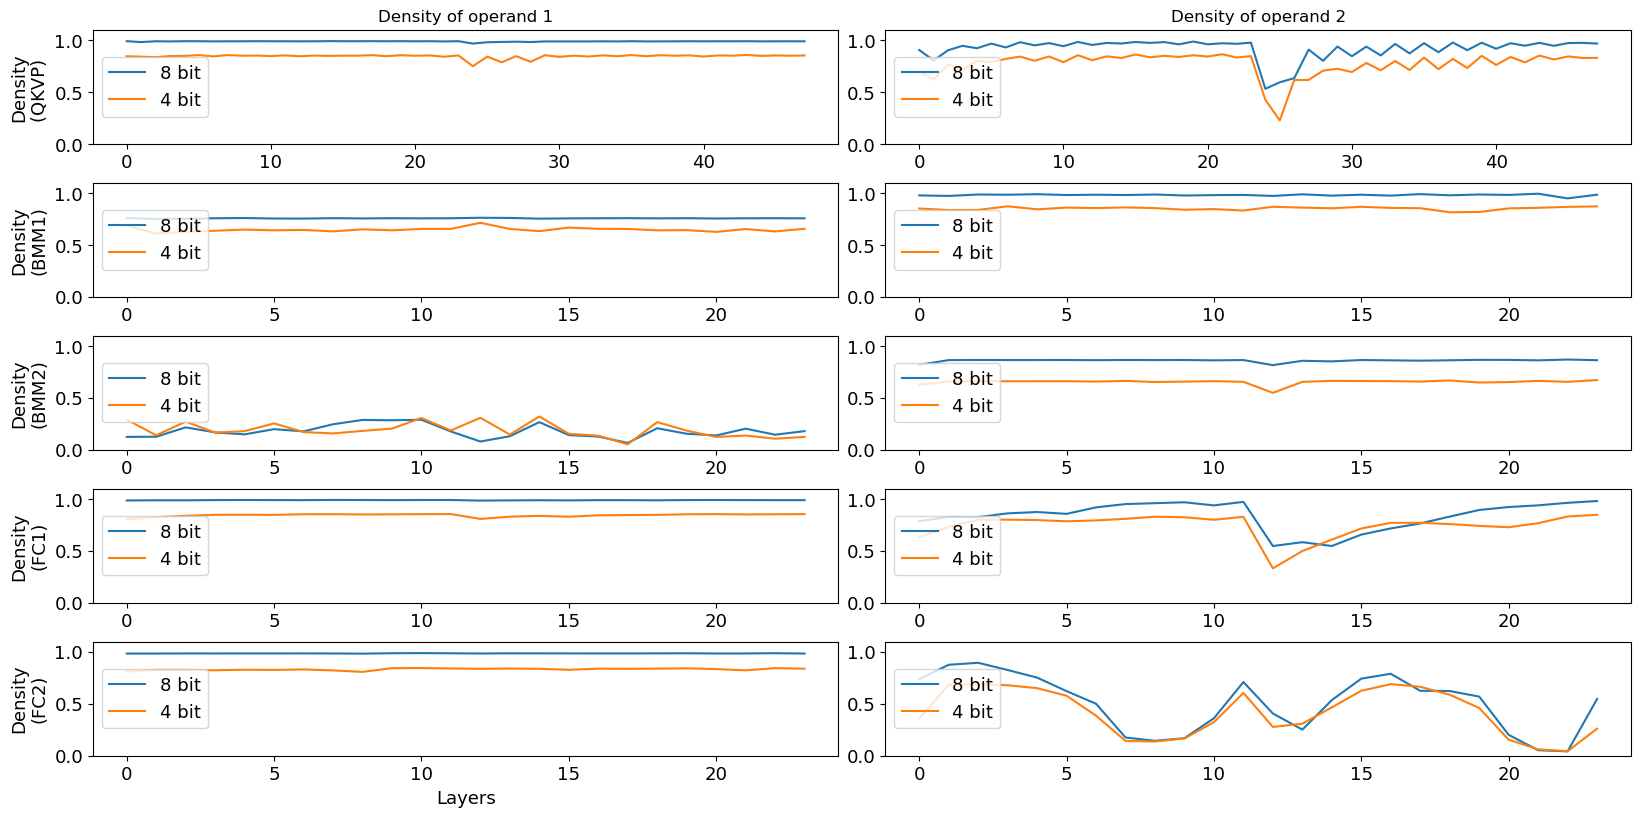

In [232]:

fig, axs = plt.subplots(nrows=5, ncols=2, figsize =(16, 8))

barWidth = 0.3
fontsize = 13
br1 = np.arange(len(w_d_8bit['poc']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

axs[0][0].set_title("Density of operand 1")
axs[0][1].set_title("Density of operand 2")

axs[0][0].plot(w_d_8bit['poc']['QKVP'], label = "8 bit")
axs[0][1].plot(i_d_8bit['poc']['QKVP'], label = "8 bit")

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1][0].plot(w_d_8bit['poc']['BMM1'],  label = "8 bit")
axs[1][1].plot(i_d_8bit['poc']['BMM1'], label = "8 bit")

axs[2][0].plot(w_d_8bit['poc']['BMM2'],label = "8 bit")
axs[2][1].plot(i_d_8bit['poc']['BMM2'],  label = "8 bit")

axs[3][0].plot(w_d_8bit['poc']['FC1'], label = "8 bit")
axs[3][1].plot(i_d_8bit['poc']['FC1'],  label = "8 bit")

axs[4][0].plot(w_d_8bit['poc']['FC2'], label = "8 bit")
axs[4][1].plot(i_d_8bit['poc']['FC2'],  label = "8 bit")


axs[0][0].plot(w_d_4bit['pvaw']['QKVP'], label = "4 bit")
axs[0][1].plot(i_d_4bit['pvaw']['QKVP'], label = "4 bit")

axs[1][0].plot(w_d_4bit['pvaw']['BMM1'],  label = "4 bit")
axs[1][1].plot(i_d_4bit['pvaw']['BMM1'], label = "4 bit")

axs[2][0].plot(w_d_4bit['pvaw']['BMM2'],label = "4 bit")
axs[2][1].plot(i_d_4bit['pvaw']['BMM2'],  label = "4 bit")

axs[3][0].plot(w_d_4bit['pvaw']['FC1'], label = "4 bit")
axs[3][1].plot(i_d_4bit['pvaw']['FC1'],  label = "4 bit")

axs[4][0].plot(w_d_4bit['pvaw']['FC2'], label = "4 bit")
axs[4][1].plot(i_d_4bit['pvaw']['FC2'],  label = "4 bit")

for i in range(5):
    for j in range(2):
        axs[i][j].set_ylim(0, 1.1)
fig.tight_layout()
#axs[0].set_title('8bit-poc')
#axs[0].set_title('4bit-pvaw')

axs[0][0].yaxis.set_label_position('left')
axs[0][0].set_ylabel('Density\n(QKVP) ', fontsize = fontsize)
axs[1][0].yaxis.set_label_position('left')
axs[1][0].set_ylabel('Density\n(BMM1)', fontsize = fontsize)
axs[2][0].yaxis.set_label_position('left')
axs[2][0].set_ylabel('Density\n(BMM2)', fontsize = fontsize)
axs[3][0].yaxis.set_label_position('left')
axs[3][0].set_ylabel('Density\n(FC1)', fontsize = fontsize)
axs[4][0].yaxis.set_label_position('left')
axs[4][0].set_ylabel('Density\n(FC2)', fontsize = fontsize)
axs[4][0].set_xlabel('Layers', fontsize = fontsize)
for i in range(5):
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=fontsize)
        axs[i][j].tick_params(axis='y', labelsize=fontsize)
        axs[i][j].legend(loc='center left', fontsize = fontsize)

#axs[4][1].legend()
plt.savefig("quant_density.pdf")


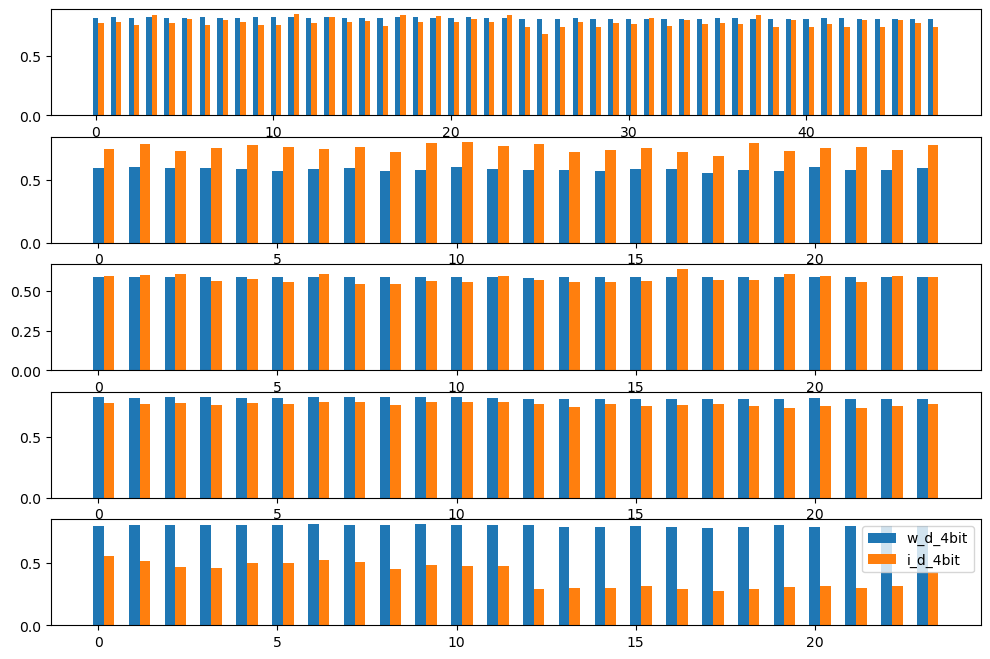

In [68]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize =(12, 8))

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

axs[0].bar(br1, w_d_4bit['poc']['QKVP'], width = barWidth, label = "w_d_4bit")
axs[0].bar(br2, i_d_4bit['poc']['QKVP'], width = barWidth, label = "i_d_4bit")

barWidth = 0.3
br1 = np.arange(len(w_d_4bit['poc']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1].bar(br1, w_d_4bit['poc']['BMM1'], width = barWidth, label = "w_d_4bit")
axs[1].bar(br2, i_d_4bit['poc']['BMM1'], width = barWidth, label = "i_d_4bit")

axs[2].bar(br1, w_d_4bit['poc']['BMM2'], width = barWidth, label = "w_d_4bit")
axs[2].bar(br2, i_d_4bit['poc']['BMM2'], width = barWidth, label = "i_d_4bit")

axs[3].bar(br1, w_d_4bit['poc']['FC1'], width = barWidth, label = "w_d_4bit")
axs[3].bar(br2, i_d_4bit['poc']['FC1'], width = barWidth, label = "i_d_4bit")

axs[4].bar(br1, w_d_4bit['poc']['FC2'], width = barWidth, label = "w_d_4bit")
axs[4].bar(br2, i_d_4bit['poc']['FC2'], width = barWidth, label = "i_d_4bit")
plt.legend()

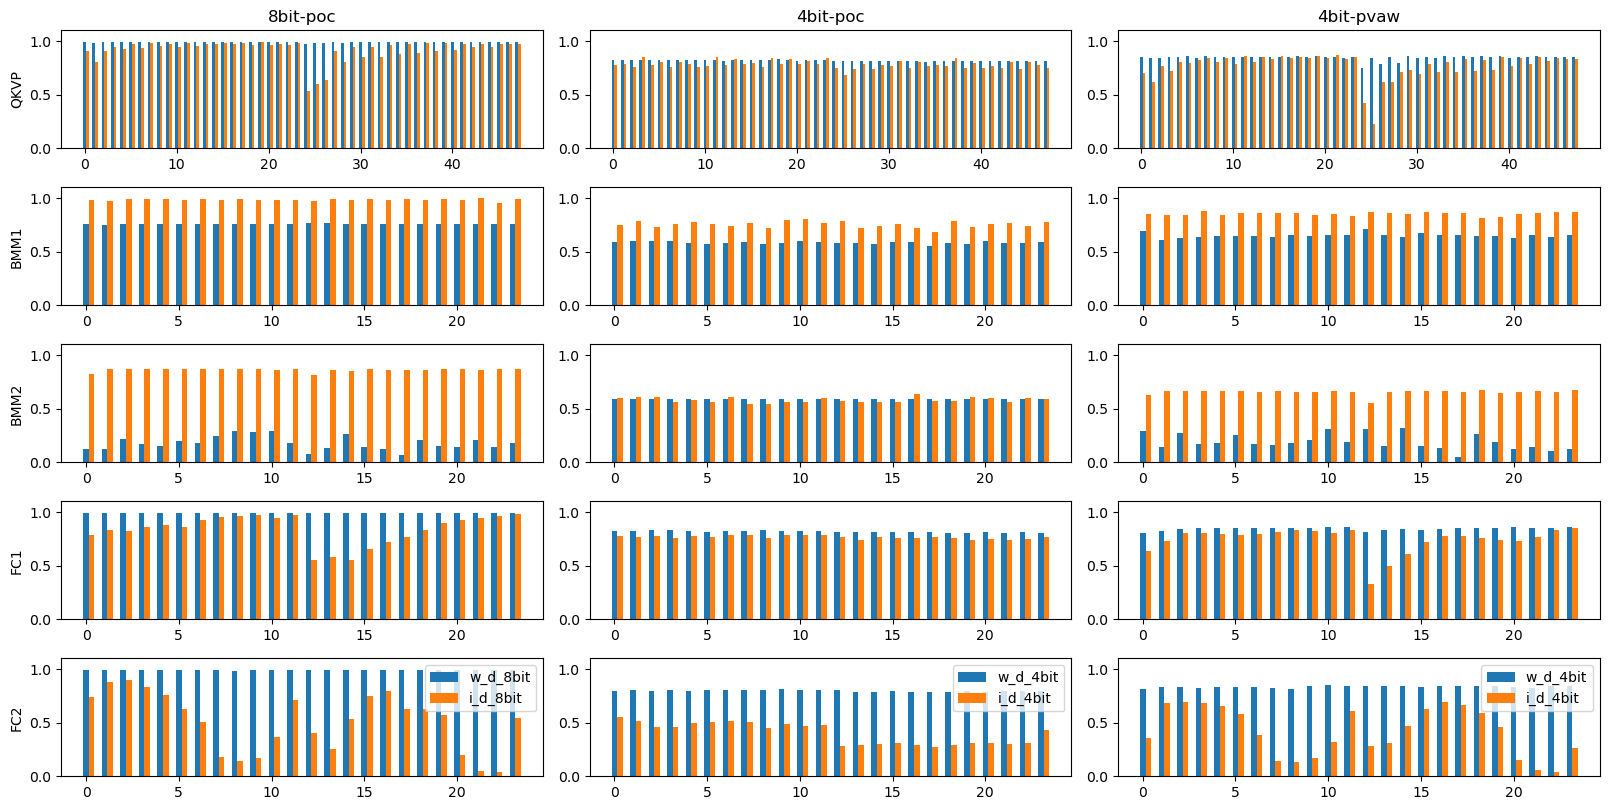

In [137]:

fig, axs = plt.subplots(nrows=5, ncols=3, figsize =(16, 8))

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

axs[0][0].bar(br1, w_d_8bit['poc']['QKVP'], width = barWidth, label = "w_d_8bit")
axs[0][0].bar(br2, i_d_8bit['poc']['QKVP'], width = barWidth, label = "i_d_8bit")

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1][0].bar(br1, w_d_8bit['poc']['BMM1'], width = barWidth, label = "w_d_8bit")
axs[1][0].bar(br2, i_d_8bit['poc']['BMM1'], width = barWidth, label = "i_d_8bit")

axs[2][0].bar(br1, w_d_8bit['poc']['BMM2'], width = barWidth, label = "w_d_8bit")
axs[2][0].bar(br2, i_d_8bit['poc']['BMM2'], width = barWidth, label = "i_d_8bit")

axs[3][0].bar(br1, w_d_8bit['poc']['FC1'], width = barWidth, label = "w_d_8bit")
axs[3][0].bar(br2, i_d_8bit['poc']['FC1'], width = barWidth, label = "i_d_8bit")

axs[4][0].bar(br1, w_d_8bit['poc']['FC2'], width = barWidth, label = "w_d_8bit")
axs[4][0].bar(br2, i_d_8bit['poc']['FC2'], width = barWidth, label = "i_d_8bit")

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

axs[0][1].bar(br1, w_d_4bit['poc']['QKVP'], width = barWidth, label = "w_d_4bit")
axs[0][1].bar(br2, i_d_4bit['poc']['QKVP'], width = barWidth, label = "i_d_4bit")

barWidth = 0.3
br1 = np.arange(len(w_d_4bit['poc']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1][1].bar(br1, w_d_4bit['poc']['BMM1'], width = barWidth, label = "w_d_4bit")
axs[1][1].bar(br2, i_d_4bit['poc']['BMM1'], width = barWidth, label = "i_d_4bit")

axs[2][1].bar(br1, w_d_4bit['poc']['BMM2'], width = barWidth, label = "w_d_4bit")
axs[2][1].bar(br2, i_d_4bit['poc']['BMM2'], width = barWidth, label = "i_d_4bit")

axs[3][1].bar(br1, w_d_4bit['poc']['FC1'], width = barWidth, label = "w_d_4bit")
axs[3][1].bar(br2, i_d_4bit['poc']['FC1'], width = barWidth, label = "i_d_4bit")

axs[4][1].bar(br1, w_d_4bit['poc']['FC2'], width = barWidth, label = "w_d_4bit")
axs[4][1].bar(br2, i_d_4bit['poc']['FC2'], width = barWidth, label = "i_d_4bit")

barWidth = 0.3
br1 = np.arange(len(w_d_4bit['pvaw']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

axs[0][2].bar(br1, w_d_4bit['pvaw']['QKVP'], width = barWidth, label = "w_d_4bit")
axs[0][2].bar(br2, i_d_4bit['pvaw']['QKVP'], width = barWidth, label = "i_d_4bit")

barWidth = 0.3
br1 = np.arange(len(w_d_4bit['pvaw']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1][2].bar(br1, w_d_4bit['pvaw']['BMM1'], width = barWidth, label = "w_d_4bit")
axs[1][2].bar(br2, i_d_4bit['pvaw']['BMM1'], width = barWidth, label = "i_d_4bit")

axs[2][2].bar(br1, w_d_4bit['pvaw']['BMM2'], width = barWidth, label = "w_d_4bit")
axs[2][2].bar(br2, i_d_4bit['pvaw']['BMM2'], width = barWidth, label = "i_d_4bit")

axs[3][2].bar(br1, w_d_4bit['pvaw']['FC1'], width = barWidth, label = "w_d_4bit")
axs[3][2].bar(br2, i_d_4bit['pvaw']['FC1'], width = barWidth, label = "i_d_4bit")

axs[4][2].bar(br1, w_d_4bit['pvaw']['FC2'], width = barWidth, label = "w_d_4bit")
axs[4][2].bar(br2, i_d_4bit['pvaw']['FC2'], width = barWidth, label = "i_d_4bit")

for i in range(5):
    for j in range(3):
        axs[i][j].set_ylim(0, 1.1)
fig.tight_layout()
axs[0][0].set_title('8bit-poc')
axs[0][1].set_title('4bit-poc')
axs[0][2].set_title('4bit-pvaw')

axs[0][0].yaxis.set_label_position('left')
axs[0][0].set_ylabel('QKVP')
axs[1][0].yaxis.set_label_position('left')
axs[1][0].set_ylabel('BMM1')
axs[2][0].yaxis.set_label_position('left')
axs[2][0].set_ylabel('BMM2')
axs[3][0].yaxis.set_label_position('left')
axs[3][0].set_ylabel('FC1')
axs[4][0].yaxis.set_label_position('left')
axs[4][0].set_ylabel('FC2')

axs[4][0].legend()
axs[4][1].legend()
axs[4][2].legend()
plt.savefig("quant_density.pdf")


First line
['layer', 'weight_density', 'input_density']
dict_keys(['poc'])
dict_keys(['pvaw'])
dict_keys(['QKVP', 'BMM1', 'BMM2', 'FC1', 'FC2'])
0.28010985694444446
0.19790870138888889


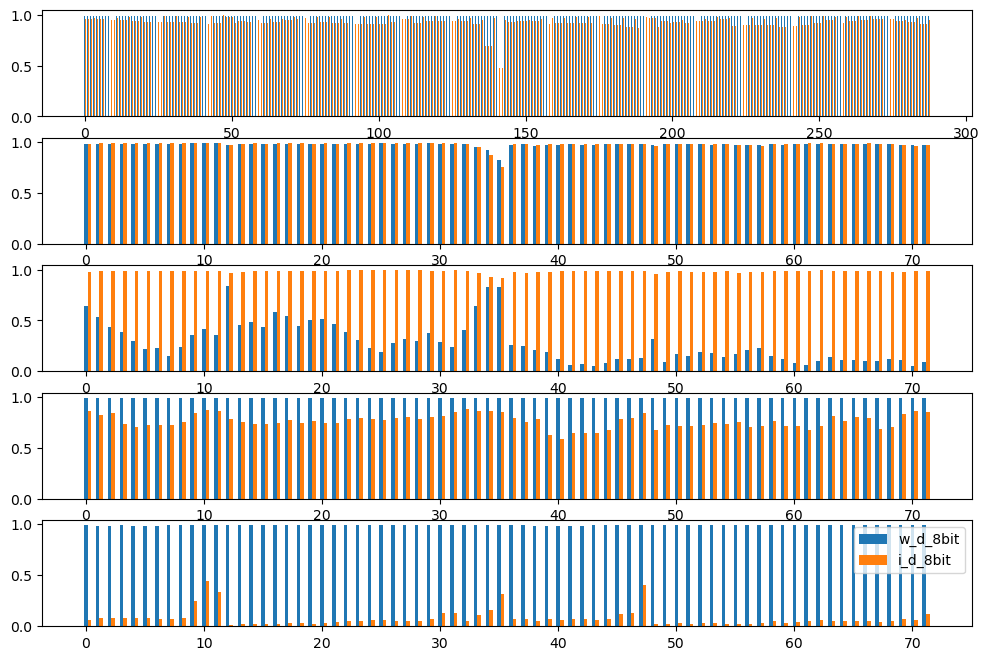

In [234]:
import csv
 
# s196_w8_a8_poc_0_QKVP_b1_s196_h6_m384
layer_id_8bit = {} # = np.array([])
w_d_8bit = {} #= np.array([])
i_d_8bit = {} #= np.array([])

layer_id_4bit = {} # np.array([])
w_d_4bit = {} #np.array([])
i_d_4bit = {} #np.array([])

with open('C:\\Users\\gjeong\\OneDrive - NVIDIA Corporation\\Desktop\\data\\bert.csv', mode ='r')as file:
   
  # reading the CSV file
  csvFile = csv.reader(file)
 
  # displaying the contents of the CSV file

  for lines in csvFile:
        assert(len(lines) == 3)
        if (lines[0] == 'layer'):
            print("First line")
            print(lines)
        else:
            layer_type = lines[0].split('_')[5]
            model_type = lines[0].split('_')[3]
            if lines[0].split('_')[1] == 'w8' and lines[0].split('_')[2] == 'a8':
                if model_type not in layer_id_8bit.keys():
                    layer_id_8bit[model_type] = {}
                    w_d_8bit[model_type] = {}
                    i_d_8bit[model_type] = {}
                if layer_type not in layer_id_8bit[model_type].keys():
                    layer_id_8bit[model_type][layer_type] = np.array([])
                    w_d_8bit[model_type][layer_type] = np.array([])
                    i_d_8bit[model_type][layer_type] = np.array([])
            
                layer_id_8bit[model_type][layer_type] = np.append(layer_id_8bit[model_type][layer_type], lines[0])
                w_d_8bit[model_type][layer_type] = np.append(w_d_8bit[model_type][layer_type], float(lines[1]))
                i_d_8bit[model_type][layer_type] = np.append(i_d_8bit[model_type][layer_type], float(lines[2]))
            
            elif lines[0].split('_')[1] == 'w4' and lines[0].split('_')[2] == 'a4':
                if model_type not in layer_id_4bit.keys():
                    layer_id_4bit[model_type] = {}
                    w_d_4bit[model_type] = {}
                    i_d_4bit[model_type] = {}
                if layer_type not in layer_id_4bit[model_type].keys():
                    layer_id_4bit[model_type][layer_type] = np.array([])
                    w_d_4bit[model_type][layer_type] = np.array([])
                    i_d_4bit[model_type][layer_type] = np.array([])
                
                layer_id_4bit[model_type][layer_type] = np.append(layer_id_4bit[model_type][layer_type], lines[0])
                w_d_4bit[model_type][layer_type] = np.append(w_d_4bit[model_type][layer_type], float(lines[1]))
                i_d_4bit[model_type][layer_type] = np.append(i_d_4bit[model_type][layer_type], float(lines[2]))
            else:
                print(lines)
                assert(False)
print(layer_id_8bit.keys())
print(layer_id_4bit.keys())
print(layer_id_8bit['poc'].keys())
print(np.mean(w_d_8bit['poc']['BMM2']))
print(np.mean(w_d_4bit['pvaw']['BMM2']))

fig, axs = plt.subplots(nrows=5, ncols=1, figsize =(12, 8))

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

axs[0].bar(br1, w_d_8bit['poc']['QKVP'], width = barWidth, label = "w_d_8bit")
axs[0].bar(br2, i_d_8bit['poc']['QKVP'], width = barWidth, label = "i_d_8bit")

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1].bar(br1, w_d_8bit['poc']['BMM1'], width = barWidth, label = "w_d_8bit")
axs[1].bar(br2, i_d_8bit['poc']['BMM1'], width = barWidth, label = "i_d_8bit")

axs[2].bar(br1, w_d_8bit['poc']['BMM2'], width = barWidth, label = "w_d_8bit")
axs[2].bar(br2, i_d_8bit['poc']['BMM2'], width = barWidth, label = "i_d_8bit")

axs[3].bar(br1, w_d_8bit['poc']['FC1'], width = barWidth, label = "w_d_8bit")
axs[3].bar(br2, i_d_8bit['poc']['FC1'], width = barWidth, label = "i_d_8bit")

axs[4].bar(br1, w_d_8bit['poc']['FC2'], width = barWidth, label = "w_d_8bit")
axs[4].bar(br2, i_d_8bit['poc']['FC2'], width = barWidth, label = "i_d_8bit")
plt.legend()


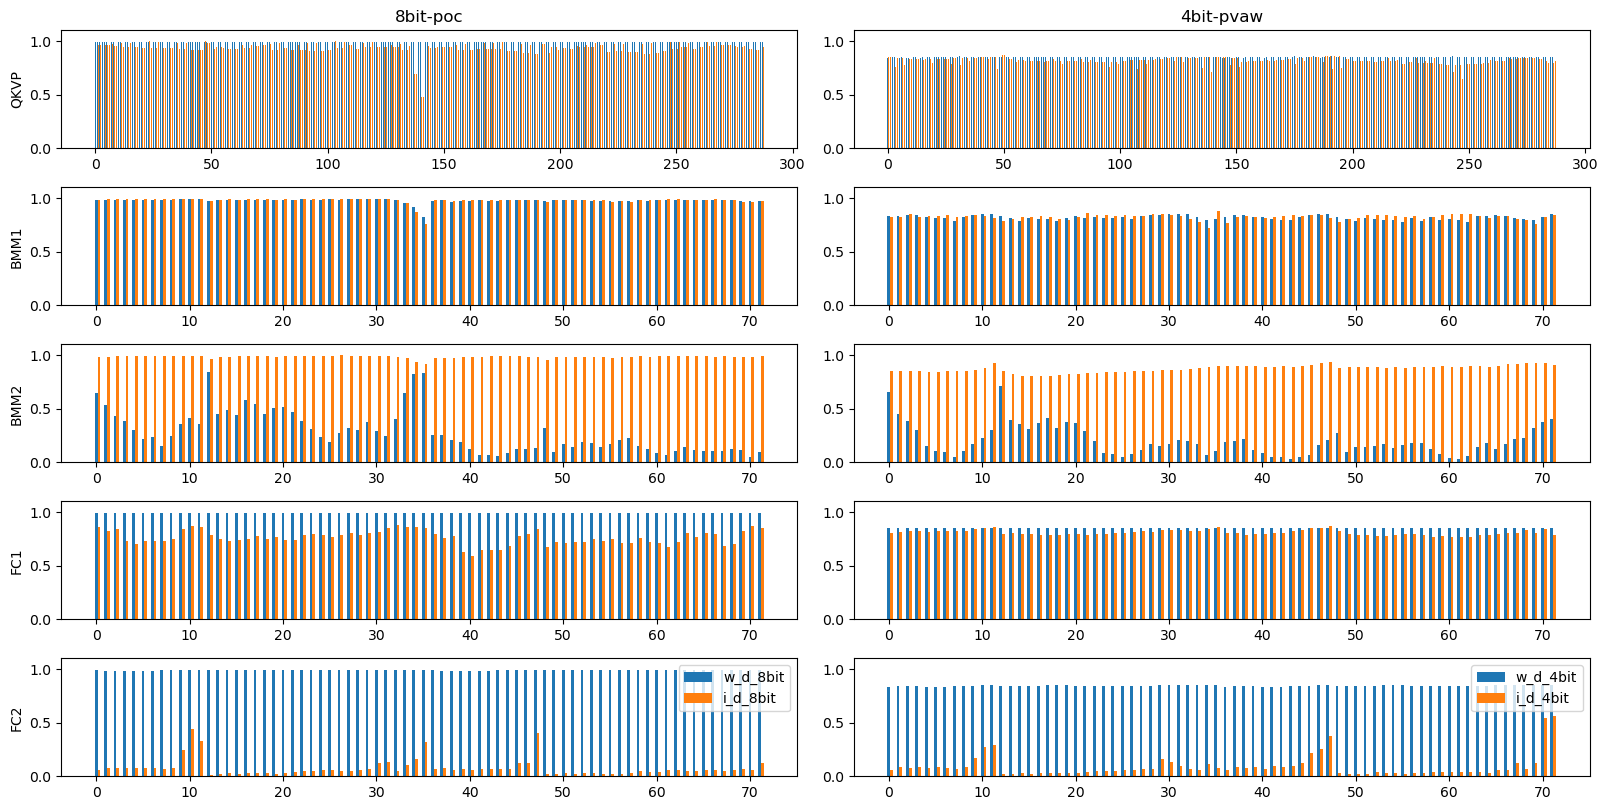

In [123]:

fig, axs = plt.subplots(nrows=5, ncols=2, figsize =(16, 8))

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

axs[0][0].bar(br1, w_d_8bit['poc']['QKVP'], width = barWidth, label = "w_d_8bit")
axs[0][0].bar(br2, i_d_8bit['poc']['QKVP'], width = barWidth, label = "i_d_8bit")

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1][0].bar(br1, w_d_8bit['poc']['BMM1'], width = barWidth, label = "w_d_8bit")
axs[1][0].bar(br2, i_d_8bit['poc']['BMM1'], width = barWidth, label = "i_d_8bit")

axs[2][0].bar(br1, w_d_8bit['poc']['BMM2'], width = barWidth, label = "w_d_8bit")
axs[2][0].bar(br2, i_d_8bit['poc']['BMM2'], width = barWidth, label = "i_d_8bit")

axs[3][0].bar(br1, w_d_8bit['poc']['FC1'], width = barWidth, label = "w_d_8bit")
axs[3][0].bar(br2, i_d_8bit['poc']['FC1'], width = barWidth, label = "i_d_8bit")

axs[4][0].bar(br1, w_d_8bit['poc']['FC2'], width = barWidth, label = "w_d_8bit")
axs[4][0].bar(br2, i_d_8bit['poc']['FC2'], width = barWidth, label = "i_d_8bit")

barWidth = 0.3
br1 = np.arange(len(w_d_4bit['pvaw']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

axs[0][1].bar(br1, w_d_4bit['pvaw']['QKVP'], width = barWidth, label = "w_d_4bit")
axs[0][1].bar(br2, i_d_4bit['pvaw']['QKVP'], width = barWidth, label = "i_d_4bit")

barWidth = 0.3
br1 = np.arange(len(w_d_4bit['pvaw']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1][1].bar(br1, w_d_4bit['pvaw']['BMM1'], width = barWidth, label = "w_d_4bit")
axs[1][1].bar(br2, i_d_4bit['pvaw']['BMM1'], width = barWidth, label = "i_d_4bit")

axs[2][1].bar(br1, w_d_4bit['pvaw']['BMM2'], width = barWidth, label = "w_d_4bit")
axs[2][1].bar(br2, i_d_4bit['pvaw']['BMM2'], width = barWidth, label = "i_d_4bit")

axs[3][1].bar(br1, w_d_4bit['pvaw']['FC1'], width = barWidth, label = "w_d_4bit")
axs[3][1].bar(br2, i_d_4bit['pvaw']['FC1'], width = barWidth, label = "i_d_4bit")

axs[4][1].bar(br1, w_d_4bit['pvaw']['FC2'], width = barWidth, label = "w_d_4bit")
axs[4][1].bar(br2, i_d_4bit['pvaw']['FC2'], width = barWidth, label = "i_d_4bit")

for i in range(5):
    for j in range(2):
        axs[i][j].set_ylim(0, 1.1)
fig.tight_layout()
axs[0][0].set_title('8bit-poc')
axs[0][1].set_title('4bit-pvaw')

axs[0][0].yaxis.set_label_position('left')
axs[0][0].set_ylabel('QKVP')
axs[1][0].yaxis.set_label_position('left')
axs[1][0].set_ylabel('BMM1')
axs[2][0].yaxis.set_label_position('left')
axs[2][0].set_ylabel('BMM2')
axs[3][0].yaxis.set_label_position('left')
axs[3][0].set_ylabel('FC1')
axs[4][0].yaxis.set_label_position('left')
axs[4][0].set_ylabel('FC2')

axs[4][0].legend()
axs[4][1].legend()
plt.savefig("quant_density.pdf")


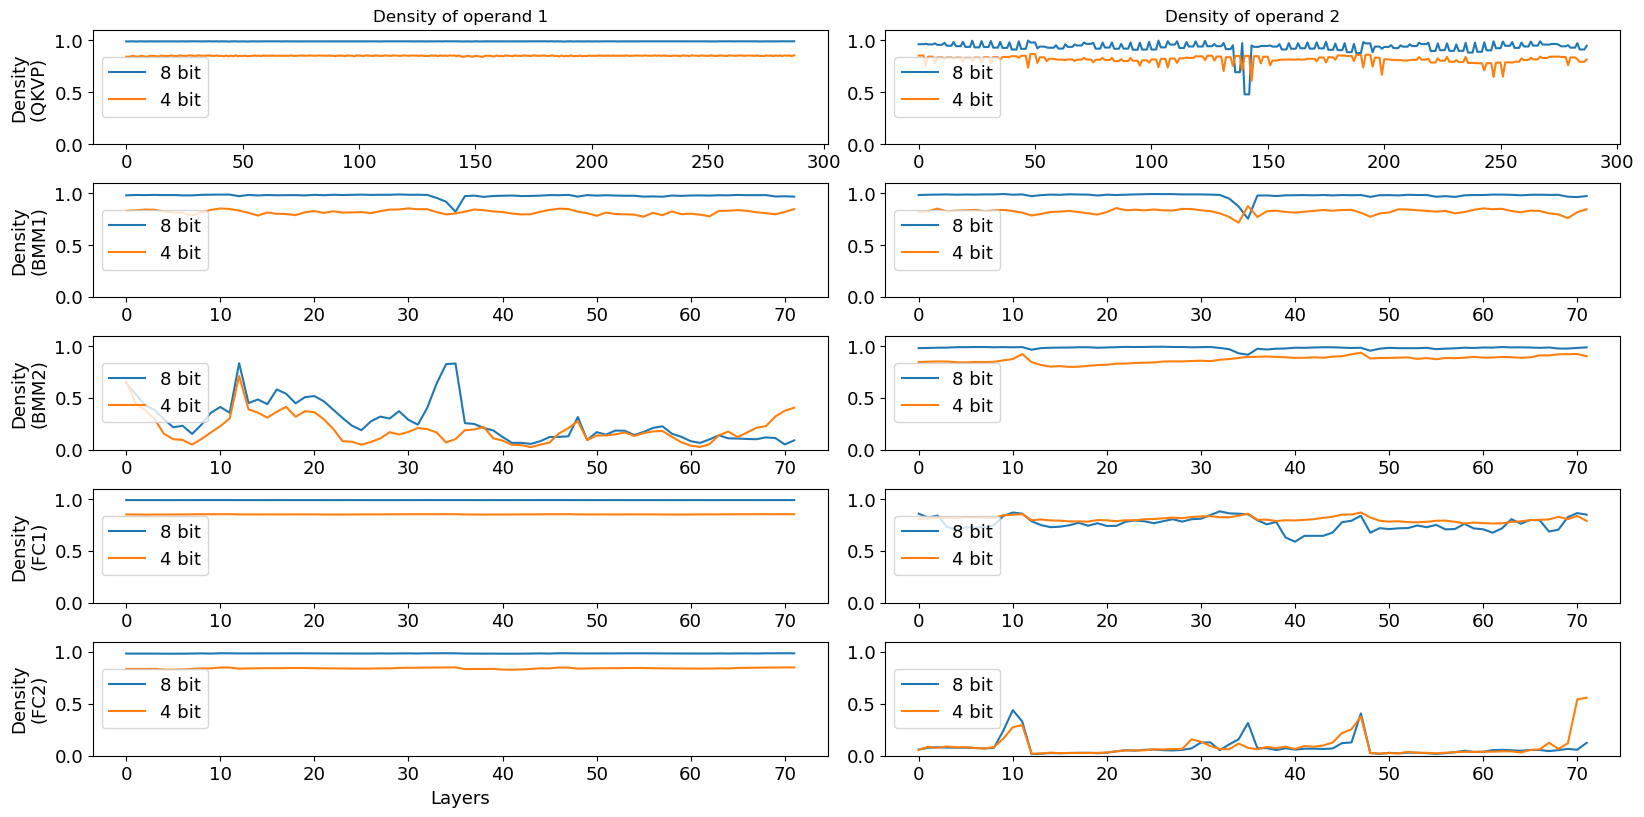

In [256]:

fig, axs = plt.subplots(nrows=5, ncols=2, figsize =(16, 8))

barWidth = 0.3
fontsize = 13
br1 = np.arange(len(w_d_8bit['poc']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[0][0].set_title("Density of operand 1")
axs[0][1].set_title("Density of operand 2")

axs[0][0].plot(w_d_8bit['poc']['QKVP'], label = "8 bit")
axs[0][1].plot(i_d_8bit['poc']['QKVP'], label = "8 bit")

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1][0].plot(w_d_8bit['poc']['BMM1'],  label = "8 bit")
axs[1][1].plot(i_d_8bit['poc']['BMM1'], label = "8 bit")

axs[2][0].plot(w_d_8bit['poc']['BMM2'],label = "8 bit")
axs[2][1].plot(i_d_8bit['poc']['BMM2'],  label = "8 bit")

axs[3][0].plot(w_d_8bit['poc']['FC1'], label = "8 bit")
axs[3][1].plot(i_d_8bit['poc']['FC1'],  label = "8 bit")

axs[4][0].plot(w_d_8bit['poc']['FC2'], label = "8 bit")
axs[4][1].plot(i_d_8bit['poc']['FC2'],  label = "8 bit")


axs[0][0].plot(w_d_4bit['pvaw']['QKVP'], label = "4 bit")
axs[0][1].plot(i_d_4bit['pvaw']['QKVP'], label = "4 bit")


axs[1][0].plot(w_d_4bit['pvaw']['BMM1'],  label = "4 bit")
axs[1][1].plot(i_d_4bit['pvaw']['BMM1'], label = "4 bit")

axs[2][0].plot(w_d_4bit['pvaw']['BMM2'],label = "4 bit")
axs[2][1].plot(i_d_4bit['pvaw']['BMM2'],  label = "4 bit")

axs[3][0].plot(w_d_4bit['pvaw']['FC1'], label = "4 bit")
axs[3][1].plot(i_d_4bit['pvaw']['FC1'],  label = "4 bit")

axs[4][0].plot(w_d_4bit['pvaw']['FC2'], label = "4 bit")
axs[4][1].plot(i_d_4bit['pvaw']['FC2'],  label = "4 bit")

'''
barWidth = 0.3
br1 = np.arange(len(w_d_4bit['pvaw']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

axs[0][1].bar(br1, w_d_4bit['pvaw']['QKVP'], width = barWidth, label = "w_d_4bit")
axs[0][1].bar(br2, i_d_4bit['pvaw']['QKVP'], width = barWidth, label = "i_d_4bit")

barWidth = 0.3
br1 = np.arange(len(w_d_4bit['pvaw']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1][1].bar(br1, w_d_4bit['pvaw']['BMM1'], width = barWidth, label = "w_d_4bit")
axs[1][1].bar(br2, i_d_4bit['pvaw']['BMM1'], width = barWidth, label = "i_d_4bit")

axs[2][1].bar(br1, w_d_4bit['pvaw']['BMM2'], width = barWidth, label = "w_d_4bit")
axs[2][1].bar(br2, i_d_4bit['pvaw']['BMM2'], width = barWidth, label = "i_d_4bit")

axs[3][1].bar(br1, w_d_4bit['pvaw']['FC1'], width = barWidth, label = "w_d_4bit")
axs[3][1].bar(br2, i_d_4bit['pvaw']['FC1'], width = barWidth, label = "i_d_4bit")

axs[4][1].bar(br1, w_d_4bit['pvaw']['FC2'], width = barWidth, label = "w_d_4bit")
axs[4][1].bar(br2, i_d_4bit['pvaw']['FC2'], width = barWidth, label = "i_d_4bit")
'''
for i in range(5):
    for j in range(2):
        axs[i][j].set_ylim(0, 1.1)
fig.tight_layout()
#axs[0].set_title('8bit-poc')
#axs[0].set_title('4bit-pvaw')

axs[0][0].yaxis.set_label_position('left')
axs[0][0].set_ylabel('Density\n(QKVP) ', fontsize = fontsize)
axs[1][0].yaxis.set_label_position('left')
axs[1][0].set_ylabel('Density\n(BMM1)', fontsize = fontsize)
axs[2][0].yaxis.set_label_position('left')
axs[2][0].set_ylabel('Density\n(BMM2)', fontsize = fontsize)
axs[3][0].yaxis.set_label_position('left')
axs[3][0].set_ylabel('Density\n(FC1)', fontsize = fontsize)
axs[4][0].yaxis.set_label_position('left')
axs[4][0].set_ylabel('Density\n(FC2)', fontsize = fontsize)
axs[4][0].set_xlabel('Layers', fontsize = fontsize)
for i in range(5):
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=fontsize)
        axs[i][j].tick_params(axis='y', labelsize=fontsize)
        axs[i][j].legend(loc='center left', fontsize = fontsize)
#axs[1].legend(loc='center left', fontsize = fontsize)
#axs[2].legend(loc='center left', fontsize = fontsize)
#axs[3].legend(loc='center left', fontsize = fontsize)
#axs[4].legend(loc='center left', fontsize = fontsize)
#axs[4][1].legend()
plt.savefig("quant_density.pdf")


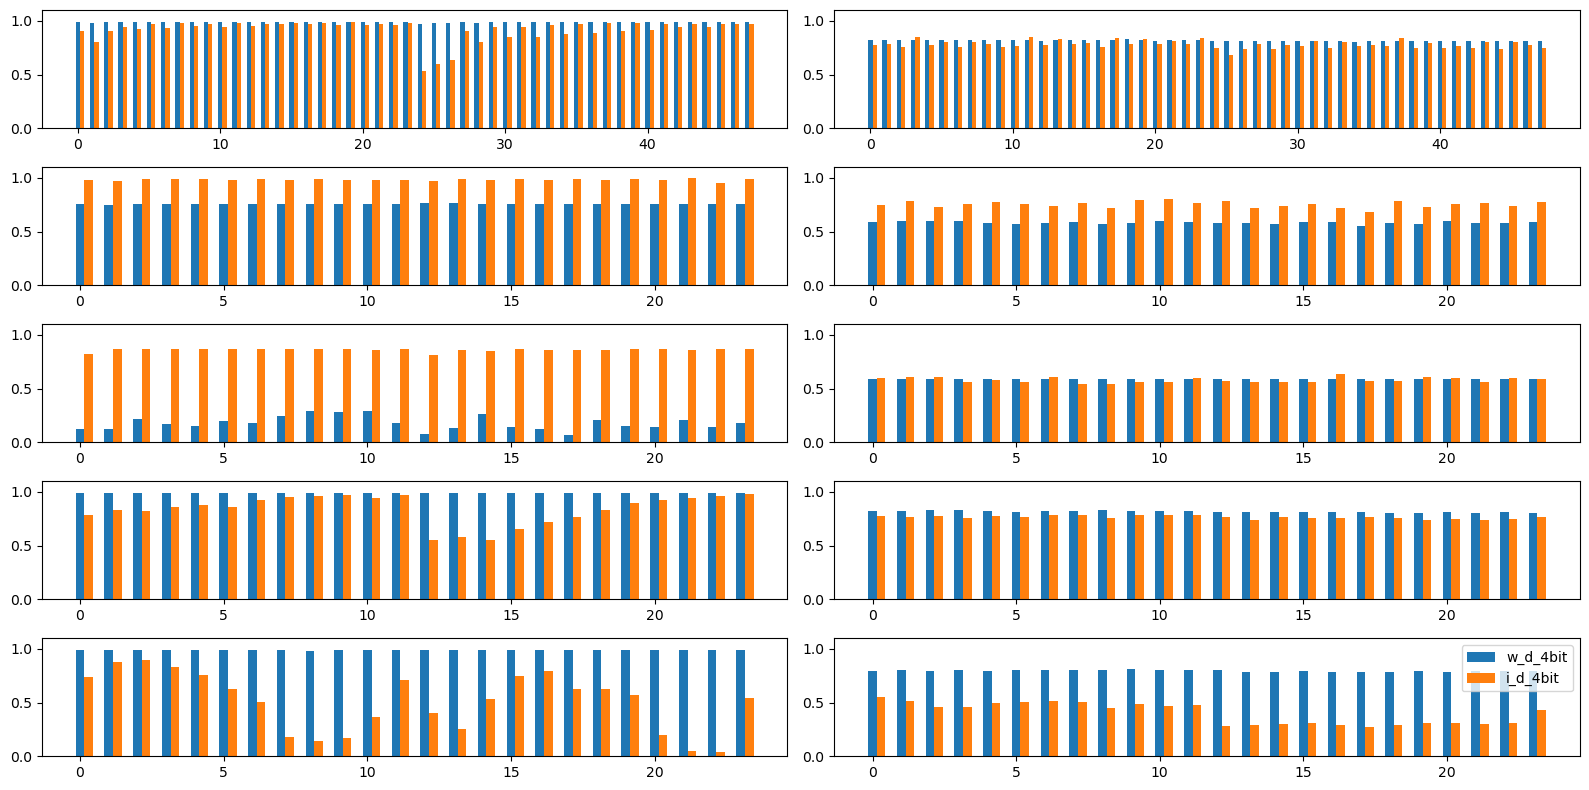

In [119]:

fig, axs = plt.subplots(nrows=5, ncols=2, figsize =(16, 8))

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

axs[0][0].bar(br1, w_d_8bit['poc']['QKVP'], width = barWidth, label = "w_d_8bit")
axs[0][0].bar(br2, i_d_8bit['poc']['QKVP'], width = barWidth, label = "i_d_8bit")

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1][0].bar(br1, w_d_8bit['poc']['BMM1'], width = barWidth, label = "w_d_8bit")
axs[1][0].bar(br2, i_d_8bit['poc']['BMM1'], width = barWidth, label = "i_d_8bit")

axs[2][0].bar(br1, w_d_8bit['poc']['BMM2'], width = barWidth, label = "w_d_8bit")
axs[2][0].bar(br2, i_d_8bit['poc']['BMM2'], width = barWidth, label = "i_d_8bit")

axs[3][0].bar(br1, w_d_8bit['poc']['FC1'], width = barWidth, label = "w_d_8bit")
axs[3][0].bar(br2, i_d_8bit['poc']['FC1'], width = barWidth, label = "i_d_8bit")

axs[4][0].bar(br1, w_d_8bit['poc']['FC2'], width = barWidth, label = "w_d_8bit")
axs[4][0].bar(br2, i_d_8bit['poc']['FC2'], width = barWidth, label = "i_d_8bit")

barWidth = 0.3
br1 = np.arange(len(w_d_8bit['poc']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

axs[0][1].bar(br1, w_d_4bit['poc']['QKVP'], width = barWidth, label = "w_d_4bit")
axs[0][1].bar(br2, i_d_4bit['poc']['QKVP'], width = barWidth, label = "i_d_4bit")

barWidth = 0.3
br1 = np.arange(len(w_d_4bit['poc']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1][1].bar(br1, w_d_4bit['poc']['BMM1'], width = barWidth, label = "w_d_4bit")
axs[1][1].bar(br2, i_d_4bit['poc']['BMM1'], width = barWidth, label = "i_d_4bit")

axs[2][1].bar(br1, w_d_4bit['poc']['BMM2'], width = barWidth, label = "w_d_4bit")
axs[2][1].bar(br2, i_d_4bit['poc']['BMM2'], width = barWidth, label = "i_d_4bit")

axs[3][1].bar(br1, w_d_4bit['poc']['FC1'], width = barWidth, label = "w_d_4bit")
axs[3][1].bar(br2, i_d_4bit['poc']['FC1'], width = barWidth, label = "i_d_4bit")

axs[4][1].bar(br1, w_d_4bit['poc']['FC2'], width = barWidth, label = "w_d_4bit")
axs[4][1].bar(br2, i_d_4bit['poc']['FC2'], width = barWidth, label = "i_d_4bit")

for i in range(5):
    for j in range(2):
        axs[i][j].set_ylim(0, 1.1)
fig.tight_layout()
axs[4][1].legend()
plt.savefig("quant_density.pdf")


First line
['layer', 'weight_density', 'input_density']
576
2304


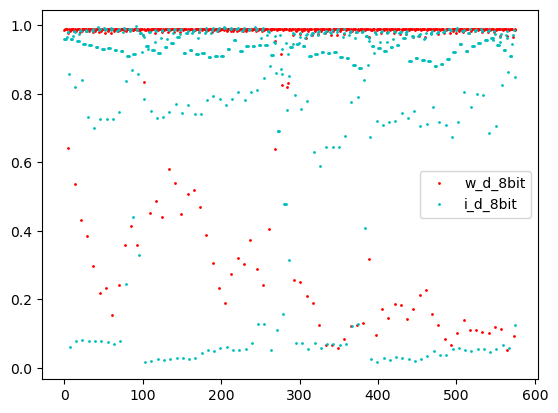

In [39]:
import csv
 
# s196_w8_a8_poc_0_QKVP_b1_s196_h6_m384
layer_id_8bit = np.array([])
w_d_8bit = np.array([])
i_d_8bit = np.array([])

layer_id_4bit = np.array([])
w_d_4bit = np.array([])
i_d_4bit = np.array([])

with open('C:\\Users\\gjeong\\OneDrive - NVIDIA Corporation\\Desktop\\data\\bert.csv', mode ='r')as file:
   
  # reading the CSV file
  csvFile = csv.reader(file)
 
  # displaying the contents of the CSV file

  for lines in csvFile:
        assert(len(lines) == 3)
        if (lines[0] == 'layer'):
            print("First line")
            print(lines)
        else:
            if lines[0].split('_')[1] == 'w8' and lines[0].split('_')[2] == 'a8':
                layer_id_8bit = np.append(layer_id_8bit, lines[0])
                w_d_8bit = np.append(w_d_8bit, float(lines[1]))
                i_d_8bit = np.append(i_d_8bit, float(lines[2]))
            elif lines[0].split('_')[1] == 'w4' and lines[0].split('_')[2] == 'a4':
                layer_id_4bit = np.append(layer_id_4bit, lines[0])
                w_d_4bit = np.append(w_d_4bit, float(lines[1]))
                i_d_4bit = np.append(i_d_4bit, float(lines[2]))
            else:
                print(lines)
                assert(False)

print(len(layer_id_8bit))
print(len(layer_id_4bit))
plt.plot(w_d_8bit, 'o-r', label = "w_d_8bit", linewidth=0, markersize = 1)
plt.plot(i_d_8bit, 'o-c', label = "i_d_8bit", linewidth=0, markersize = 1)
plt.legend()


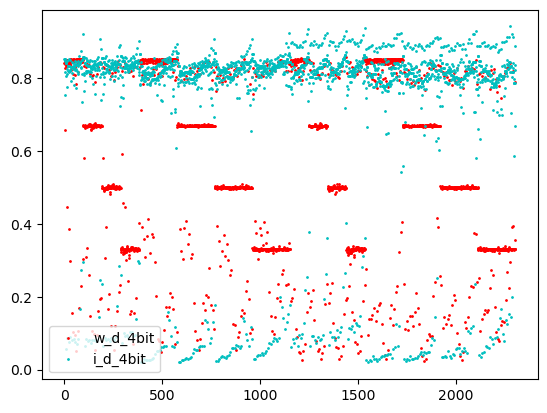

In [40]:
plt.plot(w_d_4bit, 'o-r', label = "w_d_4bit", linewidth=0, markersize = 1)
plt.plot(i_d_4bit, 'o-c', label = "i_d_4bit", linewidth=0, markersize = 1)
plt.legend()

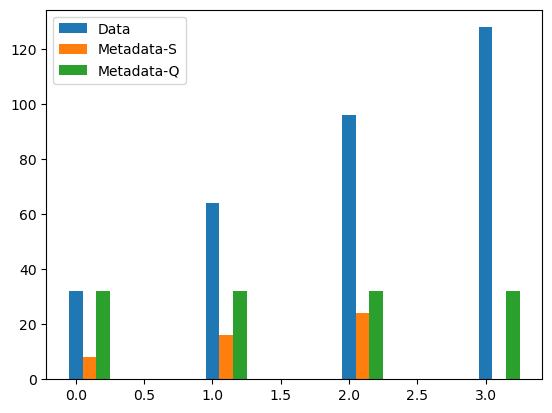

In [106]:
# 8bit W I -> FP32 O
# 1:4 = 4:16 --- 1:16
# 32bit W I -> FP32 O

barWidth = 0.1
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1, [8*4, 8*4*2, 8*4*3, 8*4*4], width=barWidth, label = 'Data')
plt.bar(br2, [2*4 , 2*4*2, 2*4*3, 0], width=barWidth, label = 'Metadata-S')
plt.bar(br3, [32, 32, 32, 32], width=barWidth, label = 'Metadata-Q')
plt.legend()
#plt.bar(br4, [8*4*4, 0, 32], width=barWidth)

#axs[0].bar(br1, w_d_8bit['poc']['QKVP'], width = barWidth, label = "w_d_8bit")
#axs[0].bar(br2, i_d_8bit['poc']['QKVP'], width = barWidth, label = "i_d_8bit")

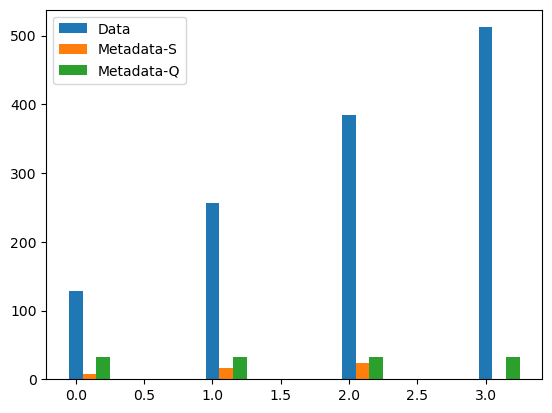

In [107]:
# 8bit W I -> FP32 O
# 1:4 = 4:16 --- 1:16
# 32bit W I -> FP32 O

barWidth = 0.1
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1, [32*4, 32*4*2, 32*4*3, 32*4*4], width=barWidth, label = 'Data')
plt.bar(br2, [2*4 , 2*4*2, 2*4*3, 0], width=barWidth, label = 'Metadata-S')
plt.bar(br3, [32, 32, 32, 32], width=barWidth, label = 'Metadata-Q')
plt.legend()
#plt.bar(br4, [8*4*4, 0, 32], width=barWidth)

#axs[0].bar(br1, w_d_8bit['poc']['QKVP'], width = barWidth, label = "w_d_8bit")
#axs[0].bar(br2, i_d_8bit['poc']['QKVP'], width = barWidth, label = "i_d_8bit")

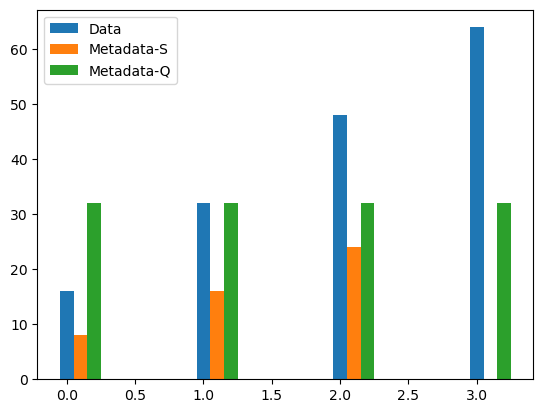

In [108]:
# 8bit W I -> FP32 O
# 1:4 = 4:16 --- 1:16
# 32bit W I -> FP32 O

barWidth = 0.1
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1, [4*4, 4*4*2, 4*4*3, 4*4*4], width=barWidth, label = 'Data')
plt.bar(br2, [2*4 , 2*4*2, 2*4*3, 0], width=barWidth, label = 'Metadata-S')
plt.bar(br3, [32, 32, 32, 32], width=barWidth, label = 'Metadata-Q')
plt.legend()
#plt.bar(br4, [8*4*4, 0, 32], width=barWidth)

#axs[0].bar(br1, w_d_8bit['poc']['QKVP'], width = barWidth, label = "w_d_8bit")
#axs[0].bar(br2, i_d_8bit['poc']['QKVP'], width = barWidth, label = "i_d_8bit")

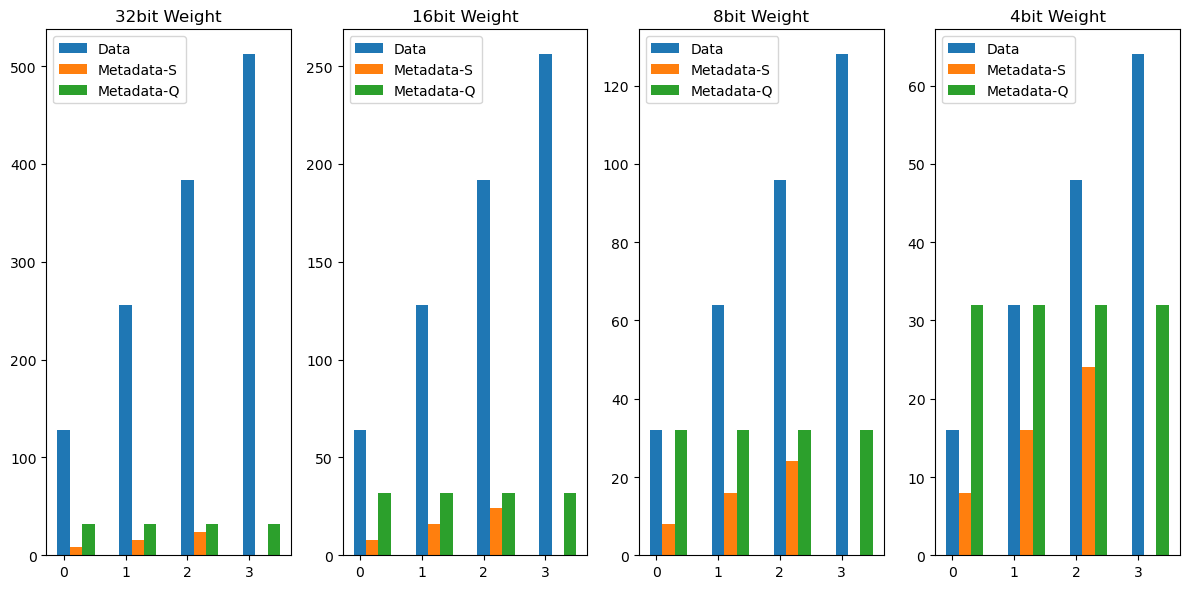

In [142]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize =(12, 6))

barWidth = 0.2
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
axs[0].set_title('32bit Weight')
axs[0].bar(br1, [32*4, 32*4*2, 32*4*3, 32*4*4], width=barWidth, label = 'Data')
axs[0].bar(br2, [2*4 , 2*4*2, 2*4*3, 0], width=barWidth, label = 'Metadata-S')
axs[0].bar(br3, [32, 32, 32, 32], width=barWidth, label = 'Metadata-Q')
axs[0].legend()

axs[1].set_title('16bit Weight')
axs[1].bar(br1, [16*4, 16*4*2, 16*4*3, 16*4*4], width=barWidth, label = 'Data')
axs[1].bar(br2, [2*4 , 2*4*2, 2*4*3, 0], width=barWidth, label = 'Metadata-S')
axs[1].bar(br3, [32, 32, 32, 32], width=barWidth, label = 'Metadata-Q')
axs[1].legend()

axs[2].set_title('8bit Weight')
axs[2].bar(br1, [8*4, 8*4*2, 8*4*3, 8*4*4], width=barWidth, label = 'Data')
axs[2].bar(br2, [2*4 , 2*4*2, 2*4*3, 0], width=barWidth, label = 'Metadata-S')
axs[2].bar(br3, [32, 32, 32, 32], width=barWidth, label = 'Metadata-Q')
axs[2].legend()

axs[3].set_title('4bit Weight')
axs[3].bar(br1, [4*4, 4*4*2, 4*4*3, 4*4*4], width=barWidth, label = 'Data')
axs[3].bar(br2, [2*4 , 2*4*2, 2*4*3, 0], width=barWidth, label = 'Metadata-S')
axs[3].bar(br3, [32, 32, 32, 32], width=barWidth, label = 'Metadata-Q')
axs[3].legend()
plt.tight_layout()
plt.savefig("metadata.pdf")


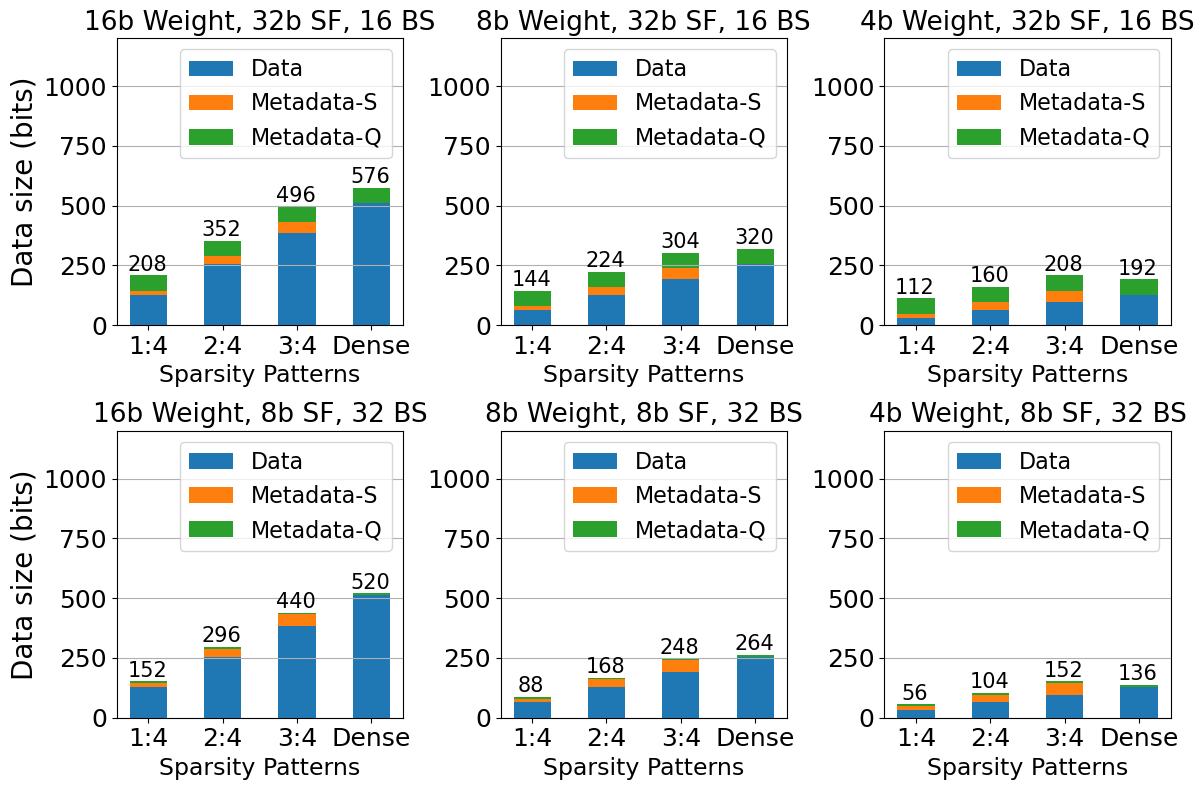

In [255]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize =(12, 8))

barWidth = 0.5
fontsize= 20
l=[0, 1, 2, 3]

br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

#data_32 = np.array([32*4, 32*4*2, 32*4*3, 32*4*4])
#meta_s_32 = np.array([2*4 , 2*4*2, 2*4*3, 0])
#meta_q_32 = np.array([32, 32, 32, 32])
#axs[0].bar(br1, data_32, width=barWidth, label = 'Data')
#axs[0].bar(br1, meta_s_32, bottom=data_32,  width=barWidth, label = 'Metadata-S')
#axs[0].bar(br1, meta_q_32, bottom=data_32 + meta_s_32,  width=barWidth, label = 'Metadata-Q')
#axs[0].legend()

data_16 = 2*np.array([16*4, 16*4*2, 16*4*3, 16*4*4])
meta_s_16 = 2*np.array([2*4 , 2*4*2, 2*4*3, 0])
meta_q_16 = 2*np.array([32, 32, 32, 32])
axs[0][0].bar(br1, data_16, width=barWidth, label = 'Data')
axs[0][0].bar(br1, meta_s_16, bottom=data_16, width=barWidth, label = 'Metadata-S')
axs[0][0].bar(br1, meta_q_16, bottom=data_16 + meta_s_16, width=barWidth, label = 'Metadata-Q')
#axs[1].legend()
for i in range(len(br1)):
    x_delta = 0.2
    data_sum = data_16[i] + meta_s_16[i] + meta_q_16[i]
    if data_sum >= 100:
        x_delta = 0.28
    axs[0][0].text(br1[i] - x_delta, data_sum+20, str(data_sum), fontsize=fontsize-5)


data_8 = 2*np.array([8*4, 8*4*2, 8*4*3, 8*4*4])
meta_s_8 = 2*np.array( [2*4 , 2*4*2, 2*4*3, 0])
meta_q_8 = 2*np.array([32, 32, 32, 32])
axs[0][1].bar(br1, data_8, width=barWidth, label = 'Data')
axs[0][1].bar(br1, meta_s_8, bottom=data_8, width=barWidth, label = 'Metadata-S')
axs[0][1].bar(br1, meta_q_8, bottom=data_8 + meta_s_8, width=barWidth, label = 'Metadata-Q')
#axs[2].legend()
for i in range(len(br1)):
    x_delta = 0.2
    data_sum = data_8[i] + meta_s_8[i] + meta_q_8[i]
    if data_sum >= 100:
        x_delta = 0.28
    axs[0][1].text(br1[i] - x_delta, data_sum+20, str(data_sum), fontsize=fontsize-5)


data_4 = 2*np.array([4*4, 4*4*2, 4*4*3, 4*4*4])
meta_s_4 = 2*np.array([2*4 , 2*4*2, 2*4*3, 0])
meta_q_4 = 2*np.array([32, 32, 32, 32])
axs[0][2].bar(br1, data_4, width=barWidth, label = 'Data')
axs[0][2].bar(br1, meta_s_4, bottom=data_4, width=barWidth, label = 'Metadata-S')
axs[0][2].bar(br1, meta_q_4, bottom=data_4+meta_s_4, width=barWidth, label = 'Metadata-Q')
#####
for i in range(len(br1)):
    x_delta = 0.2
    data_sum = data_4[i] + meta_s_4[i] + meta_q_4[i]
    if data_sum >= 100:
        x_delta = 0.28
    axs[0][2].text(br1[i] - x_delta, data_sum+20, str(data_sum), fontsize=fontsize-5)


data_16 = np.array([16*4*2, 16*4*2*2, 16*4*3*2, 16*4*4*2])
meta_s_16 = np.array([2*4*2 , 2*4*2*2, 2*4*3*2, 0])
meta_q_16 = np.array([8, 8, 8, 8])
axs[1][0].bar(br1, data_16, width=barWidth, label = 'Data')
axs[1][0].bar(br1, meta_s_16, bottom=data_16, width=barWidth, label = 'Metadata-S')
axs[1][0].bar(br1, meta_q_16, bottom=data_16 + meta_s_16, width=barWidth, label = 'Metadata-Q')
#axs[1].legend()
for i in range(len(br1)):
    x_delta = 0.2
    data_sum = data_16[i] + meta_s_16[i] + meta_q_16[i]
    if data_sum >= 100:
        x_delta = 0.28
    axs[1][0].text(br1[i] - x_delta, data_sum+20, str(data_sum), fontsize=fontsize-5)



data_8 = np.array([8*4*2, 8*4*2*2, 8*4*3*2, 8*4*4*2])
meta_s_8 = np.array( [2*4*2 , 2*4*2*2, 2*4*3*2, 0])
meta_q_8 = np.array([8, 8, 8, 8])
axs[1][1].bar(br1, data_8, width=barWidth, label = 'Data')
axs[1][1].bar(br1, meta_s_8, bottom=data_8, width=barWidth, label = 'Metadata-S')
axs[1][1].bar(br1, meta_q_8, bottom=data_8 + meta_s_8, width=barWidth, label = 'Metadata-Q')
#axs[2].legend()
for i in range(len(br1)):
    x_delta = 0.2
    data_sum = data_8[i] + meta_s_8[i] + meta_q_8[i]
    if data_sum >= 100:
        x_delta = 0.28
    axs[1][1].text(br1[i] - x_delta, data_sum+20, str(data_sum), fontsize=fontsize-5)

data_4 = np.array([4*4*2, 4*4*2*2, 4*4*3*2, 4*4*4*2])
meta_s_4 = np.array([2*4*2 , 2*4*2*2, 2*4*3*2, 0])
meta_q_4 = np.array([8, 8, 8, 8])
axs[1][2].bar(br1, data_4, width=barWidth, label = 'Data')
axs[1][2].bar(br1, meta_s_4, bottom=data_4, width=barWidth, label = 'Metadata-S')
axs[1][2].bar(br1, meta_q_4, bottom=data_4+meta_s_4, width=barWidth, label = 'Metadata-Q')
for i in range(len(br1)):
    x_delta = 0.2
    data_sum = data_4[i] + meta_s_4[i] + meta_q_4[i]
    if data_sum >= 100:
        x_delta = 0.28
    axs[1][2].text(br1[i] - x_delta, data_sum+20, str(data_sum), fontsize=fontsize-5)

axs[0][0].set_ylabel('Data size (bits)', fontsize = fontsize)
axs[1][0].set_ylabel('Data size (bits)', fontsize = fontsize)

for i in range(3):
    for j in range(2):
        if j == 0:
            axs_title = str(int(16/(2**(i)))) + 'b Weight, 32b SF, 16 BS'
            axs[j][i].set_title(axs_title, fontsize = fontsize-1)
        if j == 1:
            axs_title = str(int(16/(2**(i)))) + 'b Weight, 8b SF, 32 BS'
            axs[j][i].set_title(axs_title, fontsize = fontsize-1)
        axs[j][i].set_xticks(l)

        axs[j][i].set_xlabel('Sparsity Patterns', fontsize = 17)
        axs[j][i].set_xticklabels(['1:4', '2:4', '3:4', 'Dense'], fontsize = fontsize-2)
        if j == 0:
            axs[j][i].set_ylim(0, 1200)
        else:
            axs[j][i].set_ylim(0, 1200)
        axs[j][i].legend(ncols=1, fontsize=fontsize-4)

        axs[j][i].tick_params(axis='y', labelsize=fontsize-2)
        axs[j][i].grid(axis = 'y')
        
        
#axs[2].legend(loc='center left', ncols=3, bbox_to_anchor=(-2, -0.2), fontsize=17)

plt.tight_layout()
plt.savefig("metadata.pdf")

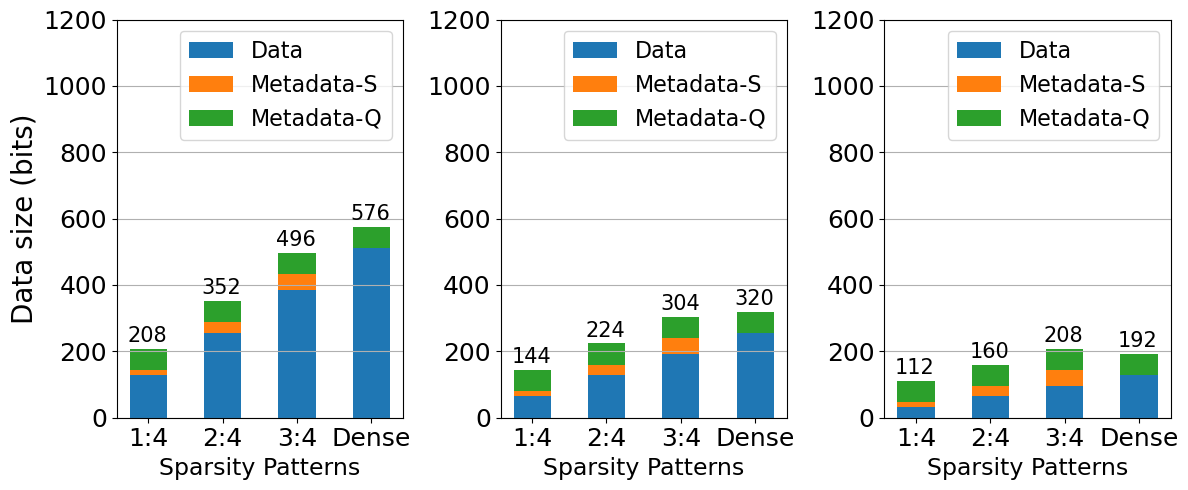

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize =(12, 5))

barWidth = 0.5
fontsize= 20
l=[0, 1, 2, 3]

br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

#data_32 = np.array([32*4, 32*4*2, 32*4*3, 32*4*4])
#meta_s_32 = np.array([2*4 , 2*4*2, 2*4*3, 0])
#meta_q_32 = np.array([32, 32, 32, 32])
#axs[0].bar(br1, data_32, width=barWidth, label = 'Data')
#axs[0].bar(br1, meta_s_32, bottom=data_32,  width=barWidth, label = 'Metadata-S')
#axs[0].bar(br1, meta_q_32, bottom=data_32 + meta_s_32,  width=barWidth, label = 'Metadata-Q')
#axs[0].legend()

data_16 = 2*np.array([16*4, 16*4*2, 16*4*3, 16*4*4])
meta_s_16 = 2*np.array([2*4 , 2*4*2, 2*4*3, 0])
meta_q_16 = 2*np.array([32, 32, 32, 32])
axs[0].bar(br1, data_16, width=barWidth, label = 'Data')
axs[0].bar(br1, meta_s_16, bottom=data_16, width=barWidth, label = 'Metadata-S')
axs[0].bar(br1, meta_q_16, bottom=data_16 + meta_s_16, width=barWidth, label = 'Metadata-Q')
#axs[1].legend()
for i in range(len(br1)):
    x_delta = 0.2
    data_sum = data_16[i] + meta_s_16[i] + meta_q_16[i]
    if data_sum >= 100:
        x_delta = 0.28
    axs[0].text(br1[i] - x_delta, data_sum+20, str(data_sum), fontsize=fontsize-5)


data_8 = 2*np.array([8*4, 8*4*2, 8*4*3, 8*4*4])
meta_s_8 = 2*np.array( [2*4 , 2*4*2, 2*4*3, 0])
meta_q_8 = 2*np.array([32, 32, 32, 32])
axs[1].bar(br1, data_8, width=barWidth, label = 'Data')
axs[1].bar(br1, meta_s_8, bottom=data_8, width=barWidth, label = 'Metadata-S')
axs[1].bar(br1, meta_q_8, bottom=data_8 + meta_s_8, width=barWidth, label = 'Metadata-Q')
#axs[2].legend()
for i in range(len(br1)):
    x_delta = 0.2
    data_sum = data_8[i] + meta_s_8[i] + meta_q_8[i]
    if data_sum >= 100:
        x_delta = 0.28
    axs[1].text(br1[i] - x_delta, data_sum+20, str(data_sum), fontsize=fontsize-5)


data_4 = 2*np.array([4*4, 4*4*2, 4*4*3, 4*4*4])
meta_s_4 = 2*np.array([2*4 , 2*4*2, 2*4*3, 0])
meta_q_4 = 2*np.array([32, 32, 32, 32])
axs[2].bar(br1, data_4, width=barWidth, label = 'Data')
axs[2].bar(br1, meta_s_4, bottom=data_4, width=barWidth, label = 'Metadata-S')
axs[2].bar(br1, meta_q_4, bottom=data_4+meta_s_4, width=barWidth, label = 'Metadata-Q')
#####
for i in range(len(br1)):
    x_delta = 0.2
    data_sum = data_4[i] + meta_s_4[i] + meta_q_4[i]
    if data_sum >= 100:
        x_delta = 0.28
    axs[2].text(br1[i] - x_delta, data_sum+20, str(data_sum), fontsize=fontsize-5)

axs[0].set_ylabel('Data size (bits)', fontsize = fontsize)

for i in range(3):
    for j in range(1):
        if j == 0:
            axs_title = str(int(16/(2**(i)))) + 'b Weight, 32b SF, 16 BS'
            #axs[i].set_title(axs_title, fontsize = fontsize-1)
        if j == 1:
            axs_title = str(int(16/(2**(i)))) + 'b Weight, 8b SF, 32 BS'
            axs[j][i].set_title(axs_title, fontsize = fontsize-1)
        axs[i].set_xticks(l)

        axs[i].set_xlabel('Sparsity Patterns', fontsize = 17)
        axs[i].set_xticklabels(['1:4', '2:4', '3:4', 'Dense'], fontsize = fontsize-2)
        if j == 0:
            axs[i].set_ylim(0, 1200)
        else:
            axs[i].set_ylim(0, 1200)
        axs[i].legend(fontsize=fontsize-4)

        axs[i].tick_params(axis='y', labelsize=fontsize-2)
        axs[i].grid(axis = 'y')
        
        
#axs[2].legend(loc='center left', ncols=3, bbox_to_anchor=(-2, -0.2), fontsize=17)

plt.tight_layout()
plt.savefig("metadata.pdf", dpi=2000)

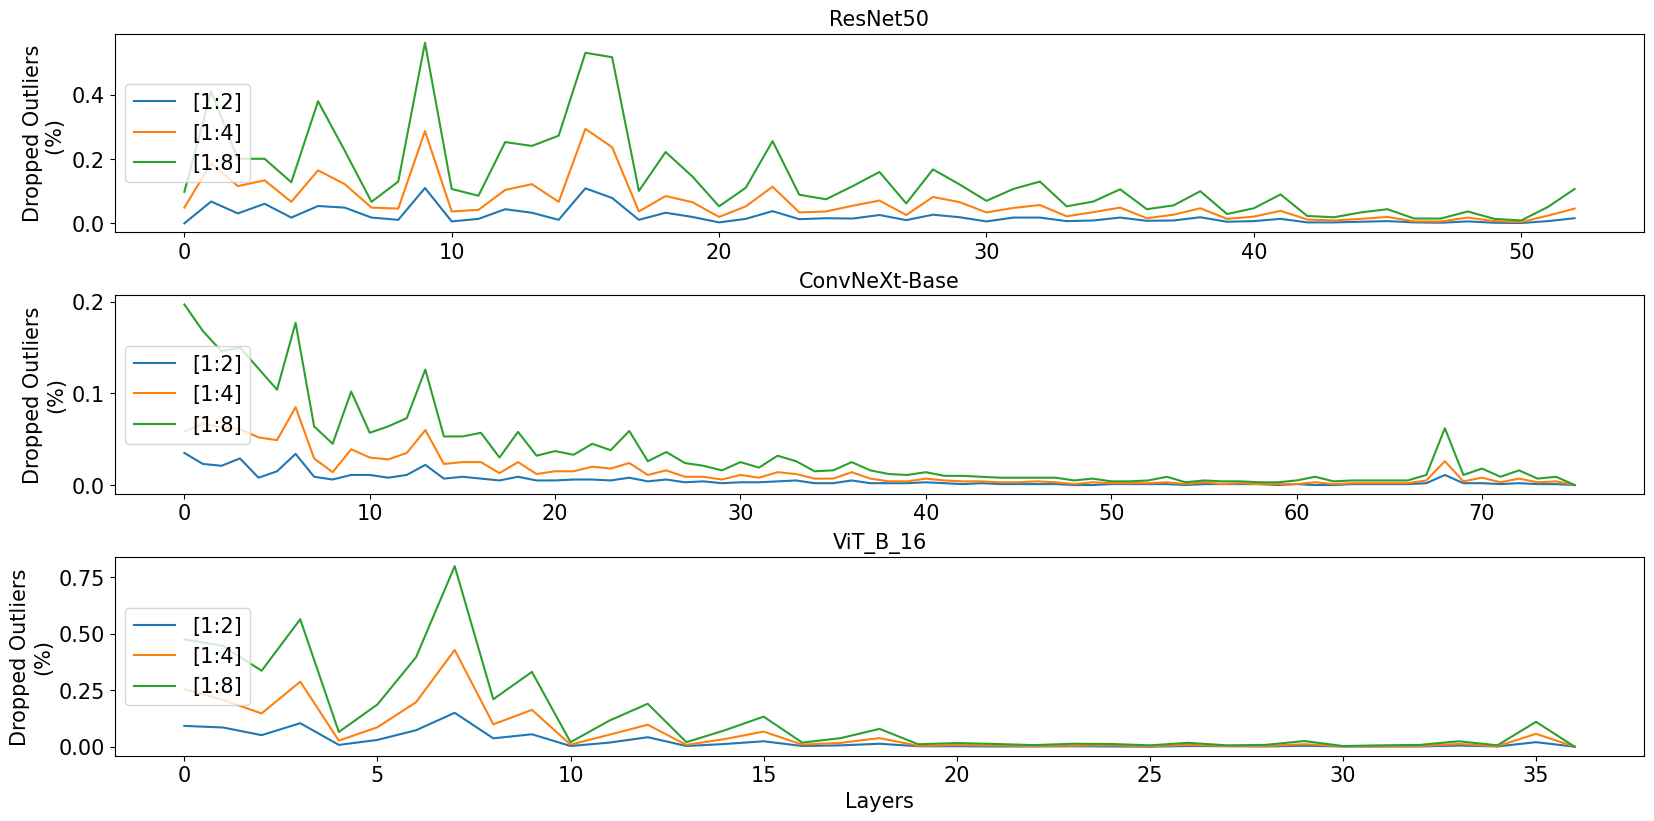

In [30]:

fig, axs = plt.subplots(nrows=3, ncols=1, figsize =(16, 8))

barWidth = 0.3
fontsize = 15
pct_overall = np.array([2.319, 1.742, 1.672, 1.831, 1.642, 1.511, 1.843, 1.239, 1.050, 2.222, 1.529, 1.147, 1.784, 1.761, 2.066, 1.847, 2.203, 1.585, 1.510, 1.477, 1.173, 1.026, 1.642, 1.408, 1.213, 1.324, 1.431, 1.261, 1.269, 1.188, 1.302, 1.050, 1.211, 1.122, 0.893, 1.105, 1.000, 0.888, 1.152, 0.919, 0.854, 1.044, 0.802, 0.609, 0.839, 0.813, 0.719, 0.483, 0.796, 0.635, 0.475, 1.035, 1.780,])
pct = np.array([0.000, 0.068, 0.031, 0.061, 0.018, 0.054, 0.049, 0.018, 0.011, 0.110, 0.006, 0.014, 0.044, 0.033, 0.011, 0.109, 0.079, 0.011, 0.033, 0.020, 0.003, 0.014, 0.038, 0.013, 0.016, 0.015, 0.026, 0.010, 0.027, 0.019, 0.006, 0.018, 0.018, 0.007, 0.009, 0.018, 0.008, 0.009, 0.019, 0.005, 0.007, 0.014, 0.003, 0.003, 0.005, 0.007, 0.003, 0.002, 0.006, 0.002, 0.001, 0.007, 0.016])
pct4 = np.array([0.049, 0.187, 0.116, 0.134, 0.067, 0.165, 0.122, 0.049, 0.046, 0.287, 0.037, 0.042, 0.104, 0.122, 0.067, 0.294, 0.237, 0.037, 0.085, 0.066, 0.020, 0.053, 0.114, 0.034, 0.037, 0.055, 0.071, 0.026, 0.082, 0.066, 0.034, 0.048, 0.057, 0.022, 0.035, 0.049, 0.016, 0.027, 0.047, 0.014, 0.021, 0.039, 0.012, 0.009, 0.014, 0.020, 0.006, 0.006, 0.018, 0.007, 0.004, 0.024, 0.046,])
pct8 = np.array([0.098, 0.410, 0.201, 0.201, 0.128, 0.380, 0.226, 0.067, 0.130, 0.562, 0.107, 0.086, 0.253, 0.241, 0.273, 0.531, 0.517, 0.101, 0.222, 0.146, 0.053, 0.111, 0.256, 0.089, 0.075, 0.116, 0.160, 0.062, 0.168, 0.121, 0.070, 0.107, 0.130, 0.053, 0.068, 0.106, 0.044, 0.056, 0.100, 0.029, 0.047, 0.090, 0.023, 0.019, 0.034, 0.044, 0.015, 0.015, 0.037, 0.014, 0.009, 0.051, 0.107,])
br1 = np.arange(len(pct))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[0].set_title("ResNet50", fontsize = fontsize)
axs[1].set_title("ConvNeXt-Base", fontsize = fontsize)
axs[2].set_title("ViT_B_16", fontsize = fontsize)

axs[0].plot(pct, label = "[1:2]")
axs[0].plot(pct4, label = "[1:4]")
axs[0].plot(pct8, label = "[1:8]")
#axs[0].plot(pct_overall, label="Overall outliers")
pct = np.array([0.035, 0.023, 0.021, 0.029, 0.008, 0.015, 0.034, 0.009, 0.006, 0.011, 0.011, 0.008, 0.011, 0.022, 0.007, 0.009, 0.007, 0.005, 0.009, 0.005, 0.005, 0.006, 0.006, 0.005, 0.008, 0.004, 0.006, 0.003, 0.004, 0.002, 0.003, 0.003, 0.004, 0.005, 0.002, 0.002, 0.005, 0.002, 0.002, 0.002, 0.003, 0.002, 0.001, 0.002, 0.001, 0.001, 0.001, 0.001, 0.000, 0.000, 0.001, 0.001, 0.001, 0.001, 0.000, 0.001, 0.001, 0.001, 0.001, 0.000, 0.001, 0.000, 0.000, 0.001, 0.001, 0.001, 0.001, 0.002, 0.011, 0.002, 0.002, 0.001, 0.002, 0.001, 0.001, 0.000,])
pct4 = np.array([0.058, 0.067, 0.063, 0.061, 0.052, 0.049, 0.085, 0.029, 0.014, 0.039, 0.030, 0.028, 0.035, 0.060, 0.023, 0.025, 0.025, 0.013, 0.025, 0.012, 0.015, 0.015, 0.020, 0.018, 0.024, 0.011, 0.016, 0.009, 0.009, 0.006, 0.011, 0.008, 0.014, 0.012, 0.007, 0.007, 0.014, 0.007, 0.004, 0.004, 0.007, 0.005, 0.004, 0.004, 0.003, 0.003, 0.004, 0.003, 0.001, 0.003, 0.002, 0.002, 0.002, 0.003, 0.001, 0.003, 0.001, 0.002, 0.001, 0.001, 0.001, 0.003, 0.001, 0.002, 0.002, 0.002, 0.002, 0.005, 0.026, 0.004, 0.008, 0.003, 0.007, 0.003, 0.004, 0.000, ])
pct8 = np.array([0.197, 0.168, 0.146, 0.150, 0.127, 0.104, 0.177, 0.064, 0.045, 0.102, 0.057, 0.064, 0.073, 0.126, 0.053, 0.053, 0.057, 0.030, 0.058, 0.032, 0.037, 0.033, 0.045, 0.038, 0.059, 0.026, 0.036, 0.024, 0.021, 0.016, 0.025, 0.019, 0.032, 0.026, 0.015, 0.016, 0.025, 0.016, 0.012, 0.011, 0.014, 0.010, 0.010, 0.009, 0.008, 0.008, 0.008, 0.008, 0.005, 0.007, 0.004, 0.004, 0.005, 0.009, 0.003, 0.005, 0.004, 0.004, 0.003, 0.003, 0.005, 0.009, 0.004, 0.005, 0.005, 0.005, 0.005, 0.011, 0.062, 0.011, 0.018, 0.009, 0.016, 0.007, 0.009, 0.000])

#axs[0][1].set_title("Density of operand 2")

axs[1].plot(pct, label = "[1:2]")
axs[1].plot(pct4, label = "[1:4]")
axs[1].plot(pct8, label = "[1:8]")
#axs[0].plot(pct_overall, label="Overall outliers")

pct = np.array([0.092, 0.085, 0.051, 0.104, 0.008, 0.030, 0.073, 0.150, 0.037, 0.055, 0.003, 0.018, 0.042, 0.003, 0.012, 0.024, 0.003, 0.006, 0.013, 0.002, 0.002, 0.001, 0.001, 0.002, 0.001, 0.000, 0.003, 0.002, 0.001, 0.004, 0.001, 0.001, 0.001, 0.005, 0.001, 0.020, 0.000])
pct4 = np.array([0.254, 0.207, 0.147, 0.288, 0.027, 0.086, 0.197, 0.428, 0.099, 0.163, 0.009, 0.053, 0.097, 0.008, 0.034, 0.067, 0.009, 0.017, 0.038, 0.004, 0.007, 0.005, 0.003, 0.005, 0.006, 0.002, 0.008, 0.003, 0.003, 0.011, 0.002, 0.002, 0.003, 0.012, 0.002, 0.057, 0.000])
pct8 = np.array([0.475, 0.446, 0.336, 0.564, 0.065, 0.187, 0.396, 0.799, 0.210, 0.331, 0.020, 0.115, 0.190, 0.020, 0.073, 0.133, 0.018, 0.038, 0.079, 0.011, 0.016, 0.012, 0.007, 0.013, 0.012, 0.006, 0.017, 0.006, 0.008, 0.025, 0.003, 0.006, 0.008, 0.024, 0.006, 0.110, 0.000, ])
#axs[0][1].set_title("Density of operand 2")

axs[2].plot(pct, label = "[1:2]")
axs[2].plot(pct4, label = "[1:4]")
axs[2].plot(pct8, label = "[1:8]")

'''
barWidth = 0.3
br1 = np.arange(len(w_d_4bit['pvaw']['QKVP']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

axs[0][1].bar(br1, w_d_4bit['pvaw']['QKVP'], width = barWidth, label = "w_d_4bit")
axs[0][1].bar(br2, i_d_4bit['pvaw']['QKVP'], width = barWidth, label = "i_d_4bit")

barWidth = 0.3
br1 = np.arange(len(w_d_4bit['pvaw']['BMM1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1][1].bar(br1, w_d_4bit['pvaw']['BMM1'], width = barWidth, label = "w_d_4bit")
axs[1][1].bar(br2, i_d_4bit['pvaw']['BMM1'], width = barWidth, label = "i_d_4bit")

axs[2][1].bar(br1, w_d_4bit['pvaw']['BMM2'], width = barWidth, label = "w_d_4bit")
axs[2][1].bar(br2, i_d_4bit['pvaw']['BMM2'], width = barWidth, label = "i_d_4bit")

axs[3][1].bar(br1, w_d_4bit['pvaw']['FC1'], width = barWidth, label = "w_d_4bit")
axs[3][1].bar(br2, i_d_4bit['pvaw']['FC1'], width = barWidth, label = "i_d_4bit")

axs[4][1].bar(br1, w_d_4bit['pvaw']['FC2'], width = barWidth, label = "w_d_4bit")
axs[4][1].bar(br2, i_d_4bit['pvaw']['FC2'], width = barWidth, label = "i_d_4bit")
'''

#for i in range(5):
#    for j in range(2):
#        axs[i][j].set_ylim(0, 1.1)
fig.tight_layout()
#axs[0].set_title('8bit-poc')
#axs[0].set_title('4bit-pvaw')

axs[0].yaxis.set_label_position('left')
axs[0].set_ylabel('Dropped Outliers\n(%) ', fontsize = fontsize)
axs[1].yaxis.set_label_position('left')
axs[1].set_ylabel('Dropped Outliers\n(%)', fontsize = fontsize)
axs[2].yaxis.set_label_position('left')
axs[2].set_ylabel('Dropped Outliers\n(%)', fontsize = fontsize)

axs[2].set_xlabel('Layers', fontsize = fontsize)
for i in range(3):
    for j in range(2):
        axs[i].tick_params(axis='x', labelsize=fontsize)
        axs[i].tick_params(axis='y', labelsize=fontsize)
        axs[i].legend(loc='center left', fontsize = fontsize)
#axs[1].legend(loc='center left', fontsize = fontsize)
#axs[2].legend(loc='center left', fontsize = fontsize)
#axs[3].legend(loc='center left', fontsize = fontsize)
#axs[4].legend(loc='center left', fontsize = fontsize)
#axs[4][1].legend()
plt.savefig("quant_density.pdf")


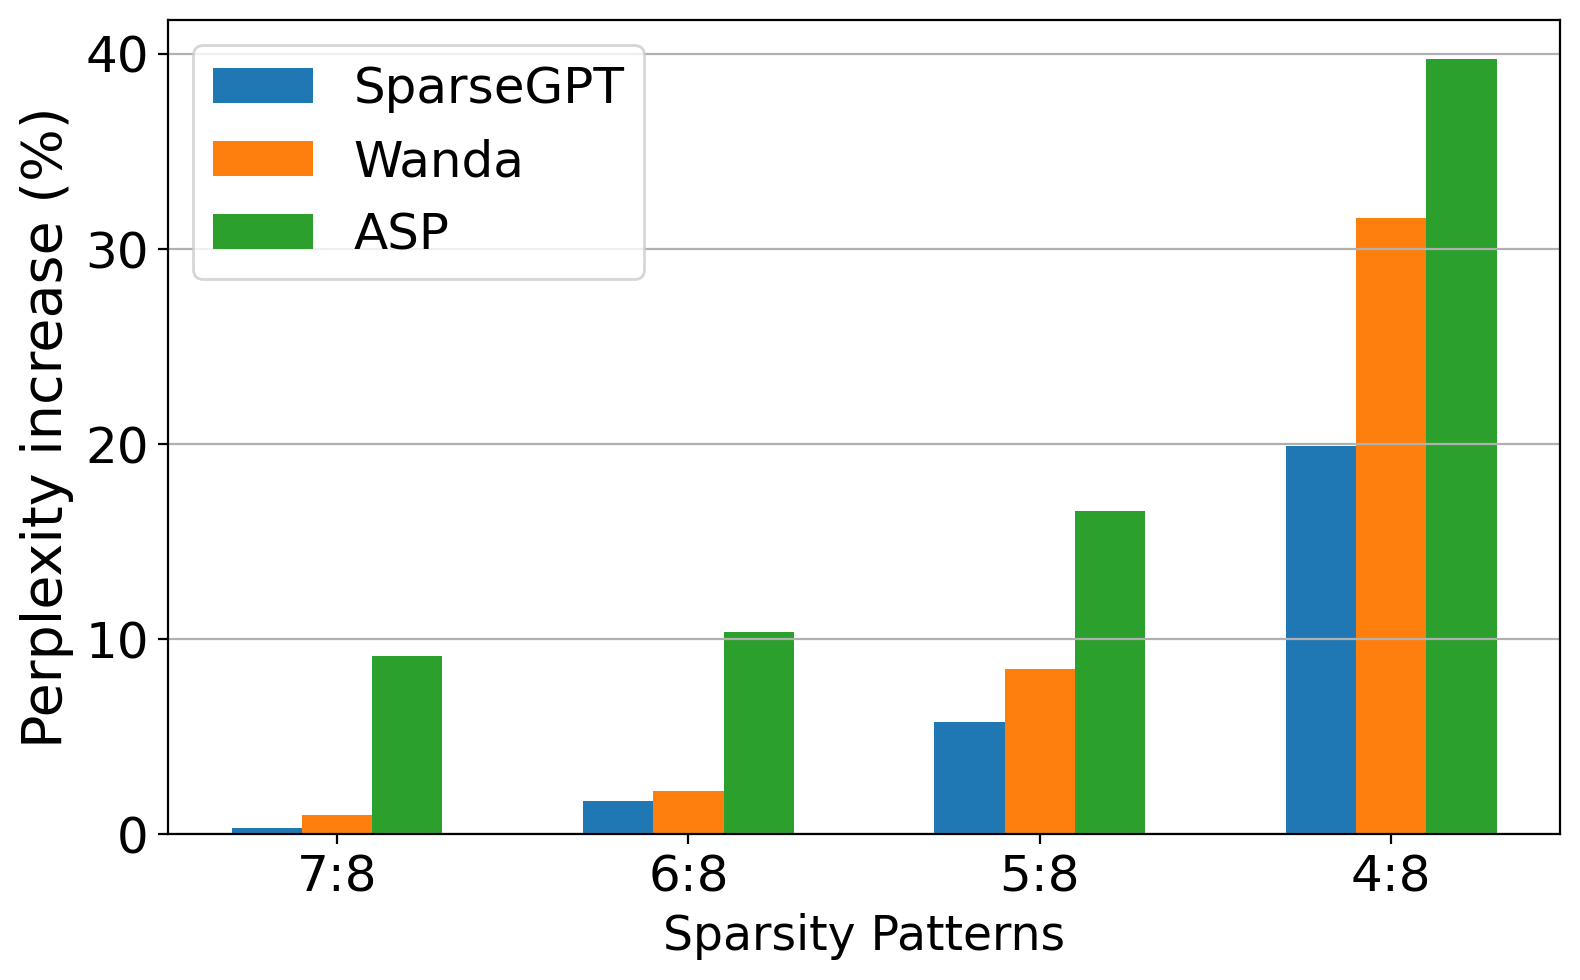

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize =(8, 5), dpi=200)

barWidth = 0.2
fontsize= 20
l=[0, 1, 2, 3]

br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

#data_32 = np.array([32*4, 32*4*2, 32*4*3, 32*4*4])
#meta_s_32 = np.array([2*4 , 2*4*2, 2*4*3, 0])
#meta_q_32 = np.array([32, 32, 32, 32])
#axs[0].bar(br1, data_32, width=barWidth, label = 'Data')
#axs[0].bar(br1, meta_s_32, bottom=data_32,  width=barWidth, label = 'Metadata-S')
#axs[0].bar(br1, meta_q_32, bottom=data_32 + meta_s_32,  width=barWidth, label = 'Metadata-Q')
#axs[0].legend()

data_16 = 100 * (np.array([25.4202, 25.8, 27.1783, 31.4253])-25.4202)/25.4202
meta_s_16 = 100 * (np.array([25.4202, 25.8582, 27.1783, 34.2111])-25.4202)/25.4202
meta_q_16 = 100 * (np.array([25.4202, 29.2689, 45.2374, 123.2653])-25.4202)/25.4202

data_16 = 100 * (np.array([12.3261, 12.4992, 12.9957, 14.7297])-12.2869)/12.2869
meta_s_16 = 100 * (np.array([12.4078, 12.5629, 13.3262, 16.1707])-12.2869)/12.2869
meta_q_16 = 100 * (np.array([12.4078+1, 12.5629+1, 13.3262+1, 16.1707+1])-12.2869)/12.2869

axs.bar(br1, data_16, width=barWidth, label = 'SparseGPT')
axs.bar(br2, meta_s_16, width=barWidth, label = 'Wanda')
axs.bar(br3, meta_q_16, width=barWidth, label = 'ASP')
#axs[1].legend()
for i in range(len(br1)):
    x_delta = 0.2
    data_sum = data_16[i] + meta_s_16[i] + meta_q_16[i]
    if data_sum >= 100:
        x_delta = 0.28
    #axs.text(br1[i] - x_delta, data_sum, str(data_sum), fontsize=fontsize-5)


axs.set_ylabel('Perplexity increase (%)', fontsize = fontsize)

for i in range(1):
    for j in range(1):
        if j == 0:
            axs_title = str(int(16/(2**(i)))) + 'b Weight, 32b SF, 16 BS'
            #axs[i].set_title(axs_title, fontsize = fontsize-1)
        if j == 1:
            axs_title = str(int(16/(2**(i)))) + 'b Weight, 8b SF, 32 BS'
            axs.set_title(axs_title, fontsize = fontsize-1)
        axs.set_xticks(br2)

        axs.set_xlabel('Sparsity Patterns', fontsize = 17)
        axs.set_xticklabels(['7:8', '6:8', '5:8', '4:8'], fontsize = fontsize-2)
        #if j == 0:
        #   axs.set_ylim(0, 100)
        #else:
        #    axs.set_ylim(0, 100)
        axs.legend(fontsize=fontsize-2)

        axs.tick_params(axis='y', labelsize=fontsize-2)
        axs.grid(axis = 'y')
        #axs.set_yscale('log')
        
        
#axs[2].legend(loc='center left', ncols=3, bbox_to_anchor=(-2, -0.2), fontsize=17)

plt.tight_layout()
plt.savefig("metadata.pdf", dpi=2000)

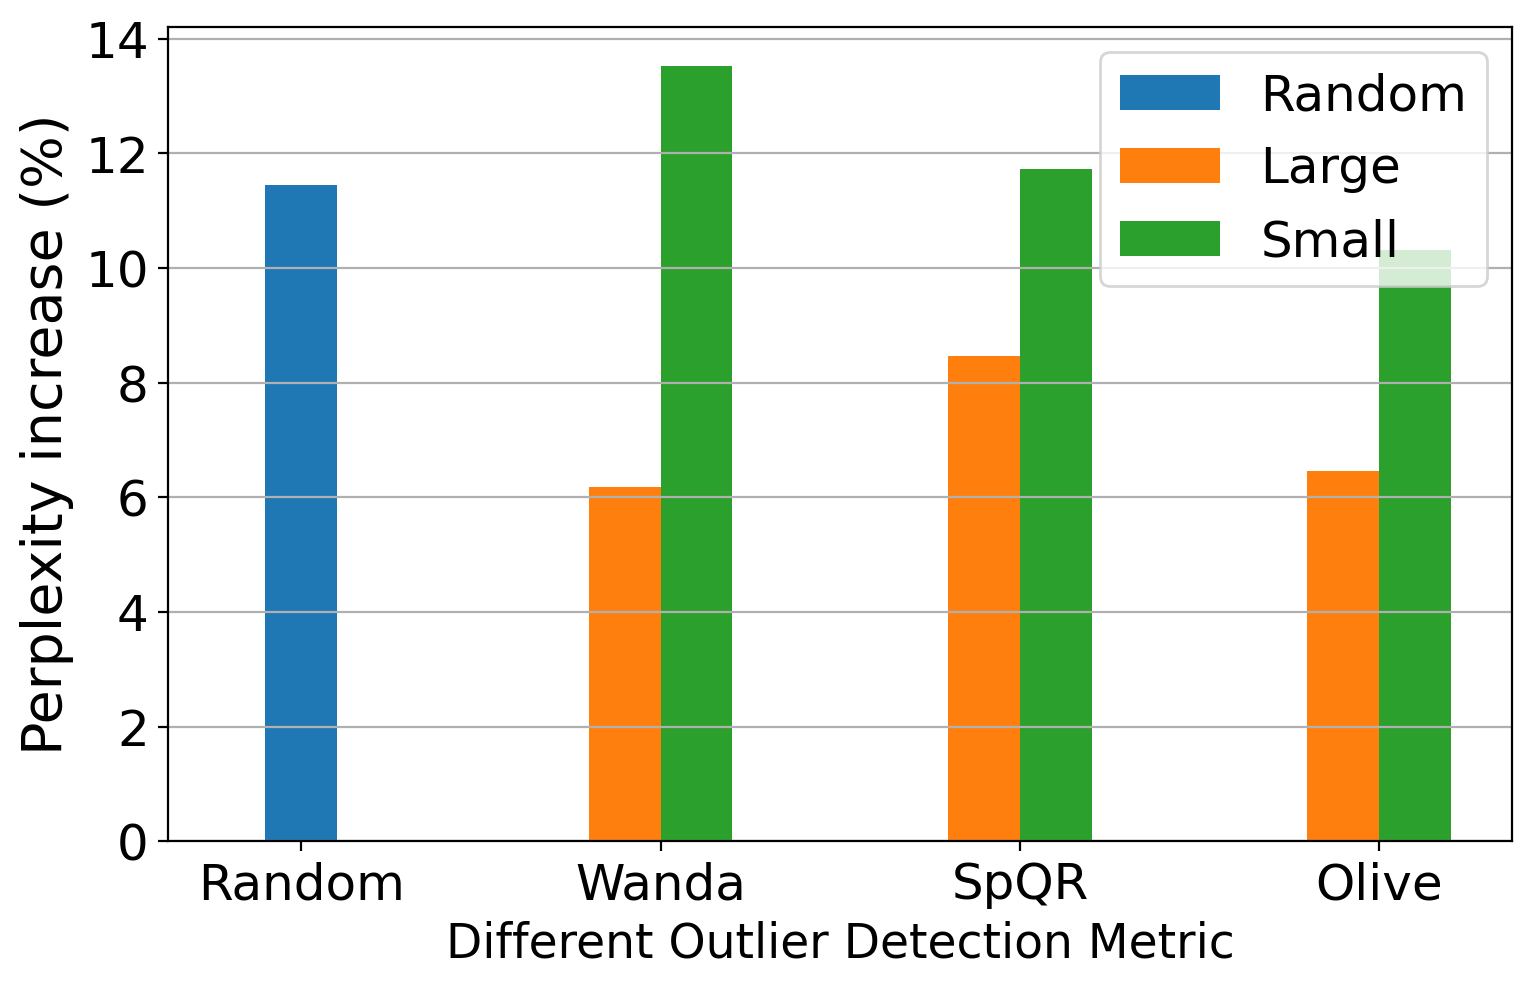

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize =(8, 5), dpi=200)

barWidth = 0.2
fontsize= 20
l=[0, 1, 2, 3]

br1 = np.arange(4)
text_x = [x + barWidth/2 for x in br1]
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

#data_32 = np.array([32*4, 32*4*2, 32*4*3, 32*4*4])
#meta_s_32 = np.array([2*4 , 2*4*2, 2*4*3, 0])
#meta_q_32 = np.array([32, 32, 32, 32])
#axs[0].bar(br1, data_32, width=barWidth, label = 'Data')
#axs[0].bar(br1, meta_s_32, bottom=data_32,  width=barWidth, label = 'Metadata-S')
#axs[0].bar(br1, meta_q_32, bottom=data_32 + meta_s_32,  width=barWidth, label = 'Metadata-Q')
#axs[0].legend()

data_16 = 100 * (np.array([25.4202, 25.8, 27.1783, 31.4253])-25.4202)/25.4202
meta_s_16 = 100 * (np.array([25.4202, 25.8582, 27.1783, 34.2111])-25.4202)/25.4202
meta_q_16 = 100 * (np.array([25.4202, 29.2689, 45.2374, 123.2653])-25.4202)/25.4202

random = 100 * (np.array([28.3314, 26.9912, 27.5703, 27.0626])-25.4202)/25.4202
axs.bar([text_x[0]], random, width=barWidth, label = 'Random')

data_16 = 100 * (np.array([25.4202, 26.9912, 27.5703, 27.0626])-25.4202)/25.4202
meta_s_16 = 100 * (np.array([25.4202, 28.8591, 28.4001, 28.0433])-25.4202)/25.4202
meta_q_16 = 100 * (np.array([12.4078+1, 12.5629+1, 13.3262+1, 16.1707+1])-25.4202)/25.4202

axs.bar(br1, data_16, width=barWidth, label = 'Large')
axs.bar(br2, meta_s_16, width=barWidth, label = 'Small')
#axs.bar(br3, meta_q_16, width=barWidth, label = 'ASP')
#axs[1].legend()
for i in range(len(br1)):
    x_delta = 0.2
    data_sum = data_16[i] + meta_s_16[i] + meta_q_16[i]
    if data_sum >= 100:
        x_delta = 0.28
    #axs.text(br1[i] - x_delta, data_sum, str(data_sum), fontsize=fontsize-5)


axs.set_ylabel('Perplexity increase (%)', fontsize = fontsize)

for i in range(1):
    for j in range(1):
        if j == 0:
            axs_title = str(int(16/(2**(i)))) + 'b Weight, 32b SF, 16 BS'
            #axs[i].set_title(axs_title, fontsize = fontsize-1)
        if j == 1:
            axs_title = str(int(16/(2**(i)))) + 'b Weight, 8b SF, 32 BS'
            axs.set_title(axs_title, fontsize = fontsize-1)
        axs.set_xticks(text_x)

        axs.set_xlabel('Different Outlier Detection Metric', fontsize = 17)
        axs.set_xticklabels(['Random', 'Wanda', 'SpQR', 'Olive'], fontsize = fontsize-2)
        #if j == 0:
        #   axs.set_ylim(0, 100)
        #else:
        #    axs.set_ylim(0, 100)
        axs.legend(fontsize=fontsize-2)

        axs.tick_params(axis='y', labelsize=fontsize-2)
        axs.grid(axis = 'y')
        #axs.set_yscale('log')
        
        
#axs[2].legend(loc='center left', ncols=3, bbox_to_anchor=(-2, -0.2), fontsize=17)

plt.tight_layout()
plt.savefig("metadata.pdf", dpi=2000)

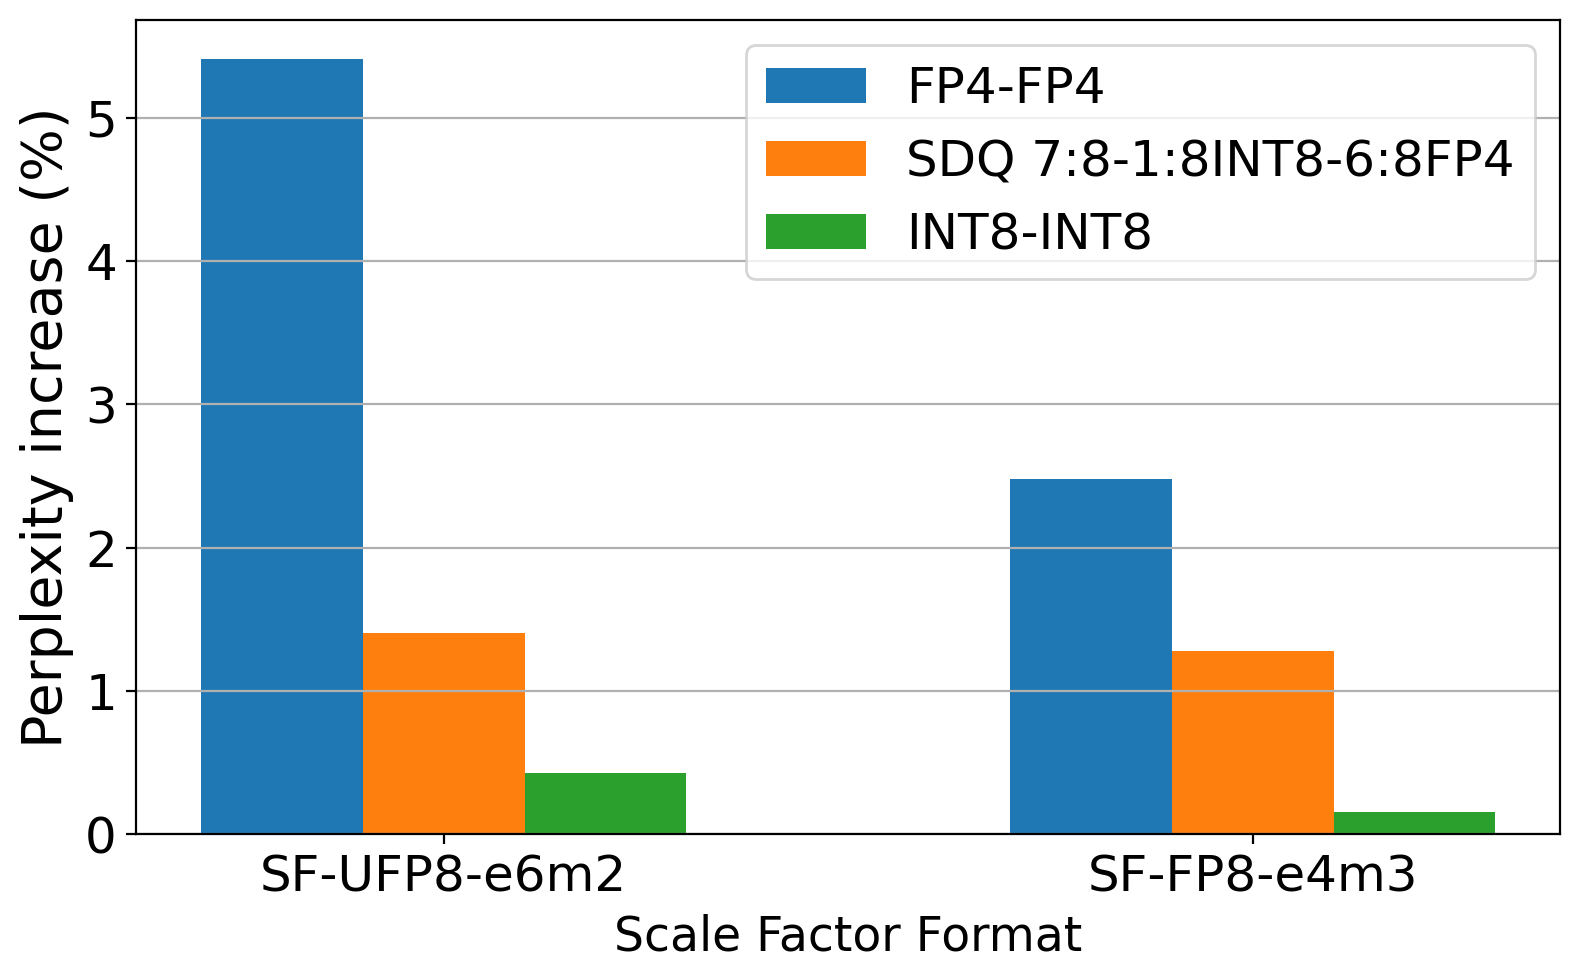

In [14]:

fig, axs = plt.subplots(nrows=1, ncols=1, figsize =(8, 5), dpi=200)

barWidth = 0.2
fontsize= 20
l=[0, 1, 2, 3]

br1 = np.arange(2)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

#data_32 = np.array([32*4, 32*4*2, 32*4*3, 32*4*4])
#meta_s_32 = np.array([2*4 , 2*4*2, 2*4*3, 0])
#meta_q_32 = np.array([32, 32, 32, 32])
#axs[0].bar(br1, data_32, width=barWidth, label = 'Data')
#axs[0].bar(br1, meta_s_32, bottom=data_32,  width=barWidth, label = 'Metadata-S')
#axs[0].bar(br1, meta_q_32, bottom=data_32 + meta_s_32,  width=barWidth, label = 'Metadata-Q')
#axs[0].legend()

data_16 = 100 * (np.array([11.2476, 10.9351, ])-10.6703)/10.6703
meta_s_16 = 100 * (np.array([10.8202, 10.8066, ])-10.6703)/10.6703
meta_q_16 = 100 * (np.array([10.7162, 10.6870, ])-10.6703)/10.6703

axs.bar(br1, data_16, width=barWidth, label = 'FP4-FP4')
axs.bar(br2, meta_s_16, width=barWidth, label = 'SDQ 7:8-1:8INT8-6:8FP4')
axs.bar(br3, meta_q_16, width=barWidth, label = 'INT8-INT8')
#axs[1].legend()
for i in range(len(br1)):
    x_delta = 0.2
    data_sum = data_16[i] + meta_s_16[i] + meta_q_16[i]
    if data_sum >= 100:
        x_delta = 0.28
    #axs.text(br1[i] - x_delta, data_sum, str(data_sum), fontsize=fontsize-5)


axs.set_ylabel('Perplexity increase (%)', fontsize = fontsize)

for i in range(1):
    for j in range(1):
        if j == 0:
            axs_title = str(int(16/(2**(i)))) + 'b Weight, 32b SF, 16 BS'
            #axs[i].set_title(axs_title, fontsize = fontsize-1)
        if j == 1:
            axs_title = str(int(16/(2**(i)))) + 'b Weight, 8b SF, 32 BS'
            axs.set_title(axs_title, fontsize = fontsize-1)
        axs.set_xticks(br2)

        axs.set_xlabel('Scale Factor Format', fontsize = 17)
        axs.set_xticklabels(['SF-UFP8-e6m2', 'SF-FP8-e4m3'], fontsize = fontsize-2)
        #if j == 0:
        #   axs.set_ylim(0, 100)
        #else:
        #    axs.set_ylim(0, 100)
        axs.legend(fontsize=fontsize-2)

        axs.tick_params(axis='y', labelsize=fontsize-2)
        axs.grid(axis = 'y')
        #axs.set_yscale('log')
        
        
#axs[2].legend(loc='center left', ncols=3, bbox_to_anchor=(-2, -0.2), fontsize=17)

plt.tight_layout()
plt.savefig("metadata.pdf", dpi=2000)

/tmp/ipykernel_480/1632185457.py:25: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[0].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')
/tmp/ipykernel_480/1632185457.py:28: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[1].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')


(0.2, 1.05)

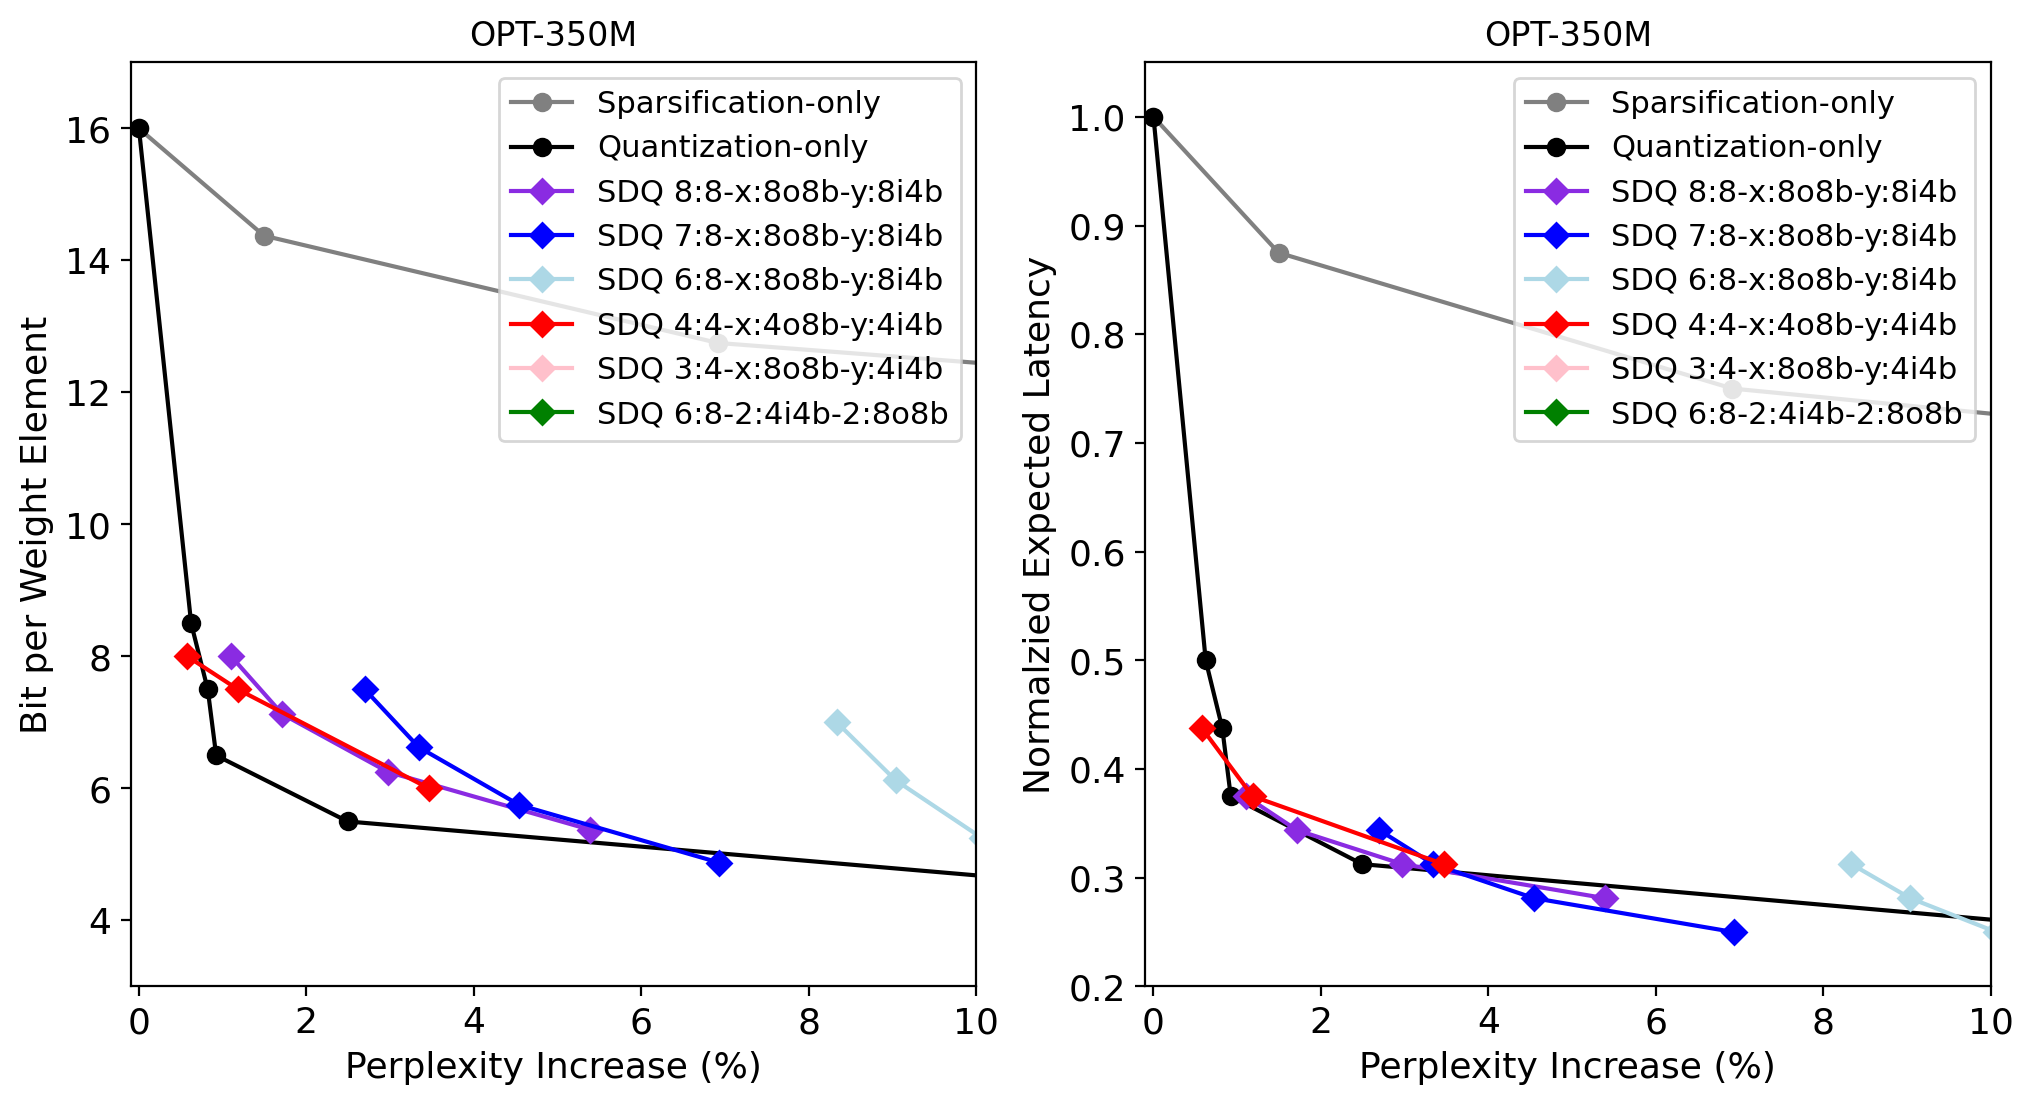

In [65]:
#### WITH SF FP E3M4
fig, axs = plt.subplots(nrows=1, ncols=2, figsize =(12, 6), dpi=200)
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
#y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
#axs.scatter(x, y, color = 'hotpink')

dense_p = 25.4202

# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([25.4202, 25.8, 27.1783, 31.4253, 45.1572])
x = (x - dense_p)/dense_p * 100
y = np.array([16, ((16*7) + (3))/8, ((16*6) + (6))/8, ((16*5) + (9))/8, ((16*4) + (12))/8])
axs[0].plot(x, y, color = 'grey', label="Sparsification-only", marker='o', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1, 7/8, 6/8, 5/8, 4/8])
axs[1].plot(x, y, color = 'grey', label="Sparsification-only", marker='o', linestyle='-')



x = np.array([28.3909, 26.054, 25.6548, 25.6292, 25.5788, 25.4202])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 7.5, 8.5, 16])
axs[0].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')
y = np.array([1/4, 5/16, 6/16, 7/16, 1/2, 1])
#y = np.array([1/4, 1/2, 1/2, 1/2, 1])
axs[1].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')


##### SDQ
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([26.7902, 26.1764, 25.856, 25.7005])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 28) + (3 + 8/2))/8, ((16 + 24) + (6 + 8/2))/8, ((24 + 20) + (9 + 8/2))/8, ((32 + 16) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'blueviolet', label="SDQ 8:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 7/8 + 1/8 * 1/2, 1/4 * 6/8 + 2/8 * 1/2, 1/4 * 5/8 + 3/8 * 1/2, 1/4 * 4/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'blueviolet', label="SDQ 8:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 7:8
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([27.1829, 26.5752, 26.2699, 26.1062])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 24) + (3 + 8/2))/8, ((16 + 20) + (6 + 8/2))/8, ((24 + 16) + (9 + 8/2))/8, ((32 + 12) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'blue', label="SDQ 7:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 6/8 + 1/8 * 1/2, 1/4 * 5/8 + 2/8 * 1/2, 1/4 * 4/8 + 3/8 * 1/2, 1/4 * 3/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'blue', label="SDQ 7:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 6:8
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([28.6577, 27.9798, 27.7178, 27.5398])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 20) + (3 + 8/2))/8, ((16 + 16) + (6 + 8/2))/8, ((24 + 12) + (9 + 8/2))/8, ((32 + 8) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'lightblue', label="SDQ 6:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 5/8 + 1/8 * 1/2, 1/4 * 4/8 + 2/8 * 1/2, 1/4 * 3/8 + 3/8 * 1/2, 1/4 * 2/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'lightblue', label="SDQ 6:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 4:4
# 1:4/3:4 2:4/2:4 3:4/1:4
# ((8 + 28) + (3 + 8/2))/8
x = np.array([26.3014, 25.721, 25.5675])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 24) + (4 + 8/2))/8, ((32 + 16) + (8 + 8/2))/8, ((48 + 8) + (4 + 8/2))/8])
axs[0].plot(x, y, color = 'red', label="SDQ 4:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([3/4 * 1/4 + 1/4 * 1/2, 2/4 * 1/4 + 2/4 * 1/2, 1/4 * 1/4 + 3/4 * 1/2])
axs[1].plot(x, y, color = 'red', label="SDQ 4:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

### SDQ 3:4
# 1:4/2:4 2:4/1:4
# ((8 + 28) + (3 + 8/2))/8
x = np.array([29.6885, 28.9626])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 16) + (8 + 8/2))/8, ((32 + 8) + (8 + 8/2))/8])
axs[0].plot(x, y, color = 'pink', label="SDQ 3:4-x:8o8b-y:4i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([2/4 * 1/4 + 1/4 * 1/2, 1/4 * 1/4 + 2/4 * 1/2])
axs[1].plot(x, y, color = 'pink', label="SDQ 3:4-x:8o8b-y:4i4b", marker='D', linestyle='-')

### # 2:4i fp4/ 2:8o int8
x = np.array([28.2222])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 16) + (4+6 + 8/2))/8])
axs[0].plot(x, y, color = 'green', label="SDQ 6:8-2:4i4b-2:8o8b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([2/4 * 1/4 + 2/8 * 1/2])
axs[1].plot(x, y, color = 'green', label="SDQ 6:8-2:4i4b-2:8o8b", marker='D', linestyle='-')
'''
'''
#### End of SDQ
'''

x = np.array([16.7279, 13.0949, 13.0172, 14.6427])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2])
axs[1].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

#12.4769
x = np.array([12.4769])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+4*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8])
axs[1].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

#12.3459
x = np.array([12.3459])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+8*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)

y = np.array([1/2 + 1/8 * 1])
axs[1].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)
'''
'''
x = np.array([27.2057, 25.8580, 25.7670, 25.4371])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")
y = np.array([1, 1, 1, 1])
axs[1].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")



x = np.array([28.7235, 27.7122, 27.5709, 27.9776])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

x = np.array([29.8278, 28.9205, 28.5968, 28.9288])
x = (x - dense_p)/dense_p * 100
y = np.arraya([6, 6, 6, 6])
axs[0].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)
'''
fontsize = 13
axs[0].legend(fontsize = fontsize-2)
axs[0].set_title("OPT-350M")
axs[0].set_ylabel("Bit per Weight Element", fontsize = fontsize)
axs[0].set_xlabel("Perplexity Increase (%)", fontsize = fontsize) # Expected latency
axs[0].set_xlim(-0.1, 10)
axs[0].tick_params (axis='both', which='major', labelsize=fontsize)
axs[0].set_ylim(3, 17)

axs[1].legend(fontsize = fontsize-2)
axs[1].set_title("OPT-350M")
axs[1].set_ylabel("Normalzied Expected Latency", fontsize = fontsize)
axs[1].set_xlabel("Perplexity Increase (%)", fontsize = fontsize) # Expected latency
axs[1].set_xlim(-0.1, 10)
axs[1].tick_params (axis='both', which='major', labelsize=fontsize)
axs[1].set_ylim(0.2, 1.05)

#axs.show()

/tmp/ipykernel_480/1010420525.py:25: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[0].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')
/tmp/ipykernel_480/1010420525.py:28: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[1].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')


(0.2, 1.05)

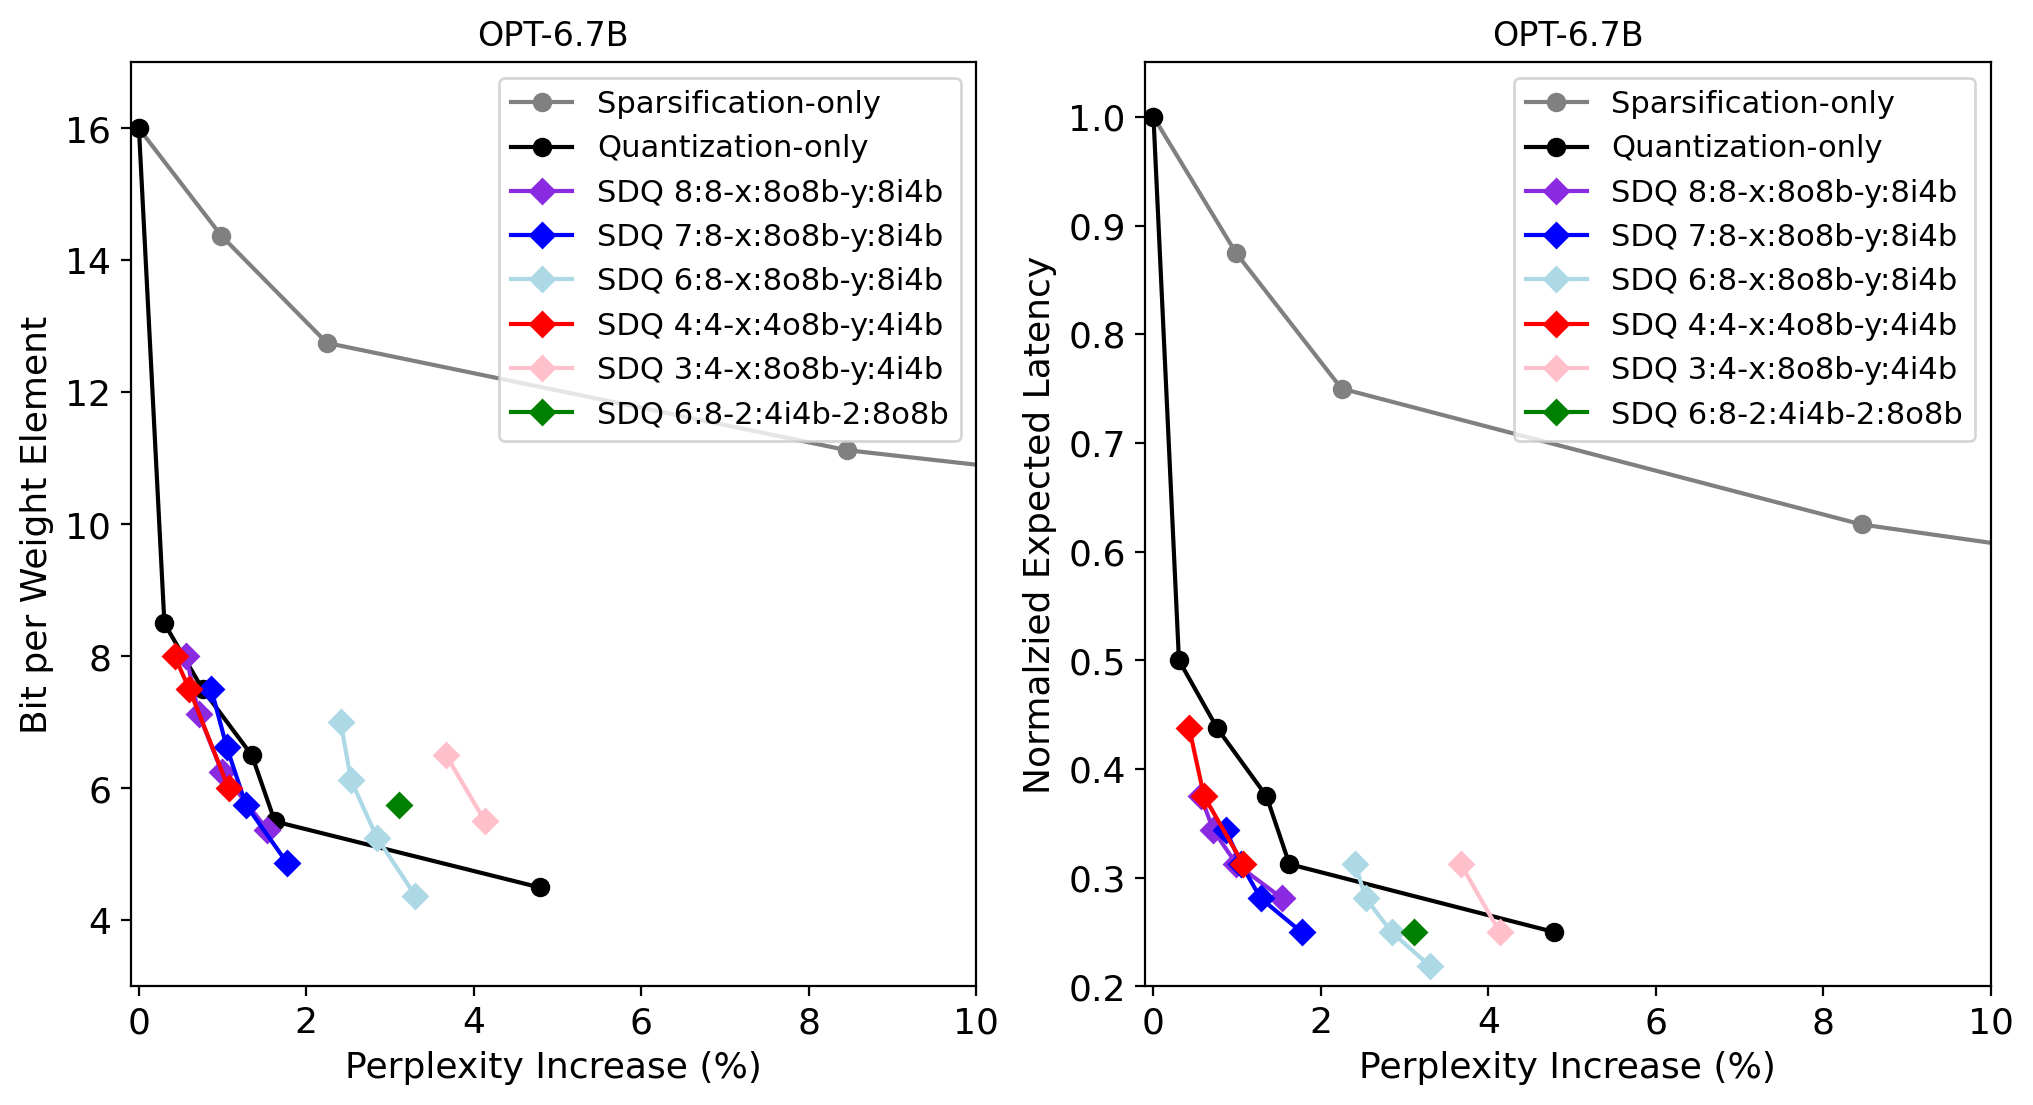

In [63]:
#### WITH SF FP E3M4
fig, axs = plt.subplots(nrows=1, ncols=2, figsize =(12, 6), dpi=200)
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
#y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
#axs.scatter(x, y, color = 'hotpink')

dense_p = 12.2869

# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([12.2869, 12.4078, 12.5629, 13.3262, 14.7279])
x = (x - dense_p)/dense_p * 100
y = np.array([16, ((16*7) + (3))/8, ((16*6) + (6))/8, ((16*5) + (9))/8, ((16*4) + (12))/8])
axs[0].plot(x, y, color = 'grey', label="Sparsification-only", marker='o', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1, 7/8, 6/8, 5/8, 4/8])
axs[1].plot(x, y, color = 'grey', label="Sparsification-only", marker='o', linestyle='-')



x = np.array([12.8752, 12.4864, 12.4528, 12.3805, 12.3243, 12.2869])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 7.5, 8.5, 16])
axs[0].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')
y = np.array([1/4, 5/16, 6/16, 7/16, 1/2, 1])
#y = np.array([1/4, 1/2, 1/2, 1/2, 1])
axs[1].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')


##### SDQ
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([12.4754, 12.4087, 12.3748, 12.3563])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 28) + (3 + 8/2))/8, ((16 + 24) + (6 + 8/2))/8, ((24 + 20) + (9 + 8/2))/8, ((32 + 16) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'blueviolet', label="SDQ 8:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 7/8 + 1/8 * 1/2, 1/4 * 6/8 + 2/8 * 1/2, 1/4 * 5/8 + 3/8 * 1/2, 1/4 * 4/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'blueviolet', label="SDQ 8:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 7:8
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([12.5042, 12.4440, 12.4158, 12.3932])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 24) + (3 + 8/2))/8, ((16 + 20) + (6 + 8/2))/8, ((24 + 16) + (9 + 8/2))/8, ((32 + 12) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'blue', label="SDQ 7:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 6/8 + 1/8 * 1/2, 1/4 * 5/8 + 2/8 * 1/2, 1/4 * 4/8 + 3/8 * 1/2, 1/4 * 3/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'blue', label="SDQ 7:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 6:8
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([12.6927, 12.6365, 12.5982, 12.5831])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 20) + (3 + 8/2))/8, ((16 + 16) + (6 + 8/2))/8, ((24 + 12) + (9 + 8/2))/8, ((32 + 8) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'lightblue', label="SDQ 6:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 5/8 + 1/8 * 1/2, 1/4 * 4/8 + 2/8 * 1/2, 1/4 * 3/8 + 3/8 * 1/2, 1/4 * 2/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'lightblue', label="SDQ 6:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 4:4
# 1:4/3:4 2:4/2:4 3:4/1:4
# ((8 + 28) + (3 + 8/2))/8
x = np.array([12.4186, 12.3611, 12.3394])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 24) + (4 + 8/2))/8, ((32 + 16) + (8 + 8/2))/8, ((48 + 8) + (4 + 8/2))/8])
axs[0].plot(x, y, color = 'red', label="SDQ 4:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([3/4 * 1/4 + 1/4 * 1/2, 2/4 * 1/4 + 2/4 * 1/2, 1/4 * 1/4 + 3/4 * 1/2])
axs[1].plot(x, y, color = 'red', label="SDQ 4:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

### SDQ 3:4
# 1:4/2:4 2:4/1:4
# ((8 + 28) + (3 + 8/2))/8
x = np.array([12.795, 12.7380])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 16) + (8 + 8/2))/8, ((32 + 8) + (8 + 8/2))/8])
axs[0].plot(x, y, color = 'pink', label="SDQ 3:4-x:8o8b-y:4i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([2/4 * 1/4 + 1/4 * 1/2, 1/4 * 1/4 + 2/4 * 1/2])
axs[1].plot(x, y, color = 'pink', label="SDQ 3:4-x:8o8b-y:4i4b", marker='D', linestyle='-')

### # 2:4i fp4/ 2:8o int8
x = np.array([12.6693])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 16) + (4+6 + 8/2))/8])
axs[0].plot(x, y, color = 'green', label="SDQ 6:8-2:4i4b-2:8o8b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([2/4 * 1/4 + 2/8 * 1/2])
axs[1].plot(x, y, color = 'green', label="SDQ 6:8-2:4i4b-2:8o8b", marker='D', linestyle='-')
'''
'''
#### End of SDQ
'''

x = np.array([16.7279, 13.0949, 13.0172, 14.6427])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2])
axs[1].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

#12.4769
x = np.array([12.4769])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+4*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8])
axs[1].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

#12.3459
x = np.array([12.3459])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+8*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)

y = np.array([1/2 + 1/8 * 1])
axs[1].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)
'''
'''
x = np.array([27.2057, 25.8580, 25.7670, 25.4371])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")
y = np.array([1, 1, 1, 1])
axs[1].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")



x = np.array([28.7235, 27.7122, 27.5709, 27.9776])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

x = np.array([29.8278, 28.9205, 28.5968, 28.9288])
x = (x - dense_p)/dense_p * 100
y = np.arraya([6, 6, 6, 6])
axs[0].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)
'''
fontsize = 13
axs[0].legend(fontsize = fontsize-2)
axs[0].set_title("OPT-6.7B")
axs[0].set_ylabel("Bit per Weight Element", fontsize = fontsize)
axs[0].set_xlabel("Perplexity Increase (%)", fontsize = fontsize) # Expected latency
axs[0].set_xlim(-0.1, 10)
axs[0].tick_params (axis='both', which='major', labelsize=fontsize)
axs[0].set_ylim(3, 17)

axs[1].legend(fontsize = fontsize-2)
axs[1].set_title("OPT-6.7B")
axs[1].set_ylabel("Normalzied Expected Latency", fontsize = fontsize)
axs[1].set_xlabel("Perplexity Increase (%)", fontsize = fontsize) # Expected latency
axs[1].set_xlim(-0.1, 10)
axs[1].tick_params (axis='both', which='major', labelsize=fontsize)
axs[1].set_ylim(0.2, 1.05)

#axs.show()

/tmp/ipykernel_480/3633852864.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[0].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')
/tmp/ipykernel_480/3633852864.py:24: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[1].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')


(3.0, 17.0)

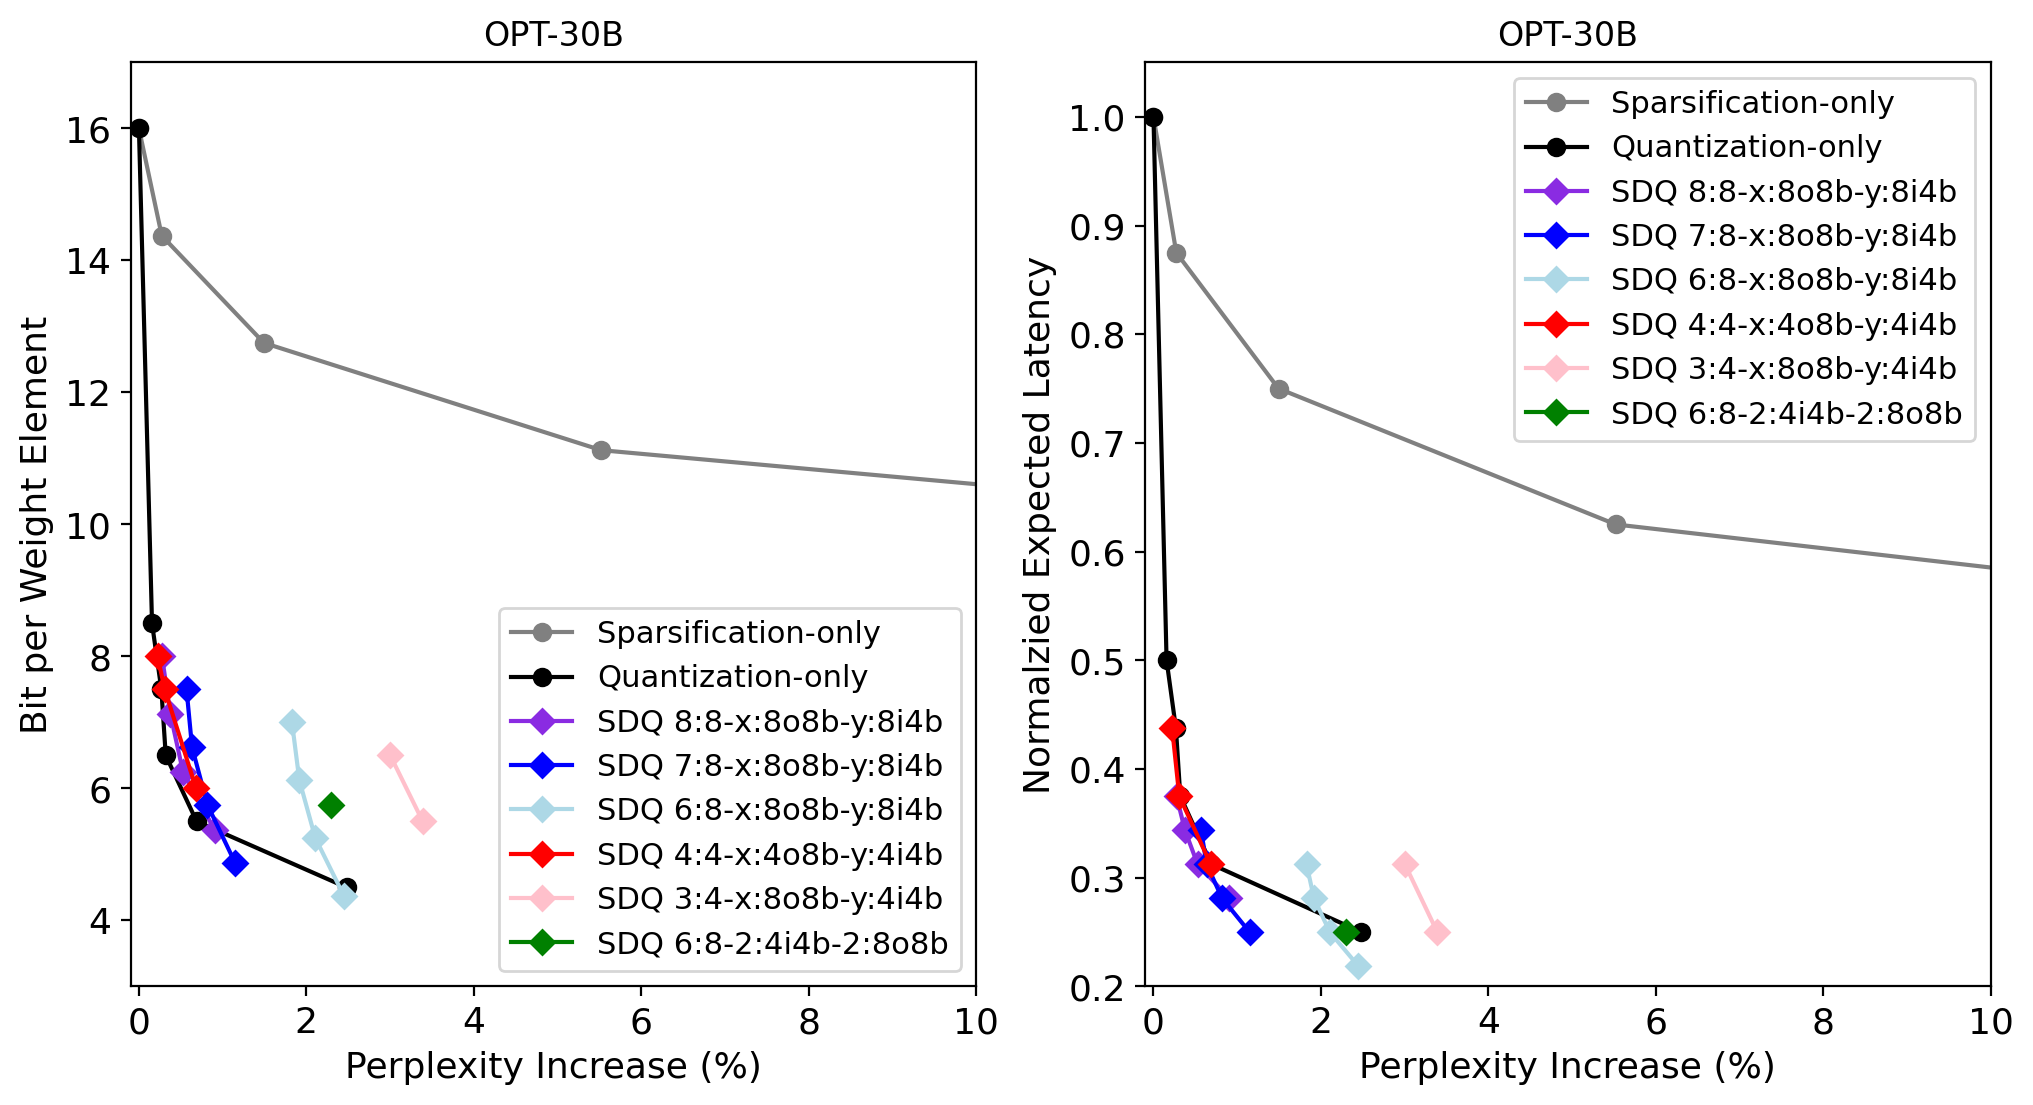

In [62]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize =(12, 6), dpi=200)
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
#y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
#axs.scatter(x, y, color = 'hotpink')

dense_p = 10.6703
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([10.6703, 10.6994, 10.8297, 11.2596, 12.7671])
x = (x - dense_p)/dense_p * 100
y = np.array([16, ((16*7) + (3))/8, ((16*6) + (6))/8, ((16*5) + (9))/8, ((16*4) + (12))/8])
axs[0].plot(x, y, color = 'grey', label="Sparsification-only", marker='o', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1, 7/8, 6/8, 5/8, 4/8])
axs[1].plot(x, y, color = 'grey', label="Sparsification-only", marker='o', linestyle='-')

x = np.array([10.9351, 10.7439, 10.7045, 10.6989, 10.6870, 10.6703])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 7.5, 8.5, 16])
axs[0].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')
y = np.array([1/4, 5/16, 6/16, 7/16, 1/2, 1])
#y = np.array([1/4, 1/2, 1/2, 1/2, 1])
axs[1].plot(x, y,'o-', color = 'black', label="Quantization-only", linestyle='-')




# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
### SDQ 8:8
x = np.array([10.7667, 10.7265, 10.7104, 10.6997])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 28) + (3 + 8/2))/8, ((16 + 24) + (6 + 8/2))/8, ((24 + 20) + (9 + 8/2))/8, ((32 + 16) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'blueviolet', label="SDQ 8:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 7/8 + 1/8 * 1/2, 1/4 * 6/8 + 2/8 * 1/2, 1/4 * 5/8 + 3/8 * 1/2, 1/4 * 4/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'blueviolet', label="SDQ 8:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 7:8
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([10.7928, 10.7577, 10.738, 10.731])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 24) + (3 + 8/2))/8, ((16 + 20) + (6 + 8/2))/8, ((24 + 16) + (9 + 8/2))/8, ((32 + 12) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'blue', label="SDQ 7:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 6/8 + 1/8 * 1/2, 1/4 * 5/8 + 2/8 * 1/2, 1/4 * 4/8 + 3/8 * 1/2, 1/4 * 3/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'blue', label="SDQ 7:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 6:8
# 1:8 2:8/6:8 3:8/5:8 4:8/4:8
# ((8 + 28) + (3 + 8/2))/8
x = np.array([10.9315, 10.8951, 10.8748, 10.8654])
x = (x - dense_p)/dense_p * 100
y = np.array([((8 + 20) + (3 + 8/2))/8, ((16 + 16) + (6 + 8/2))/8, ((24 + 12) + (9 + 8/2))/8, ((32 + 8) + (12 + 8/2))/8])
axs[0].plot(x, y, color = 'lightblue', label="SDQ 6:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([1/4 * 5/8 + 1/8 * 1/2, 1/4 * 4/8 + 2/8 * 1/2, 1/4 * 3/8 + 3/8 * 1/2, 1/4 * 2/8 + 4/8 * 1/2])
axs[1].plot(x, y, color = 'lightblue', label="SDQ 6:8-x:8o8b-y:8i4b", marker='D', linestyle='-')

### SDQ 4:4
# 1:4/3:4 2:4/2:4 3:4/1:4
# ((8 + 28) + (3 + 8/2))/8
x = np.array([10.7432, 10.7032, 10.6941])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 24) + (4 + 8/2))/8, ((32 + 16) + (8 + 8/2))/8, ((48 + 8) + (4 + 8/2))/8])
axs[0].plot(x, y, color = 'red', label="SDQ 4:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([3/4 * 1/4 + 1/4 * 1/2, 2/4 * 1/4 + 2/4 * 1/2, 1/4 * 1/4 + 3/4 * 1/2])
axs[1].plot(x, y, color = 'red', label="SDQ 4:4-x:4o8b-y:4i4b", marker='D', linestyle='-')

### SDQ 3:4
# 1:4/2:4 2:4/1:4
# ((8 + 28) + (3 + 8/2))/8
x = np.array([11.0321, 10.9907])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 16) + (8 + 8/2))/8, ((32 + 8) + (8 + 8/2))/8])
axs[0].plot(x, y, color = 'pink', label="SDQ 3:4-x:8o8b-y:4i4b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([2/4 * 1/4 + 1/4 * 1/2, 1/4 * 1/4 + 2/4 * 1/2])
axs[1].plot(x, y, color = 'pink', label="SDQ 3:4-x:8o8b-y:4i4b", marker='D', linestyle='-')

### # 2:4i fp4/ 2:8o int8
x = np.array([10.9157])
x = (x - dense_p)/dense_p * 100
y = np.array([((16 + 16) + (4+6 + 8/2))/8])
axs[0].plot(x, y, color = 'green', label="SDQ 6:8-2:4i4b-2:8o8b", marker='D', linestyle='-')

#y = np.array([1/4 + 1/8 * 1/2, 1/4  + 2/8 * 1/2, 1/4 + 3/8 * 1/2, 1/4 + 4/8 * 1/2])
y = np.array([2/4 * 1/4 + 2/8 * 1/2])
axs[1].plot(x, y, color = 'green', label="SDQ 6:8-2:4i4b-2:8o8b", marker='D', linestyle='-')

'''









'''
'''

x = np.array([16.7279, 13.0949, 13.0172, 14.6427])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2, 1/4 + 1/8 * 1/2])
axs[1].scatter(x, y, color = 'red', label="8:8-1:8o8b-7:8i4b", marker=4)

#12.4769
x = np.array([12.4769])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+4*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

y = np.array([1/4 + 1/8])
axs[1].scatter(x, y, color = 'blue', label="8:8-1:8o16b-7:8i4b", marker=4)

#12.3459
x = np.array([12.3459])
x = (x - dense_p)/dense_p * 100
y = np.array([((16+8*7 + 3 + 8)*2 )/16])
axs[0].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)

y = np.array([1/2 + 1/8 * 1])
axs[1].scatter(x, y, color = 'magenta', label="8:8-1:8o16b-7:8i8b", marker=4)
'''
'''
x = np.array([27.2057, 25.8580, 25.7670, 25.4371])
x = (x - dense_p)/dense_p * 100
y = np.array([4.5, 5.5, 6.5, 8])
axs[0].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")
y = np.array([1, 1, 1, 1])
axs[1].scatter(x, y, color = 'gray', label="dense weight-only-quant", marker="o")



x = np.array([28.7235, 27.7122, 27.5709, 27.9776])
x = (x - dense_p)/dense_p * 100
y = np.array([5.375, 5.375, 5.375, 5.375])
axs[0].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'blue', label="7:8-1:8o-6:8i", marker=5)

x = np.array([29.8278, 28.9205, 28.5968, 28.9288])
x = (x - dense_p)/dense_p * 100
y = np.arraya([6, 6, 6, 6])
axs[0].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)

y = np.array([1/4, 1/4, 1/4, 1/4])
axs[1].scatter(x, y, color = 'magenta', label="6:8-2:8o-4:8i", marker=6)
'''
fontsize = 13
axs[0].legend(fontsize = fontsize-2)
axs[0].set_title("OPT-30B")
axs[0].set_ylabel("Bit per Weight Element", fontsize = fontsize)
axs[0].set_xlabel("Perplexity Increase (%)", fontsize = fontsize) # Expected latency
axs[0].set_xlim(-0.1, 10)
axs[0].tick_params (axis='both', which='major', labelsize=fontsize)
axs[1].legend(fontsize = fontsize-2)
axs[1].set_title("OPT-30B")
axs[1].set_ylabel("Normalzied Expected Latency", fontsize = fontsize)
axs[1].set_xlabel("Perplexity Increase (%)", fontsize = fontsize) # Expected latency
axs[1].set_xlim(-0.1, 10)
axs[1].tick_params (axis='both', which='major', labelsize=fontsize)
axs[1].set_ylim(0.2, 1.05)
axs[0].set_ylim(3, 17)
#axs.show()

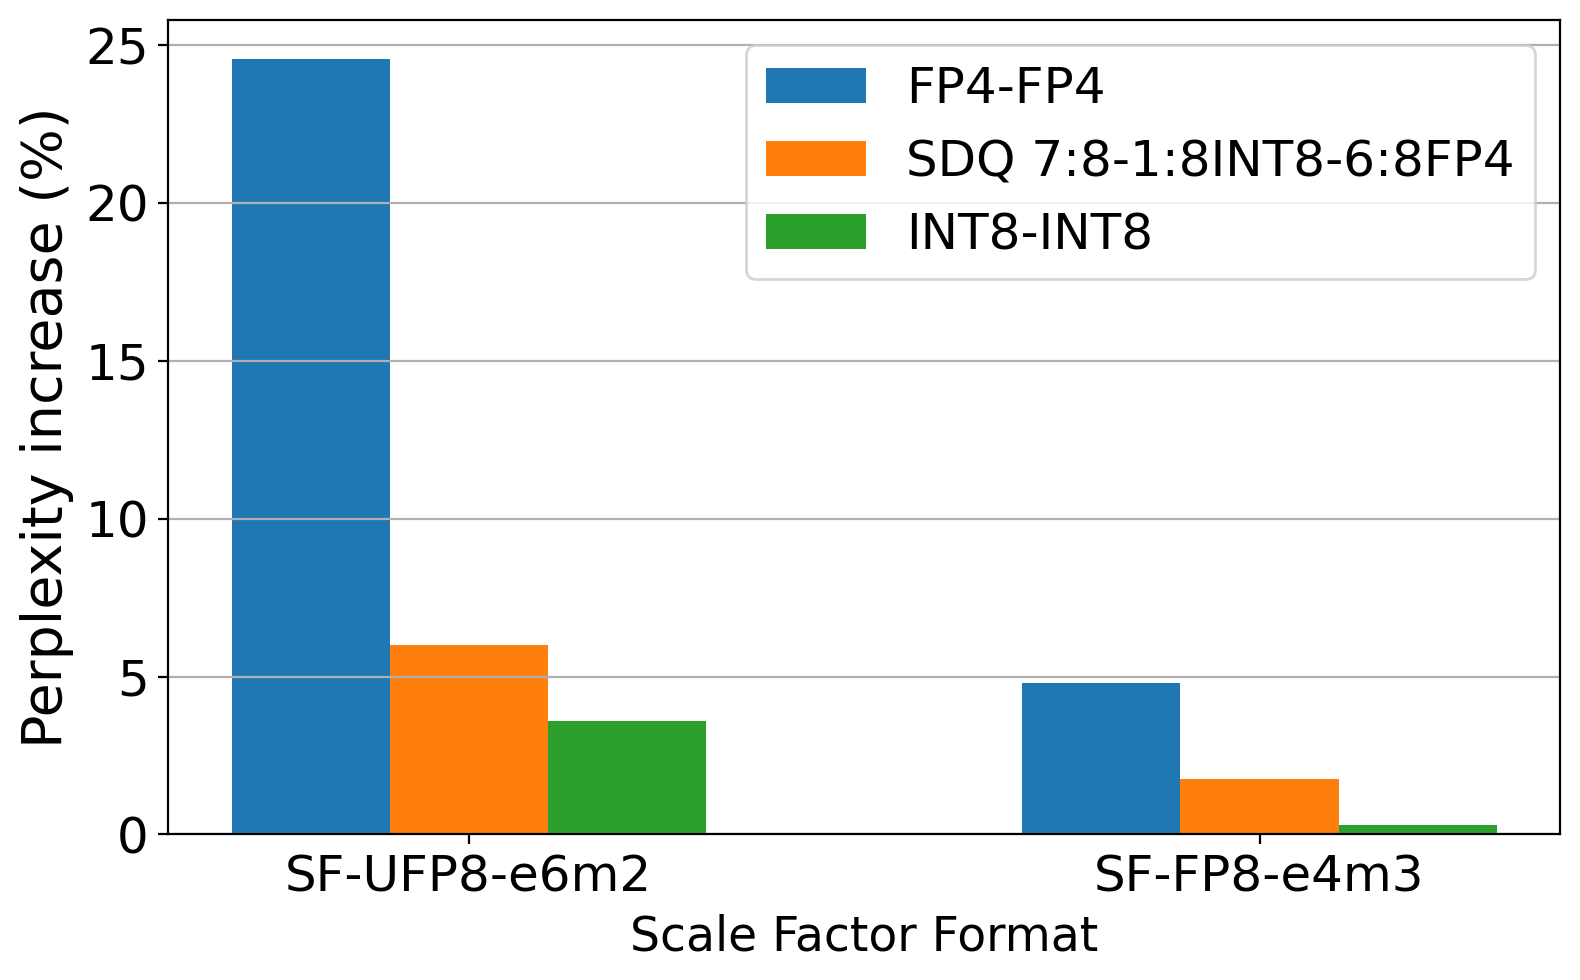

In [31]:

fig, axs = plt.subplots(nrows=1, ncols=1, figsize =(8, 5), dpi=200)

barWidth = 0.2
fontsize= 20
l=[0, 1, 2, 3]

br1 = np.arange(2)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

#data_32 = np.array([32*4, 32*4*2, 32*4*3, 32*4*4])
#meta_s_32 = np.array([2*4 , 2*4*2, 2*4*3, 0])
#meta_q_32 = np.array([32, 32, 32, 32])
#axs[0].bar(br1, data_32, width=barWidth, label = 'Data')
#axs[0].bar(br1, meta_s_32, bottom=data_32,  width=barWidth, label = 'Metadata-S')
#axs[0].bar(br1, meta_q_32, bottom=data_32 + meta_s_32,  width=barWidth, label = 'Metadata-Q')
#axs[0].legend()

data_16 = 100 * (np.array([15.305, 12.8752, ])-12.2865)/12.2865
meta_s_16 = 100 * (np.array([13.0219, 12.5042, ])-12.2865)/12.2865
meta_q_16 = 100 * (np.array([12.7278, 12.3243, ])-12.2865)/12.2865

axs.bar(br1, data_16, width=barWidth, label = 'FP4-FP4')
axs.bar(br2, meta_s_16, width=barWidth, label = 'SDQ 7:8-1:8INT8-6:8FP4')
axs.bar(br3, meta_q_16, width=barWidth, label = 'INT8-INT8')
#axs[1].legend()
for i in range(len(br1)):
    x_delta = 0.2
    data_sum = data_16[i] + meta_s_16[i] + meta_q_16[i]
    if data_sum >= 100:
        x_delta = 0.28
    #axs.text(br1[i] - x_delta, data_sum, str(data_sum), fontsize=fontsize-5)


axs.set_ylabel('Perplexity increase (%)', fontsize = fontsize)

for i in range(1):
    for j in range(1):
        if j == 0:
            axs_title = str(int(16/(2**(i)))) + 'b Weight, 32b SF, 16 BS'
            #axs[i].set_title(axs_title, fontsize = fontsize-1)
        if j == 1:
            axs_title = str(int(16/(2**(i)))) + 'b Weight, 8b SF, 32 BS'
            axs.set_title(axs_title, fontsize = fontsize-1)
        axs.set_xticks(br2)

        axs.set_xlabel('Scale Factor Format', fontsize = 17)
        axs.set_xticklabels(['SF-UFP8-e6m2', 'SF-FP8-e4m3'], fontsize = fontsize-2)
        #if j == 0:
        #   axs.set_ylim(0, 100)
        #else:
        #    axs.set_ylim(0, 100)
        axs.legend(fontsize=fontsize-2)

        axs.tick_params(axis='y', labelsize=fontsize-2)
        axs.grid(axis = 'y')
        #axs.set_yscale('log')
        
        
#axs[2].legend(loc='center left', ncols=3, bbox_to_anchor=(-2, -0.2), fontsize=17)

plt.tight_layout()
plt.savefig("metadata.pdf", dpi=2000)